### Maheedhar Attaluri - Student Id: z245q579


## fredapi

 - The following library named fredapi need to be installed.This library will help us to get / extract the data from the FRED webside

In [1]:
pip install fredapi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("YlOrBr", as_cmap=True)
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

import fredapi as fd

### Hypothesis 

Question:  Does Inflation affect consumer spending

### Extraction of the Data from the FRED website using an API keys

- Extracting induvidual variables data from website

###  Consumer PRICE INDEX

The Consumer Price Index (CPI) is a statistical measure that quantifies the average change in prices of a predetermined basket of goods and services over a specified period in a given region. 

In [2]:
ffd  = fd.Fred(api_key='e994d7d8ba90978a4fa5c19da22c5639')
data_infla = ffd.search('consumer spening')

cpi = ffd.get_series('CPIAUCSL')
cpi


1947-01-01     21.480
1947-02-01     21.620
1947-03-01     22.000
1947-04-01     22.000
1947-05-01     21.950
               ...   
2023-06-01    303.841
2023-07-01    304.348
2023-08-01    306.269
2023-09-01    307.481
2023-10-01    307.619
Length: 922, dtype: float64

## Consumer Demand  (personal consumption expenditure)

Personal Consumption Expenditure (PCE) is calculated using a detailed and comprehensive approach that involves collecting and analysing data on the various goods and services that individuals and households purchase, measured as currency per hour

In [3]:
ffd  = fd.Fred(api_key='e994d7d8ba90978a4fa5c19da22c5639')

In [4]:
ffd  = fd.Fred(api_key='e994d7d8ba90978a4fa5c19da22c5639')
data_cons_demad = ffd.search('consumer goods')
data_cons_demad = data_cons_demad[(data_cons_demad['observation_start']> pd.to_datetime('1940'))&\
           (data_cons_demad['frequency_short']=='M')]
data_cons_demad.sort_values(by='popularity',ascending=False)
data_cons_demad

id realtime_start realtime_end  \
series id                                                                    
PCEDG                                    PCEDG     2023-12-03   2023-12-03   
ACOGNO                                  ACOGNO     2023-12-03   2023-12-03   
ACDGNO                                  ACDGNO     2023-12-03   2023-12-03   
DGDSRX1                                DGDSRX1     2023-12-03   2023-12-03   
ADXTNO                                  ADXTNO     2023-12-03   2023-12-03   
...                                        ...            ...          ...   
IGDXESEU28M086NEST          IGDXESEU28M086NEST     2023-12-03   2023-12-03   
IGDXESEZ19M086NEST          IGDXESEZ19M086NEST     2023-12-03   2023-12-03   
IGDXENDEM086NEST              IGDXENDEM086NEST     2023-12-03   2023-12-03   
IGDXENEU272020M086NEST  IGDXENEU272020M086NEST     2023-12-03   2023-12-03   
IGDXENEUCCM086NEST          IGDXENEUCCM086NEST     2023-12-03   2023-12-03   

                                                                    title  \
series id                                                                   
PCEDG                    Personal Consumption Expenditures: Durable Goods   
ACOGNO                          Manufacturers' New Orders: Consumer Goods   
ACDGNO                  Manufacturers' New Orders: Consumer Durable Goods   
DGDSRX1                     Real Personal Consumption Expenditures: Goods   
ADXTNO                  Manufacturers' New Orders: Durable Goods Exclu...   
...                                                                   ...   
IGDXESEU28M086NEST      Harmonized Index of Consumer Prices: Non-Energ...   
IGDXESEZ19M086NEST      Harmonized Index of Consumer Prices: Non-Energ...   
IGDXENDEM086NEST        Harmonized Index of Consumer Prices: Non-Energ...   
IGDXENEU272020M086NEST  Harmonized Index of Consumer Prices: Non-Energ...   
IGDXENEUCCM086NEST      Harmonized Index of Consumer Prices: Non-Energ...   

                       observation_start observation_end frequency  \
series id                                                            
PCEDG                         1959-01-01      2023-10-01   Monthly   
ACOGNO                        1992-02-01      2023-09-01   Monthly   
ACDGNO                        1992-02-01      2023-09-01   Monthly   
DGDSRX1                       2007-01-01      2023-10-01   Monthly   
ADXTNO                        1992-02-01      2023-10-01   Monthly   
...                                  ...             ...       ...   
IGDXESEU28M086NEST            2000-12-01      2020-01-01   Monthly   
IGDXESEZ19M086NEST            2000-12-01      2023-10-01   Monthly   
IGDXENDEM086NEST              1996-01-01      2023-10-01   Monthly   
IGDXENEU272020M086NEST        2000-12-01      2023-10-01   Monthly   
IGDXENEUCCM086NEST            2000-12-01      2023-10-01   Monthly   

                       frequency_short                             units  \
series id                                                                  
PCEDG                                M               Billions of Dollars   
ACOGNO                               M               Millions of Dollars   
ACDGNO                               M               Millions of Dollars   
DGDSRX1                              M  Billions of Chained 2017 Dollars   
ADXTNO                               M               Millions of Dollars   
...                                ...                               ...   
IGDXESEU28M086NEST                   M                    Index 2015=100   
IGDXESEZ19M086NEST                   M                    Index 2015=100   
IGDXENDEM086NEST                     M                    Index 2015=100   
IGDXENEU272020M086NEST               M                    Index 2015=100   
IGDXENEUCCM086NEST                   M                    Index 2015=100   

                                units_short              seasonal_adjustment  \
series id                                      

In [5]:
cons_demand = ffd.get_series('PCE')
cons_demand

1959-01-01      306.1
1959-02-01      309.6
1959-03-01      312.7
1959-04-01      312.2
1959-05-01      316.1
               ...   
2023-06-01    18485.4
2023-07-01    18621.3
2023-08-01    18689.9
2023-09-01    18823.4
2023-10-01    18864.7
Length: 778, dtype: float64

## wage growth

##  (Average Hourly Earnings of All Employees, Tota..)

This is often referred to as Average Hourly Wage, is a commonly used labour market and economic indicator that measures the average earnings of employees per hour worked. It provides insight into the wage levels and earning potential of workers within a specific industry, sector, region, or the entire workforce of a country.

In [6]:
ffd  = fd.Fred(api_key='f2c8524ec94d5d582005587e15874db1')
data_wage = ffd.search('wage')

In [7]:
data_wage = data_wage[(data_wage['observation_start']> pd.to_datetime('1940'))&\
           (data_wage['frequency_short']=='M')]
data_wage.sort_values(by='popularity',ascending=False)
data_wage

id realtime_start realtime_end  \
series id                                                                    
CES0500000003                    CES0500000003     2023-12-03   2023-12-03   
CEU0500000003                    CEU0500000003     2023-12-03   2023-12-03   
AHETPI                                  AHETPI     2023-12-03   2023-12-03   
CEU0500000008                    CEU0500000008     2023-12-03   2023-12-03   
CES2000000003                    CES2000000003     2023-12-03   2023-12-03   
...                                        ...            ...          ...   
LCWRMN01BEM661N                LCWRMN01BEM661N     2023-12-03   2023-12-03   
CWSR0000SEEE                      CWSR0000SEEE     2023-12-03   2023-12-03   
CEU7000000008                    CEU7000000008     2023-12-03   2023-12-03   
FRBATLWGT12MMUMHWG55O    FRBATLWGT12MMUMHWG55O     2023-12-03   2023-12-03   
FRBATLWGT12MMUMHWGSACD  FRBATLWGT12MMUMHWGSACD     2023-12-03   2023-12-03   

                                                                    title  \
series id                                                                   
CES0500000003           Average Hourly Earnings of All Employees, Tota...   
CEU0500000003           Average Hourly Earnings of All Employees, Tota...   
AHETPI                  Average Hourly Earnings of Production and Nons...   
CEU0500000008           Average Hourly Earnings of Production and Nons...   
CES2000000003           Average Hourly Earnings of All Employees, Cons...   
...                                                                   ...   
LCWRMN01BEM661N         Labor Compensation: Wage Rate: Manufacturing: ...   
CWSR0000SEEE            Consumer Price Index for All Urban Wage Earner...   
CEU7000000008           Average Hourly Earnings of Production and Nons...   
FRBATLWGT12MMUMHWG55O   12-Month Moving Average of Unweighted Median H...   
FRBATLWGT12MMUMHWGSACD  12-Month Moving Average of Unweighted Median H...   

                       observation_start observation_end frequency  \
series id                                                            
CES0500000003                 2006-03-01      2023-10-01   Monthly   
CEU0500000003                 2006-03-01      2023-10-01   Monthly   
AHETPI                        1964-01-01      2023-10-01   Monthly   
CEU0500000008                 1964-01-01      2023-10-01   Monthly   
CES2000000003                 2006-03-01      2023-10-01   Monthly   
...                                  ...             ...       ...   
LCWRMN01BEM661N               1960-03-01      2023-06-01   Monthly   
CWSR0000SEEE                  2006-01-01      2023-10-01   Monthly   
CEU7000000008                 1964-01-01      2023-10-01   Monthly   
FRBATLWGT12MMUMHWG55O         1997-12-01      2023-10-01   Monthly   
FRBATLWGT12MMUMHWGSACD        1997-12-01      2023-10-01   Monthly   

                       frequency_short                         units  \
series id                                                              
CES0500000003                        M              Dollars per Hour   
CEU0500000003                        M              Dollars per Hour   
AHETPI                               M              Dollars per Hour   
CEU0500000008                        M              Dollars per Hour   
CES2000000003                        M              Dollars per Hour   
...                                ...                           ...   
LCWRMN01BEM661N                      M                Index 2015=100   
CWSR0000SEEE                         M            Index Dec 1988=100   
CEU7000000008                        M              Dollars per Hour   
FRBATLWGT12MMUMHWG55O                M  Percent Change from Year Ago   
FRBATLWGT12MMUMHWGSACD               M  Percent Change from Year Ago   

                                units_short      seasonal_adjustment  \
series id                                                              
CES0500000003                    $ 

In [8]:
wage_data = ffd.get_series('CES0500000003')
wage_data

2006-03-01    20.04
2006-04-01    20.15
2006-05-01    20.13
2006-06-01    20.23
2006-07-01    20.29
              ...  
2023-06-01    33.60
2023-07-01    33.73
2023-08-01    33.82
2023-09-01    33.93
2023-10-01    34.00
Length: 212, dtype: float64

## Houseprices (House price index)

The House Price Index (HPI) is a commonly used economic indicator that measures changes in the prices of residential properties, providing insight into the trends and movements in the real estate market. It is used to track the relative changes in house prices over time, helping to assess the state of the housing market and its impact on the overall economy. The HPI reflects the price changes of a "basket" of residential properties, which can include single-family homes, condominiums, and other types of housing.

In [9]:
ffd  = fd.Fred(api_key='3dcd16102c22f3010da0a4ca7ccea116')
data_house = ffd.search('house price')

In [10]:
data_house = data_house[(data_house['observation_start']> pd.to_datetime('1940'))&\
           (data_house['frequency_short']=='M')]
data_house.sort_values(by='popularity',ascending=False)
data_house

id realtime_start realtime_end  \
series id                                                            
CSUSHPINSA                  CSUSHPINSA     2023-12-03   2023-12-03   
CSUSHPISA                    CSUSHPISA     2023-12-03   2023-12-03   
SPCS20RSA                    SPCS20RSA     2023-12-03   2023-12-03   
MSPNHSUS                      MSPNHSUS     2023-12-03   2023-12-03   
SPCS20RNSA                  SPCS20RNSA     2023-12-03   2023-12-03   
...                                ...            ...          ...   
WPU5111030101            WPU5111030101     2023-12-03   2023-12-03   
CP0410ROM086NEST      CP0410ROM086NEST     2023-12-03   2023-12-03   
LXXRLTNSA                    LXXRLTNSA     2023-12-03   2023-12-03   
SUUR0000SAH                SUUR0000SAH     2023-12-03   2023-12-03   
CP0430EZ18M086NEST  CP0430EZ18M086NEST     2023-12-03   2023-12-03   

                                                                title  \
series id                                                               
CSUSHPINSA            S&P/Case-Shiller U.S. National Home Price Index   
CSUSHPISA             S&P/Case-Shiller U.S. National Home Price Index   
SPCS20RSA           S&P/Case-Shiller 20-City Composite Home Price ...   
MSPNHSUS            Median Sales Price for New Houses Sold in the ...   
SPCS20RNSA          S&P/Case-Shiller 20-City Composite Home Price ...   
...                                                               ...   
WPU5111030101       Producer Price Index by Commodity: Health Care...   
CP0410ROM086NEST    Harmonized Index of Consumer Prices: Actual Re...   
LXXRLTNSA           Home Price Index (Low Tier) for Los Angeles, C...   
SUUR0000SAH         Chained Consumer Price Index for All Urban Con...   
CP0430EZ18M086NEST  Harmonized Index of Consumer Prices: Maintenan...   

                   observation_start observation_end frequency  \
series id                                                        
CSUSHPINSA                1987-01-01      2023-09-01   Monthly   
CSUSHPISA                 1987-01-01      2023-09-01   Monthly   
SPCS20RSA                 2000-01-01      2023-09-01   Monthly   
MSPNHSUS                  1963-01-01      2023-10-01   Monthly   
SPCS20RNSA                2000-01-01      2023-09-01   Monthly   
...                              ...             ...       ...   
WPU5111030101             2008-12-01      2023-10-01   Monthly   
CP0410ROM086NEST          2000-12-01      2023-10-01   Monthly   
LXXRLTNSA                 1987-01-01      2023-09-01   Monthly   
SUUR0000SAH               1999-12-01      2023-10-01   Monthly   
CP0430EZ18M086NEST        1999-12-01      2022-11-01   Monthly   

                   frequency_short               units         units_short  \
series id                                                                    
CSUSHPINSA                       M  Index Jan 2000=100  Index Jan 2000=100   
CSUSHPISA                        M  Index Jan 2000=100  Index Jan 2000=100   
SPCS20RSA                        M  Index Jan 2000=100  Index Jan 2000=100   
MSPNHSUS                         M             Dollars                   $   
SPCS20RNSA                       M  Index Jan 2000=100  Index Jan 2000=100   
...                            ...                 ...                 ...   
WPU5111030101                    M  Index Dec 2008=100  Index Dec 2008=100   
CP0410ROM086NEST                 M      Index 2015=100      Index 2015=100   
LXXRLTNSA                        M  Index Jan 2000=100  Index Jan 2000=100   
SUUR0000SAH                      M  Index Dec 1999=100  Index Dec 1999=100   
CP0430EZ18M086NEST               M      Index 2015=100      Index 2015=100   

                        seasonal_adjustment seasonal_adjustment_short  \
series id                                                               
CSUSHPINSA          Not Seasonally Adjusted                       NSA   
CSUSHPISA               Seasonally Adjusted                        SA   
SPCS20RSA

In [11]:
house_data = ffd.get_series('CSUSHPINSA')
house_data

1975-01-01        NaN
1975-02-01        NaN
1975-03-01        NaN
1975-04-01        NaN
1975-05-01        NaN
               ...   
2023-05-01    305.410
2023-06-01    308.282
2023-07-01    310.110
2023-08-01    311.392
2023-09-01    312.313
Length: 585, dtype: float64

## GDP 

Gross Domestic Product

In [12]:
ffd  = fd.Fred(api_key='e994d7d8ba90978a4fa5c19da22c5639')
data_gdp = ffd.search('GDP')
data_gdp

id realtime_start realtime_end  \
series id                                                      
GFDEGDQ188S          GFDEGDQ188S     2023-12-03   2023-12-03   
FYFSGDA188S          FYFSGDA188S     2023-12-03   2023-12-03   
FYFSDFYGDP            FYFSDFYGDP     2023-12-03   2023-12-03   
GDP                          GDP     2023-12-03   2023-12-03   
FYONGDA188S          FYONGDA188S     2023-12-03   2023-12-03   
...                          ...            ...          ...   
NAEXKP01IDQ657S  NAEXKP01IDQ657S     2023-12-03   2023-12-03   
NAEXKP04USA661S  NAEXKP04USA661S     2023-12-03   2023-12-03   
NAEXKP04USQ652S  NAEXKP04USQ652S     2023-12-03   2023-12-03   
ILNQGSP                  ILNQGSP     2023-12-03   2023-12-03   
NAEXKP01IDQ652S  NAEXKP01IDQ652S     2023-12-03   2023-12-03   

                                                             title  \
series id                                                            
GFDEGDQ188S      Federal Debt: Total Public Debt as Percent of ...   
FYFSGDA188S      Federal Surplus or Deficit [-] as Percent of G...   
FYFSDFYGDP       Federal Surplus or Deficit [-] as Percent of G...   
GDP                                         Gross Domestic Product   
FYONGDA188S      Federal Net Outlays as Percent of Gross Domest...   
...                                                            ...   
NAEXKP01IDQ657S  National Accounts: GDP by Expenditure: Constan...   
NAEXKP04USA661S  National Accounts: GDP by Expenditure: Constan...   
NAEXKP04USQ652S  National Accounts: GDP by Expenditure: Constan...   
ILNQGSP          Gross Domestic Product: All Industry Total in ...   
NAEXKP01IDQ652S  National Accounts: GDP by Expenditure: Constan...   

                observation_start observation_end            frequency  \
series id                                                                
GFDEGDQ188S            1966-01-01      2023-04-01            Quarterly   
FYFSGDA188S            1929-01-01      2022-01-01               Annual   
FYFSDFYGDP             1930-06-30      2022-09-30  Annual, Fiscal Year   
GDP                    1947-01-01      2023-07-01            Quarterly   
FYONGDA188S            1929-01-01      2022-01-01               Annual   
...                           ...             ...                  ...   
NAEXKP01IDQ657S        1990-04-01      2023-07-01            Quarterly   
NAEXKP04USA661S        1960-01-01      2022-01-01               Annual   
NAEXKP04USQ652S        1972-01-01      2023-07-01            Quarterly   
ILNQGSP                2005-01-01      2023-01-01            Quarterly   
NAEXKP01IDQ652S        2000-01-01      2023-07-01            Quarterly   

                frequency_short                        units  \
series id                                                      
GFDEGDQ188S                   Q               Percent of GDP   
FYFSGDA188S                   A               Percent of GDP   
FYFSDFYGDP                    A               Percent of GDP   
GDP                           Q          Billions of Dollars   
FYONGDA188S                   A               Percent of GDP   
...                         ...                          ...   
NAEXKP01IDQ657S               Q  Growth rate previous period   
NAEXKP04USA661S               A               Index 2015=100   
NAEXKP04USQ652S               Q                    US Dollar   
ILNQGSP                       Q          Millions of Dollars   
NAEXKP01IDQ652S               Q                       Rupiah   

                                 units_short              seasonal_adjustment  \
series id                                                                       
GFDEGDQ188S                         % of GDP              Seasonally Adjusted   
FYFSGDA188S                         % of GDP          Not Seasonally Adjusted   
FYFSDFYGDP                          % of GDP          Not Seasonally Adjusted   
GDP                                Bil. of $  Seasonally Adjusted Annual Rate   
FYON

In [13]:
data_gdp = data_gdp[(data_gdp['observation_start']> pd.to_datetime('1940'))&\
           (data_gdp['frequency_short']=='Q')]
data_gdp.sort_values(by='popularity',ascending=False)
data_gdp

id realtime_start realtime_end  \
series id                                                      
GFDEGDQ188S          GFDEGDQ188S     2023-12-03   2023-12-03   
GDP                          GDP     2023-12-03   2023-12-03   
GDPC1                      GDPC1     2023-12-03   2023-12-03   
FYGFGDQ188S          FYGFGDQ188S     2023-12-03   2023-12-03   
A191RL1Q225SBEA  A191RL1Q225SBEA     2023-12-03   2023-12-03   
...                          ...            ...          ...   
IDNGDPRQPSMEI      IDNGDPRQPSMEI     2023-12-03   2023-12-03   
NAEXKP01IDQ657S  NAEXKP01IDQ657S     2023-12-03   2023-12-03   
NAEXKP04USQ652S  NAEXKP04USQ652S     2023-12-03   2023-12-03   
ILNQGSP                  ILNQGSP     2023-12-03   2023-12-03   
NAEXKP01IDQ652S  NAEXKP01IDQ652S     2023-12-03   2023-12-03   

                                                             title  \
series id                                                            
GFDEGDQ188S      Federal Debt: Total Public Debt as Percent of ...   
GDP                                         Gross Domestic Product   
GDPC1                                  Real Gross Domestic Product   
FYGFGDQ188S      Federal Debt Held by the Public as Percent of ...   
A191RL1Q225SBEA                        Real Gross Domestic Product   
...                                                            ...   
IDNGDPRQPSMEI    National Accounts: GDP by Expenditure: Constan...   
NAEXKP01IDQ657S  National Accounts: GDP by Expenditure: Constan...   
NAEXKP04USQ652S  National Accounts: GDP by Expenditure: Constan...   
ILNQGSP          Gross Domestic Product: All Industry Total in ...   
NAEXKP01IDQ652S  National Accounts: GDP by Expenditure: Constan...   

                observation_start observation_end  frequency frequency_short  \
series id                                                                      
GFDEGDQ188S            1966-01-01      2023-04-01  Quarterly               Q   
GDP                    1947-01-01      2023-07-01  Quarterly               Q   
GDPC1                  1947-01-01      2023-07-01  Quarterly               Q   
FYGFGDQ188S            1970-01-01      2023-04-01  Quarterly               Q   
A191RL1Q225SBEA        1947-04-01      2023-07-01  Quarterly               Q   
...                           ...             ...        ...             ...   
IDNGDPRQPSMEI          1991-01-01      2023-07-01  Quarterly               Q   
NAEXKP01IDQ657S        1990-04-01      2023-07-01  Quarterly               Q   
NAEXKP04USQ652S        1972-01-01      2023-07-01  Quarterly               Q   
ILNQGSP                2005-01-01      2023-01-01  Quarterly               Q   
NAEXKP01IDQ652S        2000-01-01      2023-07-01  Quarterly               Q   

                                                 units  \
series id                                                
GFDEGDQ188S                             Percent of GDP   
GDP                                Billions of Dollars   
GDPC1                 Billions of Chained 2017 Dollars   
FYGFGDQ188S                             Percent of GDP   
A191RL1Q225SBEA   Percent Change from Preceding Period   
...                                                ...   
IDNGDPRQPSMEI    Growth rate same period previous year   
NAEXKP01IDQ657S            Growth rate previous period   
NAEXKP04USQ652S                              US Dollar   
ILNQGSP                            Millions of Dollars   
NAEXKP01IDQ652S                                 Rupiah   

                                          units_short  \
series id                                               
GFDEGDQ188S                                  % of GDP   
GDP                                         Bil. of $   
GDPC1                             Bil. of Chn. 2017 $   
FYGFGDQ188S                                  % of GDP   
A191RL1Q225SBEA          % Chg. from Preceding Period   
...                                               ...   
IDNGDPRQPSMEI    Growth rate same 

In [14]:
gdp = ffd.get_series('GDP')
gdp

1946-01-01          NaN
1946-04-01          NaN
1946-07-01          NaN
1946-10-01          NaN
1947-01-01      243.164
                ...    
2022-07-01    25994.639
2022-10-01    26408.405
2023-01-01    26813.601
2023-04-01    27063.012
2023-07-01    27644.463
Length: 311, dtype: float64

## Real Personal Income (Income after adjusted to inflation)

Real Personal Income, often referred to as Real Personal Income or Real Disposable Personal Income, is an important economic indicator that measures the income earned by individuals and households after adjusting for inflation. Units for RPI -Constant (or Real) Dollars

In [15]:
ffd  = fd.Fred(api_key='f73f4298de9dd8804e22b0f1abf58711')
data_inc = ffd.search('real income')

In [16]:
data_inc = data_inc[(data_inc['observation_start']> pd.to_datetime('1940'))&\
           (data_inc['frequency_short']=='M')]
data_inc.sort_values(by='popularity',ascending=False)
data_inc

id realtime_start realtime_end  \
series id                                        
DSPIC96    DSPIC96     2023-12-03   2023-12-03   
A229RX0    A229RX0     2023-12-03   2023-12-03   
W875RX1    W875RX1     2023-12-03   2023-12-03   
RPI            RPI     2023-12-03   2023-12-03   

                                                       title  \
series id                                                      
DSPIC96                      Real Disposable Personal Income   
A229RX0          Real Disposable Personal Income: Per Capita   
W875RX1    Real personal income excluding current transfe...   
RPI                                     Real Personal Income   

          observation_start observation_end frequency frequency_short  \
series id                                                               
DSPIC96          1959-01-01      2023-10-01   Monthly               M   
A229RX0          1959-01-01      2023-10-01   Monthly               M   
W875RX1          1959-01-01      2023-10-01   Monthly               M   
RPI              1959-01-01      2023-10-01   Monthly               M   

                                      units          units_short  \
series id                                                          
DSPIC96    Billions of Chained 2017 Dollars  Bil. of Chn. 2017 $   
A229RX0                Chained 2017 Dollars          Chn. 2017 $   
W875RX1    Billions of Chained 2017 Dollars  Bil. of Chn. 2017 $   
RPI        Billions of Chained 2017 Dollars  Bil. of Chn. 2017 $   

                       seasonal_adjustment seasonal_adjustment_short  \
series id                                                              
DSPIC96    Seasonally Adjusted Annual Rate                      SAAR   
A229RX0    Seasonally Adjusted Annual Rate                      SAAR   
W875RX1    Seasonally Adjusted Annual Rate                      SAAR   
RPI        Seasonally Adjusted Annual Rate                      SAAR   

                        last_updated popularity  \
series id                                         
DSPIC96    2023-11-30 07:44:10-06:00         75   
A229RX0    2023-11-30 07:44:14-06:00         65   
W875RX1    2023-11-30 07:44:16-06:00         57   
RPI        2023-11-30 07:44:16-06:00         57   

                                                       notes  
series id                                                     
DSPIC96    BEA Account Code: A067RX AGuide to the Nationa...  
A229RX0    BEA Account Code: A229RX A Guide to the Nation...  
W875RX1    BEA Account Code: W875RX A Guide to the Nation...  
RPI        Calculated by the Federal Reserve Bank of St. ...

In [17]:
real_inc = ffd.get_series('RPI')
real_inc

1959-01-01     2583.560
1959-02-01     2593.596
1959-03-01     2610.396
1959-04-01     2627.446
1959-05-01     2642.720
                ...    
2023-06-01    19066.014
2023-07-01    19083.675
2023-08-01    19101.296
2023-09-01    19110.547
2023-10-01    19148.104
Length: 778, dtype: float64

## Unemployement rate

The Unemployment Rate is a widely used economic indicator that measures the percentage of people who are actively seeking employment but are currently without a job as a proportion of the total labor force. It provides insight into the level of unemployment in an economy and is a key indicator for assessing the health of the labor market,  unit for the Unemployment Rate is: percentage(%).

In [18]:
ffd  = fd.Fred(api_key='f73f4298de9dd8804e22b0f1abf58711')
data_unemp = ffd.search('unemployement')

In [19]:
data_unemp = data_unemp[(data_unemp['observation_start']> pd.to_datetime('1940'))&\
           (data_unemp['frequency_short']=='M')]
data_unemp.sort_values(by='popularity',ascending=False)
data_unemp

id realtime_start realtime_end  \
series id                                                      
UNRATE                    UNRATE     2023-12-03   2023-12-03   
UNRATENSA              UNRATENSA     2023-12-03   2023-12-03   
UNEMPLOY                UNEMPLOY     2023-12-03   2023-12-03   
LNS14000006          LNS14000006     2023-12-03   2023-12-03   
LNU03000000          LNU03000000     2023-12-03   2023-12-03   
...                          ...            ...          ...   
LNU04000025          LNU04000025     2023-12-03   2023-12-03   
BALT524UR              BALT524UR     2023-12-03   2023-12-03   
LMUNRLTTTRM647N  LMUNRLTTTRM647N     2023-12-03   2023-12-03   
LNU04000048          LNU04000048     2023-12-03   2023-12-03   
LMUNRRTTDKM156N  LMUNRRTTDKM156N     2023-12-03   2023-12-03   

                                                             title  \
series id                                                            
UNRATE                                           Unemployment Rate   
UNRATENSA                                        Unemployment Rate   
UNEMPLOY                                        Unemployment Level   
LNS14000006          Unemployment Rate - Black or African American   
LNU03000000                                     Unemployment Level   
...                                                            ...   
LNU04000025                Unemployment Rate - 20 Yrs. & over, Men   
BALT524UR        Unemployment Rate in Baltimore-Columbia-Towson...   
LMUNRLTTTRM647N  Other Labor Market Measures: Registered Unempl...   
LNU04000048                     Unemployment Rate - 25 Yrs. & over   
LMUNRRTTDKM156N  Other Labor Market Measures: Registered Unempl...   

                observation_start observation_end frequency frequency_short  \
series id                                                                     
UNRATE                 1948-01-01      2023-10-01   Monthly               M   
UNRATENSA              1948-01-01      2023-10-01   Monthly               M   
UNEMPLOY               1948-01-01      2023-10-01   Monthly               M   
LNS14000006            1972-01-01      2023-10-01   Monthly               M   
LNU03000000            1948-01-01      2023-10-01   Monthly               M   
...                           ...             ...       ...             ...   
LNU04000025            1948-01-01      2023-10-01   Monthly               M   
BALT524UR              1990-01-01      2023-10-01   Monthly               M   
LMUNRLTTTRM647N        1962-01-01      2023-03-01   Monthly               M   
LNU04000048            1948-01-01      2023-10-01   Monthly               M   
LMUNRRTTDKM156N        1970-01-01      2017-06-01   Monthly               M   

                                units        units_short  \
series id                                                  
UNRATE                        Percent                  %   
UNRATENSA                     Percent                  %   
UNEMPLOY         Thousands of Persons  Thous. of Persons   
LNS14000006                   Percent                  %   
LNU03000000      Thousands of Persons  Thous. of Persons   
...                               ...                ...   
LNU04000025                   Percent                  %   
BALT524UR                     Percent                  %   
LMUNRLTTTRM647N               Persons            Persons   
LNU04000048                   Percent                  %   
LMUNRRTTDKM156N               Percent                  %   

                          seasonal_adjustment seasonal_adjustment_short  \
series id                                                                 
UNRATE                    Seasonally Adjusted                        SA   
UNRATENSA             Not Seasonally Adjusted                       NSA   
UNEMPLOY                  Seasonally Adjusted                        SA   
LNS14000006               Seasonally Adjusted                        SA   
LNU03000000           Not S

In [20]:
unemp_rate = ffd.get_series('UNRATE')
unemp_rate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-06-01    3.6
2023-07-01    3.5
2023-08-01    3.8
2023-09-01    3.8
2023-10-01    3.9
Length: 910, dtype: float64

## consumer confidence

Consumer Confidence, often referred to as Consumer Confidence Index (CCI), is an economic indicator that measures the degree of optimism or pessimism among consumers about the state of the economy and their personal financial situations. It reflects the sentiment and expectations of individuals and households regarding their future income, employment prospects, and overall economic conditions. Consumer Confidence is a valuable tool for assessing consumer spending patterns and predicting future economic trends, units for  Consumer Confidence is typically expressed as an index score.

In [21]:
ffd  = fd.Fred(api_key='3dcd16102c22f3010da0a4ca7ccea116')
conf_data = ffd.search('consumer confidence')

In [22]:
conf_data = conf_data[(conf_data['observation_start']> pd.to_datetime('1940'))&\
           (conf_data['frequency_short']=='M')]
conf_data.sort_values(by='popularity',ascending=False)
conf_data

id realtime_start realtime_end  \
series id                                                          
UMCSENT                      UMCSENT     2023-12-03   2023-12-03   
MICH                            MICH     2023-12-03   2023-12-03   
CSCICP03USM665S      CSCICP03USM665S     2023-12-03   2023-12-03   
CSCICP03CNM665S      CSCICP03CNM665S     2023-12-03   2023-12-03   
CSCICP03EZM665S      CSCICP03EZM665S     2023-12-03   2023-12-03   
...                              ...            ...          ...   
LVACSCICP03IXNSAM  LVACSCICP03IXNSAM     2023-12-03   2023-12-03   
LVACSCICP02STSAM    LVACSCICP02STSAM     2023-12-03   2023-12-03   
IDNCSCICP02STSAM    IDNCSCICP02STSAM     2023-12-03   2023-12-03   
LTUCSCICP02STSAM    LTUCSCICP02STSAM     2023-12-03   2023-12-03   
G7CSCICP03IXNSAM    G7CSCICP03IXNSAM     2023-12-03   2023-12-03   

                                                               title  \
series id                                                              
UMCSENT                   University of Michigan: Consumer Sentiment   
MICH                   University of Michigan: Inflation Expectation   
CSCICP03USM665S    Consumer Opinion Surveys: Confidence Indicator...   
CSCICP03CNM665S    Consumer Opinion Surveys: Confidence Indicator...   
CSCICP03EZM665S    Consumer Opinion Surveys: Confidence Indicator...   
...                                                              ...   
LVACSCICP03IXNSAM  Consumer Opinion Surveys: Confidence Indicator...   
LVACSCICP02STSAM   Consumer Opinion Surveys: Confidence Indicator...   
IDNCSCICP02STSAM   Consumer Opinion Surveys: Confidence Indicator...   
LTUCSCICP02STSAM   Consumer Opinion Surveys: Confidence Indicator...   
G7CSCICP03IXNSAM   Consumer opinion surveys: Confidence indicator...   

                  observation_start observation_end frequency frequency_short  \
series id                                                                       
UMCSENT                  1952-11-01      2023-10-01   Monthly               M   
MICH                     1978-01-01      2023-10-01   Monthly               M   
CSCICP03USM665S          1960-01-01      2023-10-01   Monthly               M   
CSCICP03CNM665S          1990-01-01      2023-09-01   Monthly               M   
CSCICP03EZM665S          1973-01-01      2023-10-01   Monthly               M   
...                             ...             ...       ...             ...   
LVACSCICP03IXNSAM        2001-05-01      2023-10-01   Monthly               M   
LVACSCICP02STSAM         2001-05-01      2023-10-01   Monthly               M   
IDNCSCICP02STSAM         2001-04-01      2023-09-01   Monthly               M   
LTUCSCICP02STSAM         2001-05-01      2023-10-01   Monthly               M   
G7CSCICP03IXNSAM         1973-01-01      2018-05-01   Monthly               M   

                                                            units  \
series id                                                           
UMCSENT                                         Index 1966:Q1=100   
MICH                                                      Percent   
CSCICP03USM665S                           Normalised (Normal=100)   
CSCICP03CNM665S                           Normalised (Normal=100)   
CSCICP03EZM665S                           Normalised (Normal=100)   
...                                                           ...   
LVACSCICP03IXNSAM                         Normalised (Normal=100)   
LVACSCICP02STSAM                                          Percent   
IDNCSCICP02STSAM                                          Percent   
LTUCSCICP02STSAM                                          Percent   
G7CSCICP03IXNSAM   Normalised, seasonally adjusted (normal = 100)   

                                                      units_short  \
series id                                                           
UMCSENT                                         Index 1966:Q1=100   
MICH                                                 

In [23]:
cons_conf = ffd.get_series('CSCICP03USM665S')
cons_conf

1960-01-01    101.630400
1960-02-01    101.371729
1960-03-01    101.148260
1960-04-01    101.024990
1960-05-01    101.056112
                 ...    
2023-06-01     97.547263
2023-07-01     97.908865
2023-08-01     97.988878
2023-09-01     97.828249
2023-10-01     97.526417
Length: 766, dtype: float64

## Interest rates

Interest rates are a fundamental concept in finance and economics. They represent the cost of borrowing money or the return on investment for lending or saving money. Interest rates are expressed as a percentage and play a crucial role in various aspects of the economy and financial markets, Units for interest rates Percentage (%)

In [24]:
ffd  = fd.Fred(api_key='e994d7d8ba90978a4fa5c19da22c5639')
# ffd  = fd.Fred(api_key='3dcd16102c22f3010da0a4ca7ccea116')
interest_data = ffd.search('interest rate')

In [25]:
interest_data = interest_data[(interest_data['observation_start']> pd.to_datetime('1940'))&\
           (interest_data['frequency_short']=='M')]
interest_data.sort_values(by='popularity',ascending=False)
interest_data

id realtime_start realtime_end  \
series id                                                      
FEDFUNDS                FEDFUNDS     2023-12-03   2023-12-03   
T10Y2YM                  T10Y2YM     2023-12-03   2023-12-03   
GS10                        GS10     2023-12-03   2023-12-03   
T10Y3MM                  T10Y3MM     2023-12-03   2023-12-03   
T10YIEM                  T10YIEM     2023-12-03   2023-12-03   
...                          ...            ...          ...   
CRTINDEXTIER3      CRTINDEXTIER3     2023-12-03   2023-12-03   
IRLOHO02LUM156N  IRLOHO02LUM156N     2023-12-03   2023-12-03   
IRLTCT01ZAM156N  IRLTCT01ZAM156N     2023-12-03   2023-12-03   
H0RIFSPPCM06NM    H0RIFSPPCM06NM     2023-12-03   2023-12-03   
LTA                          LTA     2023-12-03   2023-12-03   

                                                             title  \
series id                                                            
FEDFUNDS                              Federal Funds Effective Rate   
T10Y2YM          10-Year Treasury Constant Maturity Minus 2-Yea...   
GS10             Market Yield on U.S. Treasury Securities at 10...   
T10Y3MM          10-Year Treasury Constant Maturity Minus 3-Mon...   
T10YIEM                           10-Year Breakeven Inflation Rate   
...                                                            ...   
CRTINDEXTIER3           AD&Co US Mortgage High Yield Index: Tier 3   
IRLOHO02LUM156N  Interest Rates: Other Long Term Rates and Yiel...   
IRLTCT01ZAM156N  Interest Rates: Long-Term Government Bond Yiel...   
H0RIFSPPCM06NM   6-Month Prime Commercial Paper, Average Dealer...   
LTA              Treasury Long-Term Average (25 Years and Above...   

                observation_start observation_end frequency frequency_short  \
series id                                                                     
FEDFUNDS               1954-07-01      2023-11-01   Monthly               M   
T10Y2YM                1976-06-01      2023-11-01   Monthly               M   
GS10                   1953-04-01      2023-11-01   Monthly               M   
T10Y3MM                1982-01-01      2023-11-01   Monthly               M   
T10YIEM                2003-01-01      2023-11-01   Monthly               M   
...                           ...             ...       ...             ...   
CRTINDEXTIER3          2015-06-01      2023-10-01   Monthly               M   
IRLOHO02LUM156N        1987-01-01      2023-09-01   Monthly               M   
IRLTCT01ZAM156N        1960-01-01      2023-10-01   Monthly               M   
H0RIFSPPCM06NM         1970-01-01      1997-08-01   Monthly               M   
LTA                    2002-02-01      2004-05-01   Monthly               M   

                              units         units_short  \
series id                                                 
FEDFUNDS                    Percent                   %   
T10Y2YM                     Percent                   %   
GS10                        Percent                   %   
T10Y3MM                     Percent                   %   
T10YIEM                     Percent                   %   
...                             ...                 ...   
CRTINDEXTIER3    Index Jun 2015=100  Index Jun 2015=100   
IRLOHO02LUM156N             Percent                   %   
IRLTCT01ZAM156N             Percent                   %   
H0RIFSPPCM06NM              Percent                   %   
LTA                         Percent                   %   

                     seasonal_adjustment seasonal_adjustment_short  \
series id                                                            
FEDFUNDS         Not Seasonally Adjusted                       NSA   
T10Y2YM          Not Seasonally Adjusted                       NSA   
GS10             Not Seasonally Adjusted                       NSA   
T10Y3MM          Not Seasonally Adjusted                       NSA   
T10YIEM          Not Seasonally Adjusted                       NSA   


In [26]:
int_rates = ffd.get_series('FEDFUNDS')
int_rates

1954-07-01    0.80
1954-08-01    1.22
1954-09-01    1.07
1954-10-01    0.85
1954-11-01    0.83
              ... 
2023-07-01    5.12
2023-08-01    5.33
2023-09-01    5.33
2023-10-01    5.33
2023-11-01    5.33
Length: 833, dtype: float64

## Availibility of Credit

In [27]:
ffd  = fd.Fred(api_key='3dcd16102c22f3010da0a4ca7ccea116')
credit_data = ffd.search('credit availibility')

In [28]:
credit_data = credit_data[(credit_data['observation_start']> pd.to_datetime('1940'))&\
           (credit_data['frequency_short']=='M')]
credit_data.sort_values(by='popularity',ascending=False)
credit_data

id realtime_start realtime_end  \
series id                                                      
MPCREDIT                MPCREDIT     2023-12-03   2023-12-03   
SNDR                        SNDR     2023-12-03   2023-12-03   
MMTY                        MMTY     2023-12-03   2023-12-03   
NDR12MCD                NDR12MCD     2023-12-03   2023-12-03   
CROASMIDTIER        CROASMIDTIER     2023-12-03   2023-12-03   
...                          ...            ...          ...   
CRTINDEXMIDTIER  CRTINDEXMIDTIER     2023-12-03   2023-12-03   
CRTINDEXTIER0      CRTINDEXTIER0     2023-12-03   2023-12-03   
CRTINDEXTIER2      CRTINDEXTIER2     2023-12-03   2023-12-03   
MYAGM1USM052S      MYAGM1USM052S     2023-12-03   2023-12-03   
MYAGM1USM052N      MYAGM1USM052N     2023-12-03   2023-12-03   

                                                             title  \
series id                                                            
MPCREDIT                       Discount Window Primary Credit Rate   
SNDR                               National Deposit Rates: Savings   
MMTY                                  Treasury Yield: Money Market   
NDR12MCD                       National Deposit Rates: 12-Month CD   
CROASMIDTIER     AD&Co US Mortgage High Yield Index, Credit-and...   
...                                                            ...   
CRTINDEXMIDTIER       AD&Co US Mortgage High Yield Index: Mid-Tier   
CRTINDEXTIER0           AD&Co US Mortgage High Yield Index: Tier 0   
CRTINDEXTIER2           AD&Co US Mortgage High Yield Index: Tier 2   
MYAGM1USM052S                                 M1 for United States   
MYAGM1USM052N                                 M1 for United States   

                observation_start observation_end frequency frequency_short  \
series id                                                                     
MPCREDIT               2003-02-01      2023-11-01   Monthly               M   
SNDR                   2021-04-01      2023-11-01   Monthly               M   
MMTY                   2021-04-01      2023-11-01   Monthly               M   
NDR12MCD               2021-04-01      2023-11-01   Monthly               M   
CROASMIDTIER           2015-06-01      2023-10-01   Monthly               M   
...                           ...             ...       ...             ...   
CRTINDEXMIDTIER        2015-06-01      2023-10-01   Monthly               M   
CRTINDEXTIER0          2015-06-01      2023-10-01   Monthly               M   
CRTINDEXTIER2          2015-06-01      2023-10-01   Monthly               M   
MYAGM1USM052S          1959-01-01      2017-03-01   Monthly               M   
MYAGM1USM052N          1959-01-01      2017-03-01   Monthly               M   

                              units         units_short  \
series id                                                 
MPCREDIT                    Percent                   %   
SNDR                        Percent                   %   
MMTY                        Percent                   %   
NDR12MCD                    Percent                   %   
CROASMIDTIER                  Index               Index   
...                             ...                 ...   
CRTINDEXMIDTIER  Index Jun 2015=100  Index Jun 2015=100   
CRTINDEXTIER0    Index Jun 2015=100  Index Jun 2015=100   
CRTINDEXTIER2    Index Jun 2015=100  Index Jun 2015=100   
MYAGM1USM052S               Dollars                   $   
MYAGM1USM052N               Dollars                   $   

                     seasonal_adjustment seasonal_adjustment_short  \
series id                                                            
MPCREDIT         Not Seasonally Adjusted                       NSA   
SNDR             Not Seasonally Adjusted                       NSA   
MMTY             Not Seasonally Adjusted                       NSA   
NDR12MCD         Not Seasonally Adjusted                       NSA   
CROASMIDTIER     Not Seasonally Adjusted                       NSA   


In [29]:
credit_data['notes'][0]

"This data represent rate charged for discounts made and advances extended under the Federal Reserve's primary credit discount window program (https://www.frbdiscountwindow.org/), which became effective January 9, 2003.   Primary credit is available to generally sound depository institutions at a rate set relative to the Federal Open Market Committee's (FOMC) target range for the federal funds rate. Depository institutions are not required to seek alternative sources of funds before requesting advances of primary credit. Primary credit may be used for any purpose, including financing the sale of federal funds. By making funds readily available at the primary credit rate the primary credit program complements open market operations in the implementation of monetary policy. Reserve Banks ordinarily do not require depository institutions to provide reasons for requesting very short-term primary credit. Rather, borrowers are asked to provide only the minimum information necessary to proces

In [30]:
credit_avl = ffd.get_series('MPCREDIT')
credit_avl 

2003-02-01    2.25
2003-03-01    2.25
2003-04-01    2.25
2003-05-01    2.25
2003-06-01    2.20
              ... 
2023-07-01    5.29
2023-08-01    5.50
2023-09-01    5.50
2023-10-01    5.50
2023-11-01    5.50
Length: 250, dtype: float64

## Welfare Benefits

Welfare benefits, also known as social welfare benefits or simply "welfare," refer to government programs that provide financial assistance or other forms of support to individuals and families who are in need of help due to various circumstances, such as low income, disability, unemployment, or other challenging situations. These programs are designed to help improve the well-being and quality of life for those who may be facing economic hardships.

In [31]:
ffd  = fd.Fred(api_key='3dcd16102c22f3010da0a4ca7ccea116')
welfare_data = ffd.search('Benefits')

In [32]:
welfare_data = welfare_data[(welfare_data['observation_start']> pd.to_datetime('1940'))&\
           (welfare_data['frequency_short']=='M')]
welfare_data.sort_values(by='popularity',ascending=False)
welfare_data

id realtime_start realtime_end  \
series id                                                          
W823RC1                      W823RC1     2023-12-03   2023-12-03   
W825RC1                      W825RC1     2023-12-03   2023-12-03   
W824RC1                      W824RC1     2023-12-03   2023-12-03   
CES0500000003          CES0500000003     2023-12-03   2023-12-03   
BRNC37M647NCEN        BRNC37M647NCEN     2023-12-03   2023-12-03   
...                              ...            ...          ...   
BRID16M647NCEN        BRID16M647NCEN     2023-12-03   2023-12-03   
WGSSAMFRBDAL            WGSSAMFRBDAL     2023-12-03   2023-12-03   
WGSUAMFRBDAL            WGSUAMFRBDAL     2023-12-03   2023-12-03   
TROSFWGSSAMFRBDAL  TROSFWGSSAMFRBDAL     2023-12-03   2023-12-03   
BRWI55M647NCEN        BRWI55M647NCEN     2023-12-03   2023-12-03   

                                                               title  \
series id                                                              
W823RC1            Personal current transfer receipts: Government...   
W825RC1            Personal current transfer receipts: Government...   
W824RC1            Personal current transfer receipts: Government...   
CES0500000003      Average Hourly Earnings of All Employees, Tota...   
BRNC37M647NCEN            SNAP Benefits Recipients in North Carolina   
...                                                              ...   
BRID16M647NCEN                     SNAP Benefits Recipients in Idaho   
WGSSAMFRBDAL       Current Wages and Benefits; Diffusion Index fo...   
WGSUAMFRBDAL       Current Wages and Benefits; Diffusion Index fo...   
TROSFWGSSAMFRBDAL  TROS Future Wages and Benefits; Diffusion Inde...   
BRWI55M647NCEN                 SNAP Benefits Recipients in Wisconsin   

                  observation_start observation_end frequency frequency_short  \
series id                                                                       
W823RC1                  1959-01-01      2023-10-01   Monthly               M   
W825RC1                  1959-01-01      2023-10-01   Monthly               M   
W824RC1                  1966-07-01      2023-10-01   Monthly               M   
CES0500000003            2006-03-01      2023-10-01   Monthly               M   
BRNC37M647NCEN           1981-01-01      2021-06-01   Monthly               M   
...                             ...             ...       ...             ...   
BRID16M647NCEN           1981-01-01      2021-06-01   Monthly               M   
WGSSAMFRBDAL             2004-06-01      2023-11-01   Monthly               M   
WGSUAMFRBDAL             2004-06-01      2023-11-01   Monthly               M   
TROSFWGSSAMFRBDAL        2007-01-01      2023-11-01   Monthly               M   
BRWI55M647NCEN           1981-01-01      2021-06-01   Monthly               M   

                                 units units_short  \
series id                                            
W823RC1            Billions of Dollars   Bil. of $   
W825RC1            Billions of Dollars   Bil. of $   
W824RC1            Billions of Dollars   Bil. of $   
CES0500000003         Dollars per Hour  $ per Hour   
BRNC37M647NCEN                 Persons     Persons   
...                                ...         ...   
BRID16M647NCEN                 Persons     Persons   
WGSSAMFRBDAL                     Index       index   
WGSUAMFRBDAL                     Index       index   
TROSFWGSSAMFRBDAL                Index       Index   
BRWI55M647NCEN                 Persons     Persons   

                               seasonal_adjustment seasonal_adjustment_short  \
series id                                                                      
W823RC1            Seasonally Adjusted Annual Rate                      SAAR   
W825RC1            Seasonally Adjusted Annual Rate                      SAAR   
W824RC1            Seasonally Adjusted Annual Rate                      SAAR   
CES0500000003                  Seasonally Adjusted     

In [33]:
welfare_ssn = ffd.get_series('W823RC1')
welfare_ssn

1959-01-01       9.5
1959-02-01       9.8
1959-03-01       9.9
1959-04-01       9.9
1959-05-01      10.1
               ...  
2023-06-01    1356.7
2023-07-01    1358.1
2023-08-01    1361.9
2023-09-01    1363.0
2023-10-01    1378.5
Length: 778, dtype: float64

## Tax 

Income tax is a tax imposed by a government on the income earned by individuals, businesses, and other entities within its jurisdiction. It is a primary source of revenue for governments at various levels (federal, state, and local) and is used to fund public services and programs.
Income tax is typically measured in terms of currency, specific to the country where it is being assessed.

In [35]:
ffd  = fd.Fred(api_key='3dcd16102c22f3010da0a4ca7ccea116')
tax_data = ffd.search('tax')

In [36]:
tax_data = tax_data[(tax_data['observation_start']> pd.to_datetime('1940'))&\
           (tax_data['frequency_short']=='M')]
tax_data.sort_values(by='popularity',ascending=False)
tax_data

id realtime_start realtime_end  \
series id                                          
W055RC1      W055RC1     2023-12-03   2023-12-03   
EPUFISCAL  EPUFISCAL     2023-12-03   2023-12-03   
CPIAUCSL    CPIAUCSL     2023-12-03   2023-12-03   

                                                       title  \
series id                                                      
W055RC1                               Personal current taxes   
EPUFISCAL  Economic Policy Uncertainty Index: Categorical...   
CPIAUCSL   Consumer Price Index for All Urban Consumers: ...   

          observation_start observation_end frequency frequency_short  \
series id                                                               
W055RC1          1959-01-01      2023-10-01   Monthly               M   
EPUFISCAL        1985-01-01      2023-10-01   Monthly               M   
CPIAUCSL         1947-01-01      2023-10-01   Monthly               M   

                         units          units_short  \
series id                                             
W055RC1    Billions of Dollars            Bil. of $   
EPUFISCAL                Index                Index   
CPIAUCSL   Index 1982-1984=100  Index 1982-1984=100   

                       seasonal_adjustment seasonal_adjustment_short  \
series id                                                              
W055RC1    Seasonally Adjusted Annual Rate                      SAAR   
EPUFISCAL          Not Seasonally Adjusted                       NSA   
CPIAUCSL               Seasonally Adjusted                        SA   

                        last_updated popularity  \
series id                                         
W055RC1    2023-11-30 07:44:22-06:00         31   
EPUFISCAL  2023-11-30 08:01:07-06:00         24   
CPIAUCSL   2023-11-14 07:52:02-06:00         94   

                                                       notes  
series id                                                     
W055RC1    BEA Account Code: W055RC A Guide to the Nation...  
EPUFISCAL  The EPU Categorical Data include a range of su...  
CPIAUCSL   The Consumer Price Index for All Urban Consume...

In [37]:
tax_data['notes'][0]

'BEA Account Code: W055RC A Guide to the National Income and Product Accounts of the United States (NIPA) - (http://www.bea.gov/national/pdf/nipaguid.pdf)'

In [38]:
taxes = ffd.get_series('W055RC1')
taxes 

1959-01-01      40.2
1959-02-01      40.8
1959-03-01      41.3
1959-04-01      41.7
1959-05-01      42.1
               ...  
2023-06-01    2712.9
2023-07-01    2754.4
2023-08-01    2782.4
2023-09-01    2797.6
2023-10-01    2791.2
Length: 778, dtype: float64

## Labour force participation

Labour force participation refers to the percentage of the working-age population (typically defined as people aged 15 to 64) that is either employed or actively seeking employment. It is a key indicator used to assess the level of economic activity and the proportion of the population that is engaged in the labor market.
The labour force participation rate is calculated using the following formula:
Labour Force Participation Rate = Labour Force/Working-Age Population × 100%

In [39]:
ffd  = fd.Fred(api_key='3dcd16102c22f3010da0a4ca7ccea116')
demog_data = ffd.search('demographics')

In [40]:
demog_data = demog_data[(demog_data['observation_start']> pd.to_datetime('1940'))&\
           (demog_data['frequency_short']=='M')]
demog_data.sort_values(by='popularity',ascending=False)
demog_data

id realtime_start realtime_end  \
series id                                        
CIVPART    CIVPART     2023-12-03   2023-12-03   

                                    title observation_start observation_end  \
series id                                                                     
CIVPART    Labor Force Participation Rate        1948-01-01      2023-10-01   

          frequency frequency_short    units units_short  seasonal_adjustment  \
series id                                                                       
CIVPART     Monthly               M  Percent           %  Seasonally Adjusted   

          seasonal_adjustment_short               last_updated popularity  \
series id                                                                   
CIVPART                          SA  2023-11-03 07:50:02-05:00         82   

                                                       notes  
series id                                                     
CIVPART    The series comes from the 'Current Population ...

In [41]:
labour_part = ffd.get_series('CIVPART')
labour_part

1948-01-01    58.6
1948-02-01    58.9
1948-03-01    58.5
1948-04-01    59.0
1948-05-01    58.3
              ... 
2023-06-01    62.6
2023-07-01    62.6
2023-08-01    62.8
2023-09-01    62.8
2023-10-01    62.7
Length: 910, dtype: float64

## Import price index

The Import Price Index (IPI) is a measure that tracks the changes in prices of goods and services that a country imports from other nations. It is used to assess inflationary pressures, analyse trade dynamics, and monitor the cost of imported goods. The index is usually expressed as a percentage change from a base period, which is used as a reference point.
The unit of measurement for the Import Price Index is typically a percentage (%), representing the percentage change in prices compared to the base period.

In [42]:
ffd  = fd.Fred(api_key='3dcd16102c22f3010da0a4ca7ccea116')
ipi_data = ffd.search('import price')

In [43]:
ipi_data = ipi_data[(ipi_data['observation_start']> pd.to_datetime('1940'))&\
           (ipi_data['frequency_short']=='M')]
ipi_data.sort_values(by='popularity',ascending=False)
ipi_data

id realtime_start realtime_end  \
series id                                                
IR                      IR     2023-12-03   2023-12-03   
IR14200            IR14200     2023-12-03   2023-12-03   
CHNTOT              CHNTOT     2023-12-03   2023-12-03   
COINDUSZ3344  COINDUSZ3344     2023-12-03   2023-12-03   
IR14270            IR14270     2023-12-03   2023-12-03   
...                    ...            ...          ...   
IZ212                IZ212     2023-12-03   2023-12-03   
COOTHERZ3371  COOTHERZ3371     2023-12-03   2023-12-03   
COOTHERZ3352  COOTHERZ3352     2023-12-03   2023-12-03   
IR160                IR160     2023-12-03   2023-12-03   
COPRIMZ3333    COPRIMZ3333     2023-12-03   2023-12-03   

                                                          title  \
series id                                                         
IR                Import Price Index (End Use): All Commodities   
IR14200       Import Price Index (End Use): Bauxite and Alum...   
CHNTOT        Import Price Index by Origin (NAICS): All Indu...   
COINDUSZ3344  Import Price Index by Origin (NAICS): Semicond...   
IR14270          Import Price Index (End Use): Nonmonetary Gold   
...                                                         ...   
IZ212         Import Price Index (NAICS): Mining (Except Oil...   
COOTHERZ3371  Import Price Index: Household and institutiona...   
COOTHERZ3352  Import Price Index: Household appliance manufa...   
IR160         Import Price Index (End Use): Unfinished, nonm...   
COPRIMZ3333   Import Price Index by Origin (NAICS): Commerci...   

             observation_start observation_end frequency frequency_short  \
series id                                                                  
IR                  1982-09-01      2023-10-01   Monthly               M   
IR14200             1986-09-01      2023-10-01   Monthly               M   
CHNTOT              2003-12-01      2023-10-01   Monthly               M   
COINDUSZ3344        2012-06-01      2023-10-01   Monthly               M   
IR14270             1992-12-01      2023-10-01   Monthly               M   
...                        ...             ...       ...             ...   
IZ212               2022-12-01      2023-10-01   Monthly               M   
COOTHERZ3371        2012-06-01      2017-12-01   Monthly               M   
COOTHERZ3352        2012-06-01      2017-12-01   Monthly               M   
IR160               2011-12-01      2017-12-01   Monthly               M   
COPRIMZ3333         2012-06-01      2023-10-01   Monthly               M   

                           units         units_short      seasonal_adjustment  \
series id                                                                       
IR                Index 2000=100      Index 2000=100  Not Seasonally Adjusted   
IR14200           Index 2000=100      Index 2000=100  Not Seasonally Adjusted   
CHNTOT        Index Dec 2003=100  Index Dec 2003=100  Not Seasonally Adjusted   
COINDUSZ3344  Index Jun 2012=100  Index Jun 2012=100  Not Seasonally Adjusted   
IR14270           Index 2000=100      Index 2000=100  Not Seasonally Adjusted   
...                          ...                 ...                      ...   
IZ212         Index Dec 2022=100  Index Dec 2022=100  Not Seasonally Adjusted   
COOTHERZ3371      Index 2010=100      Index 2010=100  Not Seasonally Adjusted   
COOTHERZ3352      Index 2010=100      Index 2010=100  Not Seasonally Adjusted   
IR160         Index Dec 2011=100  Index Dec 2011=100  Not Seasonally Adjusted   
COPRIMZ3333   Index Jun 2012=100  Index Jun 2012=100  Not Seasonally Adjusted   

             seasonal_adjustment_short               last_updated popularity  \
series id                                                                      
IR                                 NSA  2023-11-16 07:37:01-06:00         51   
IR14200                            NSA  2023-11-16 07:37:02-06:00         39   
CHNTOT                            

In [44]:
import_price = ffd.get_series('IR')
import_price

1982-09-01     80.0
1982-10-01      NaN
1982-11-01      NaN
1982-12-01     79.9
1983-01-01      NaN
              ...  
2023-06-01    139.4
2023-07-01    139.4
2023-08-01    140.3
2023-09-01    140.9
2023-10-01    139.8
Length: 494, dtype: float64

## Mean personal income

Mean Personal Income refers to the average income earned by individuals within a specified population, such as a country or a region, over a specific period of time. It is calculated by adding up the total income earned by all individuals in the population and then dividing it by the total number of individuals.
The unit of measurement for Mean Personal Income is typically a currency, such as US dollars (USD) in the United States or Euros (EUR) in the Eurozone

In [45]:
ffd  = fd.Fred(api_key='3dcd16102c22f3010da0a4ca7ccea116')
income_data = ffd.search('personal income')

In [46]:
income_data = income_data[(income_data['observation_start']> pd.to_datetime('1940'))&\
           (income_data['frequency_short']=='M')]
income_data.sort_values(by='popularity',ascending=False)
income_data

id realtime_start realtime_end  \
series id                                                        
DSPIC96                    DSPIC96     2023-12-03   2023-12-03   
DSPI                          DSPI     2023-12-03   2023-12-03   
A229RX0                    A229RX0     2023-12-03   2023-12-03   
PI                              PI     2023-12-03   2023-12-03   
W875RX1                    W875RX1     2023-12-03   2023-12-03   
RPI                            RPI     2023-12-03   2023-12-03   
A229RC0                    A229RC0     2023-12-03   2023-12-03   
PSAVERT                    PSAVERT     2023-12-03   2023-12-03   
PII                            PII     2023-12-03   2023-12-03   
PDI                            PDI     2023-12-03   2023-12-03   
A048RC1                    A048RC1     2023-12-03   2023-12-03   
PIROA                        PIROA     2023-12-03   2023-12-03   
M0879BUSM027SNBR  M0879BUSM027SNBR     2023-12-03   2023-12-03   
M0868CUSM027SNBR  M0868CUSM027SNBR     2023-12-03   2023-12-03   
NANIPI01USM189S    NANIPI01USM189S     2023-12-03   2023-12-03   

                                                              title  \
series id                                                             
DSPIC96                             Real Disposable Personal Income   
DSPI                                     Disposable Personal Income   
A229RX0                 Real Disposable Personal Income: Per Capita   
PI                                                  Personal Income   
W875RX1           Real personal income excluding current transfe...   
RPI                                            Real Personal Income   
A229RC0           Disposable Personal Income: Per capita: Curren...   
PSAVERT                                        Personal Saving Rate   
PII               Personal Income Receipts on Assets: Personal I...   
PDI               Personal Income Receipts on Assets: Personal D...   
A048RC1           Rental income of persons with capital consumpt...   
PIROA                            Personal Income Receipts on Assets   
M0879BUSM027SNBR  Dividends and Personal Interest Income for Uni...   
M0868CUSM027SNBR                  Personal Income for United States   
NANIPI01USM189S   Personal Income in Constant Prices for the Uni...   

                 observation_start observation_end frequency frequency_short  \
series id                                                                      
DSPIC96                 1959-01-01      2023-10-01   Monthly               M   
DSPI                    1959-01-01      2023-10-01   Monthly               M   
A229RX0                 1959-01-01      2023-10-01   Monthly               M   
PI                      1959-01-01      2023-10-01   Monthly               M   
W875RX1                 1959-01-01      2023-10-01   Monthly               M   
RPI                     1959-01-01      2023-10-01   Monthly               M   
A229RC0                 1959-01-01      2023-10-01   Monthly               M   
PSAVERT                 1959-01-01      2023-10-01   Monthly               M   
PII                     1959-01-01      2023-10-01   Monthly               M   
PDI                     1959-01-01      2023-10-01   Monthly               M   
A048RC1                 1959-01-01      2023-10-01   Monthly               M   
PIROA                   1959-01-01      2023-10-01   Monthly               M   
M0879BUSM027SNBR        1946-01-01      1966-09-01   Monthly               M   
M0868CUSM027SNBR        1946-01-01      1970-09-01   Monthly               M   
NANIPI01USM189S         1960-01-01      2015-10-01   Monthly               M   

                                             units          units_short  \
series id                                                                 
DSPIC96           Billions of Chained 2017 Dollars  Bil. of Chn. 2017 $   
DSPI                           Billions of Dollars            Bil. of $   
A229RX0                       Chained 20

In [47]:
personal_inc = ffd.get_series('DSPIC96')
personal_inc


1959-01-01     2318.4
1959-02-01     2325.4
1959-03-01     2338.7
1959-04-01     2353.8
1959-05-01     2366.6
               ...   
2023-06-01    16809.5
2023-07-01    16796.9
2023-08-01    16799.7
2023-09-01    16804.8
2023-10-01    16848.7
Length: 778, dtype: float64

## children (child care)

The average population for child care refers to the typical number of children in a given area or community who are in need of child care services. This number can vary widely depending on factors like the size of the community, demographics, and local policies related to childcare The unit of measurement for the average population for child care is the number of children.

In [48]:
ffd  = fd.Fred(api_key='3dcd16102c22f3010da0a4ca7ccea116')
child_data = ffd.search('children')

In [49]:
child_data = child_data[(child_data['observation_start']> pd.to_datetime('1940'))&\
           (child_data['frequency_short']=='M')]
child_data.sort_values(by='popularity',ascending=False)
child_data

id realtime_start realtime_end  \
series id                                                  
CES6562440001  CES6562440001     2023-12-03   2023-12-03   
CEU6562440001  CEU6562440001     2023-12-03   2023-12-03   
WPU1511              WPU1511     2023-12-03   2023-12-03   
WPU151101          WPU151101     2023-12-03   2023-12-03   

                                                           title  \
series id                                                          
CES6562440001                 All Employees, Child Care Services   
CEU6562440001                 All Employees, Child Care Services   
WPU1511        Producer Price Index by Commodity: Miscellaneo...   
WPU151101      Producer Price Index by Commodity: Miscellaneo...   

              observation_start observation_end frequency frequency_short  \
series id                                                                   
CES6562440001        1985-01-01      2023-10-01   Monthly               M   
CEU6562440001        1985-01-01      2023-10-01   Monthly               M   
WPU1511              1947-01-01      2023-10-01   Monthly               M   
WPU151101            1991-07-01      2023-10-01   Monthly               M   

                              units        units_short  \
series id                                                
CES6562440001  Thousands of Persons  Thous. of Persons   
CEU6562440001  Thousands of Persons  Thous. of Persons   
WPU1511              Index 1982=100     Index 1982=100   
WPU151101            Index 1982=100     Index 1982=100   

                   seasonal_adjustment seasonal_adjustment_short  \
series id                                                          
CES6562440001      Seasonally Adjusted                        SA   
CEU6562440001  Not Seasonally Adjusted                       NSA   
WPU1511        Not Seasonally Adjusted                       NSA   
WPU151101      Not Seasonally Adjusted                       NSA   

                            last_updated popularity  \
series id                                             
CES6562440001  2023-11-03 07:51:08-05:00         26   
CEU6562440001  2023-11-03 07:51:56-05:00          1   
WPU1511        2023-11-15 07:51:21-06:00          2   
WPU151101      2023-11-15 07:56:30-06:00          1   

                                                           notes  
series id                                                         
CES6562440001  The series comes from the 'Current Employment ...  
CEU6562440001  The series comes from the 'Current Employment ...  
WPU1511                                                     None  
WPU151101                                                   None

In [50]:
print(child_data['notes'][0],"\n",child_data['title'][0])

The series comes from the 'Current Employment Statistics (Establishment Survey).'  The source code is: CES6562440001 
 All Employees, Child Care Services


In [51]:
child_care = ffd.get_series('CES6562440001')
child_care


1985-01-01     297.6
1985-02-01     293.3
1985-03-01     297.0
1985-04-01     294.6
1985-05-01     295.2
               ...  
2023-06-01    1000.7
2023-07-01    1005.0
2023-08-01    1009.6
2023-09-01    1008.8
2023-10-01    1011.6
Length: 466, dtype: float64

## mortgage rate

"Mortgage in billions" refers to the total value of mortgages issued in a given context, typically expressed in billions of a currency (e.g., US dollars, Euros, etc.). It's important to note that the unit "billion" in this context represents one thousand million (1,000,000,000).

In [52]:
ffd  = fd.Fred(api_key='3dcd16102c22f3010da0a4ca7ccea116')
mortgage_data = ffd.search('mortgage')

In [53]:
mortgage_data = mortgage_data[(mortgage_data['observation_start']> pd.to_datetime('1940'))&\
           (mortgage_data['frequency_short']=='M')]
mortgage_data.sort_values(by='popularity',ascending=False)
mortgage_data

id realtime_start realtime_end  \
series id                                                        
H8B1301NCBCMG        H8B1301NCBCMG     2023-12-03   2023-12-03   
TMBACBM027SBOG      TMBACBM027SBOG     2023-12-03   2023-12-03   
TMBACBM027NBOG      TMBACBM027NBOG     2023-12-03   2023-12-03   
M0264BUSM500NNBR  M0264BUSM500NNBR     2023-12-03   2023-12-03   
CROASMIDTIER          CROASMIDTIER     2023-12-03   2023-12-03   
MORTG                        MORTG     2023-12-03   2023-12-03   
M0263BUSM500NNBR  M0263BUSM500NNBR     2023-12-03   2023-12-03   
FEDFUNDS                  FEDFUNDS     2023-12-03   2023-12-03   
CROASTIER0              CROASTIER0     2023-12-03   2023-12-03   
OMBACBM027NBOG      OMBACBM027NBOG     2023-12-03   2023-12-03   
H8B1303NCBCMG        H8B1303NCBCMG     2023-12-03   2023-12-03   
OMBACBM027SBOG      OMBACBM027SBOG     2023-12-03   2023-12-03   
TNMACBM027NBOG      TNMACBM027NBOG     2023-12-03   2023-12-03   
H8B1302NCBCMG        H8B1302NCBCMG     2023-12-03   2023-12-03   
TNMACBM027SBOG      TNMACBM027SBOG     2023-12-03   2023-12-03   
CRTINDEXTIER1        CRTINDEXTIER1     2023-12-03   2023-12-03   
CROASTIER1              CROASTIER1     2023-12-03   2023-12-03   
ONMACBM027NBOG      ONMACBM027NBOG     2023-12-03   2023-12-03   
ONMACBM027SBOG      ONMACBM027SBOG     2023-12-03   2023-12-03   
H8B1304NCBCMG        H8B1304NCBCMG     2023-12-03   2023-12-03   
FHA30                        FHA30     2023-12-03   2023-12-03   
CPRPTT02GBM661N    CPRPTT02GBM661N     2023-12-03   2023-12-03   
TNMLCBM027SBOG      TNMLCBM027SBOG     2023-12-03   2023-12-03   
H8B1302NLGCMG        H8B1302NLGCMG     2023-12-03   2023-12-03   
TNMLCBM027NBOG      TNMLCBM027NBOG     2023-12-03   2023-12-03   
TMBLCBM027SBOG      TMBLCBM027SBOG     2023-12-03   2023-12-03   
TMBLCBM027NBOG      TMBLCBM027NBOG     2023-12-03   2023-12-03   
H8B1301NLGCMG        H8B1301NLGCMG     2023-12-03   2023-12-03   
CROASTIER2              CROASTIER2     2023-12-03   2023-12-03   
CROASTIER3              CROASTIER3     2023-12-03   2023-12-03   
CRTINDEXTIER3        CRTINDEXTIER3     2023-12-03   2023-12-03   
M13045USM156NNBR  M13045USM156NNBR     2023-12-03   2023-12-03   
IRLOHO02LUM156N    IRLOHO02LUM156N     2023-12-03   2023-12-03   
TMBFRIM027SBOG      TMBFRIM027SBOG     2023-12-03   2023-12-03   
TMBFRIM027NBOG      TMBFRIM027NBOG     2023-12-03   2023-12-03   
OMBLCBM027SBOG      OMBLCBM027SBOG     2023-12-03   2023-12-03   
OMBLCBM027NBOG      OMBLCBM027NBOG     2023-12-03   2023-12-03   
H8B1301NFRCMG        H8B1301NFRCMG     2023-12-03   2023-12-03   

                                                              title  \
series id                                                             
H8B1301NCBCMG     Treasury and Agency Securities: Mortgage-Backe...   
TMBACBM027SBOG    Treasury and Agency Securities: Mortgage-Backe...   
TMBACBM027NBOG    Treasury and Agency Securities: Mortgage-Backe...   
M0264BUSM500NNBR   New Home Mortgage Applications for United States   
CROASMIDTIER      AD&Co US Mortgage High Yield Index, Credit-and...   
MORTG             Contract Rate on 30-Year, Fixed-Rate Conventio...   
M0263BUSM500NNBR  Existing Home Mortgage Applications for United...   
FEDFUNDS                               Federal Funds Effective Rate   
CROASTIER0        AD&Co US Mortgage High Yield Index, Credit-and...   
OMBACBM027NBOG    Other Securities: Mortgage-Backed Securities, ...   
H8B1303NCBCMG     Other Securities: Mortgage-Backed Securities, ...   
OMBACBM027SBOG    Other Securities: Mortgage-Backed Securities, ...   
TNMACBM027NBOG    Treasury and Agency Securities: Non-MBS, All C...   
H8B1302NCBCMG     Treasury and Agency Securities: Non-MBS, All C...   
TNMACBM027SBOG    Treasury and Agency Securities: Non-MBS, All C...   
CRTINDEXTIER1            AD&Co US Mortgage High Yield Index: Tier 1   
CROASTIER1        AD&Co US Mortgage High Yield Index, Credit-and...   
ONMACBM027NBOG      Other Securities: Non-

In [54]:
mortgage = ffd.get_series('TMBACBM027SBOG')
mortgage


2009-07-01     974.1546
2009-08-01     975.4406
2009-09-01     980.2559
2009-10-01     979.4739
2009-11-01     990.6233
                ...    
2023-06-01    2603.2754
2023-07-01    2596.1859
2023-08-01    2579.0798
2023-09-01    2569.1956
2023-10-01    2526.7182
Length: 172, dtype: float64

## Real estate Loans

the total value of real estate loans extended by financial institutions, often measured in billions of a currency unit (e.g., dollars, euros, etc.). This metric provides an indication of the overall volume of real estate financing in a given market or economy.

In [55]:
ffd  = fd.Fred(api_key='3dcd16102c22f3010da0a4ca7ccea116')
realestate_data = ffd.search('real estate')

In [56]:
realestate_data = realestate_data[(realestate_data['observation_start']> pd.to_datetime('1940'))&\
           (realestate_data['frequency_short']=='M')]
realestate_data.sort_values(by='popularity',ascending=False)
realestate_data

id realtime_start realtime_end  \
series id                                                            
CREACBM027NBOG          CREACBM027NBOG     2023-12-03   2023-12-03   
H8B3219NCBCMG            H8B3219NCBCMG     2023-12-03   2023-12-03   
CREACBM027SBOG          CREACBM027SBOG     2023-12-03   2023-12-03   
WPU43                            WPU43     2023-12-03   2023-12-03   
H8B1027NCBCMG            H8B1027NCBCMG     2023-12-03   2023-12-03   
...                                ...            ...          ...   
WPU432                          WPU432     2023-12-03   2023-12-03   
WPS432                          WPS432     2023-12-03   2023-12-03   
SBFDCBM027NBOG          SBFDCBM027NBOG     2023-12-03   2023-12-03   
PCU531210531210602  PCU531210531210602     2023-12-03   2023-12-03   
CRLFRIM027NBOG          CRLFRIM027NBOG     2023-12-03   2023-12-03   

                                                                title  \
series id                                                               
CREACBM027NBOG      Real Estate Loans: Commercial Real Estate Loan...   
H8B3219NCBCMG       Real Estate Loans: Commercial Real Estate Loan...   
CREACBM027SBOG      Real Estate Loans: Commercial Real Estate Loan...   
WPU43               Producer Price Index by Commodity: Real Estate...   
H8B1027NCBCMG       Real Estate Loans: Residential Real Estate Loa...   
...                                                               ...   
WPU432              Producer Price Index by Commodity: Real Estate...   
WPS432              Producer Price Index by Commodity: Real Estate...   
SBFDCBM027NBOG      Real Estate Loans: Commercial Real Estate Loan...   
PCU531210531210602  Producer Price Index by Industry: Offices of R...   
CRLFRIM027NBOG      Real Estate Loans: Residential Real Estate Loa...   

                   observation_start observation_end frequency  \
series id                                                        
CREACBM027NBOG            2004-06-01      2023-10-01   Monthly   
H8B3219NCBCMG             2004-07-01      2023-10-01   Monthly   
CREACBM027SBOG            2004-06-01      2023-10-01   Monthly   
WPU43                     2009-06-01      2023-10-01   Monthly   
H8B1027NCBCMG             1987-08-01      2023-10-01   Monthly   
...                              ...             ...       ...   
WPU432                    2009-06-01      2023-10-01   Monthly   
WPS432                    2009-06-01      2023-10-01   Monthly   
SBFDCBM027NBOG            2015-01-01      2023-10-01   Monthly   
PCU531210531210602        2009-12-01      2023-10-01   Monthly   
CRLFRIM027NBOG            2009-07-01      2023-10-01   Monthly   

                   frequency_short                          units  \
series id                                                           
CREACBM027NBOG                   M       Billions of U.S. Dollars   
H8B3219NCBCMG                    M  Percent Change at Annual Rate   
CREACBM027SBOG                   M       Billions of U.S. Dollars   
WPU43                            M             Index Jun 2009=100   
H8B1027NCBCMG                    M  Percent Change at Annual Rate   
...                            ...                            ...   
WPU432                           M             Index Jun 2009=100   
WPS432                           M             Index Jun 2009=100   
SBFDCBM027NBOG                   M       Billions of U.S. Dollars   
PCU531210531210602               M             Index Dec 2009=100   
CRLFRIM027NBOG                   M       Billions of U.S. Dollars   

                              units_short      seasonal_adjustment  \
series id                                                            
CREACBM027NBOG             Bil. of U.S. $  Not Seasonally Adjusted   
H8B3219NCBCMG       % Chg. at Annual Rate      Seasonally Adjusted   
CREACBM027SBOG             Bil. of U.S. $      Seasonally Adjusted   
WPU43                  Index Jun 2009=100  Not Seasonally Adjusted  

In [57]:
realestate_loans = ffd.get_series('CREACBM027NBOG')
realestate_loans

2004-06-01    1001.5327
2004-07-01    1011.6746
2004-08-01    1023.8982
2004-09-01    1039.1405
2004-10-01    1054.8952
                ...    
2023-06-01    2917.6157
2023-07-01    2922.7717
2023-08-01    2937.3073
2023-09-01    2941.2058
2023-10-01    2945.5053
Length: 233, dtype: float64

## Transportation 

In [58]:
ffd  = fd.Fred(api_key='3dcd16102c22f3010da0a4ca7ccea116')
transport_data = ffd.search('Transportation')

In [59]:
transport_data = transport_data[(transport_data['observation_start']> pd.to_datetime('1940'))&\
           (transport_data['frequency_short']=='M')]
transport_data.sort_values(by='popularity',ascending=False)
transport_data

id realtime_start realtime_end  \
series id                                                                    
CES4348400001                    CES4348400001     2023-12-03   2023-12-03   
CEU4348400001                    CEU4348400001     2023-12-03   2023-12-03   
PCU484484                            PCU484484     2023-12-03   2023-12-03   
PCUATRNWRATRNWR                PCUATRNWRATRNWR     2023-12-03   2023-12-03   
PCU483111483111                PCU483111483111     2023-12-03   2023-12-03   
...                                        ...            ...          ...   
SMU18454604300000001SA  SMU18454604300000001SA     2023-12-03   2023-12-03   
SMU18217804300000001SA  SMU18217804300000001SA     2023-12-03   2023-12-03   
SMU18211404300000001SA  SMU18211404300000001SA     2023-12-03   2023-12-03   
SMU18437804300000001SA  SMU18437804300000001SA     2023-12-03   2023-12-03   
SMU18269004300000001SA  SMU18269004300000001SA     2023-12-03   2023-12-03   

                                                                    title  \
series id                                                                   
CES4348400001                         All Employees, Truck Transportation   
CEU4348400001                         All Employees, Truck Transportation   
PCU484484               Producer Price Index by Industry: Truck Transp...   
PCUATRNWRATRNWR         Producer Price Index by Industry: Transportati...   
PCU483111483111         Producer Price Index by Industry: Deep Sea Fre...   
...                                                                   ...   
SMU18454604300000001SA  All Employees: Transportation and Utilities: T...   
SMU18217804300000001SA  All Employees: Transportation and Utilities: T...   
SMU18211404300000001SA  All Employees: Transportation and Utilities: T...   
SMU18437804300000001SA  All Employees: Transportation and Utilities: T...   
SMU18269004300000001SA  All Employees: Transportation and Utilities: T...   

                       observation_start observation_end frequency  \
series id                                                            
CES4348400001                 1990-01-01      2023-10-01   Monthly   
CEU4348400001                 1990-01-01      2023-10-01   Monthly   
PCU484484                     2003-12-01      2023-10-01   Monthly   
PCUATRNWRATRNWR               2006-12-01      2023-10-01   Monthly   
PCU483111483111               1988-06-01      2023-10-01   Monthly   
...                                  ...             ...       ...   
SMU18454604300000001SA        1990-01-01      2023-10-01   Monthly   
SMU18217804300000001SA        1990-01-01      2023-10-01   Monthly   
SMU18211404300000001SA        1990-01-01      2023-10-01   Monthly   
SMU18437804300000001SA        1990-01-01      2023-10-01   Monthly   
SMU18269004300000001SA        1990-01-01      2023-10-01   Monthly   

                       frequency_short                 units  \
series id                                                      
CES4348400001                        M  Thousands of Persons   
CEU4348400001                        M  Thousands of Persons   
PCU484484                            M    Index Dec 2003=100   
PCUATRNWRATRNWR                      M    Index Dec 2006=100   
PCU483111483111                      M    Index Jun 1988=100   
...                                ...                   ...   
SMU18454604300000001SA               M  Thousands of Persons   
SMU18217804300000001SA               M  Thousands of Persons   
SMU18211404300000001SA               M  Thousands of Persons   
SMU18437804300000001SA               M  Thousands of Persons   
SMU18269004300000001SA               M  Thousands of Persons   

                               units_short      seasonal_adjustment  \
series id                                                             
CES4348400001            Thous. of Persons      Seasonally Adjusted   
CEU4348400001            Thous. of Persons  Not Seasonally Adjusted   

In [60]:
transport = ffd.get_series('CES4300000001')
transport 

1972-01-01    2614.3
1972-02-01    2623.2
1972-03-01    2640.5
1972-04-01    2635.6
1972-05-01    2634.9
               ...  
2023-06-01    6719.5
2023-07-01    6712.7
2023-08-01    6685.8
2023-09-01    6698.3
2023-10-01    6686.2
Length: 622, dtype: float64

## Public infrastructure

Public infrastructure in the context of housing refers to government-owned or funded initiatives and facilities aimed at providing affordable and accessible housing for the public. This includes a range of programs, policies, and physical structures designed to address housing needs within a community or region.

In [61]:
ffd  = fd.Fred(api_key='3dcd16102c22f3010da0a4ca7ccea116')
public_exp = ffd.search('public')

In [62]:
public_exp = public_exp[(public_exp['observation_start']> pd.to_datetime('1940'))&\
           (public_exp['frequency_short']=='M')]
public_exp.sort_values(by='popularity',ascending=False)
public_exp

id realtime_start realtime_end  \
series id                                                              
TRANSIT                          TRANSIT     2023-12-03   2023-12-03   
TRANSITD11                    TRANSITD11     2023-12-03   2023-12-03   
TLPBLCONS                      TLPBLCONS     2023-12-03   2023-12-03   
TLPBLCON                        TLPBLCON     2023-12-03   2023-12-03   
MPCPXXXXS                      MPCPXXXXS     2023-12-03   2023-12-03   
...                                  ...            ...          ...   
IM781                              IM781     2023-12-03   2023-12-03   
PCU3371273371278        PCU3371273371278     2023-12-03   2023-12-03   
PCU3363603363603101  PCU3363603363603101     2023-12-03   2023-12-03   
PCU5412115412119        PCU5412115412119     2023-12-03   2023-12-03   
IX781                              IX781     2023-12-03   2023-12-03   

                                                                 title  \
series id                                                                
TRANSIT                                       Public Transit Ridership   
TRANSITD11                                    Public Transit Ridership   
TLPBLCONS            Total Public Construction Spending: Total Cons...   
TLPBLCON             Total Public Construction Spending: Total Cons...   
MPCPXXXXS            Total Public Construction Spending: Total Cons...   
...                                                                ...   
IM781                Import Price Index (SITC): Motor vehicles desi...   
PCU3371273371278     Producer Price Index by Industry: Institutiona...   
PCU3363603363603101  Producer Price Index by Industry: Motor Vehicl...   
PCU5412115412119     Producer Price Index by Industry: Offices of C...   
IX781                Export Price Index (SITC): Motor vehicles (exc...   

                    observation_start observation_end frequency  \
series id                                                         
TRANSIT                    2000-01-01      2023-07-01   Monthly   
TRANSITD11                 2000-01-01      2023-07-01   Monthly   
TLPBLCONS                  1993-01-01      2023-10-01   Monthly   
TLPBLCON                   1993-01-01      2023-10-01   Monthly   
MPCPXXXXS                  2002-02-01      2023-10-01   Monthly   
...                               ...             ...       ...   
IM781                      1995-01-01      2005-12-01   Monthly   
PCU3371273371278           2003-12-01      2023-10-01   Monthly   
PCU3363603363603101        2003-12-01      2009-06-01   Monthly   
PCU5412115412119           2008-12-01      2023-10-01   Monthly   
IX781                      1995-01-01      2005-12-01   Monthly   

                    frequency_short                                 units  \
series id                                                                   
TRANSIT                           M           Thousands of Unlinked Trips   
TRANSITD11                        M           Thousands of Unlinked Trips   
TLPBLCONS                         M                   Millions of Dollars   
TLPBLCON                          M                   Millions of Dollars   
MPCPXXXXS                         M  Percent Change from Preceding Period   
...                             ...                                   ...   
IM781                             M                        Index 2000=100   
PCU3371273371278                  M                    Index Dec 2003=100   
PCU3363603363603101               M                    Index Dec 2003=100   
PCU5412115412119                  M                    Index Dec 2008=100   
IX781                             M                        Index 2000=100   

                                      units_short  \
series id                                           
TRANSIT                  Thous. of Unlinked Trips   
TRANSITD11               Thous. of Unlinked Trips   
TLPBLCONS                               Mil. of $   

In [63]:
public = ffd.get_series('TLPBLCONS')
public

1993-01-01    113906.0
1993-02-01    119243.0
1993-03-01    119772.0
1993-04-01    126908.0
1993-05-01    121634.0
                ...   
2023-06-01    429723.0
2023-07-01    434820.0
2023-08-01    441978.0
2023-09-01    446856.0
2023-10-01    447802.0
Length: 370, dtype: float64

### Combining all the Extracted Data from the website

In [64]:
data = pd.DataFrame([])
data['Consumer Price index'] =cpi
data['Personal Consumption Expenditure'] = cons_demand
data['Avg Hourly Earnings'] = wage_data
data['House Price Index'] = house_data
data['Real Personal Income'] = real_inc
data['Unemployement Rate'] = unemp_rate
data['Consumer Confidence'] = cons_conf
data['Interest Rates'] = int_rates
data['Credit availibility'] = credit_avl
data['Welfare benefits'] = welfare_ssn
data['Income tax'] = taxes
data['labour force participation'] = labour_part
data['Import price index'] = import_price
data['Mean Personal Income'] = personal_inc
data['avg population for child care'] = child_care
data['Mortgage in billions'] = mortgage
data['realestate loans in billions'] = realestate_loans

data['Public Infrastructure'] = public

In [65]:
taxes

1959-01-01      40.2
1959-02-01      40.8
1959-03-01      41.3
1959-04-01      41.7
1959-05-01      42.1
               ...  
2023-06-01    2712.9
2023-07-01    2754.4
2023-08-01    2782.4
2023-09-01    2797.6
2023-10-01    2791.2
Length: 778, dtype: float64

In [66]:
data1 = data

### Null values count and visualize

In [97]:
miss.index

Index(['Consumer Price index', 'Personal Consumption Expenditure',
       'Avg Hourly Earnings', 'House Price Index', 'Real Personal Income',
       'Unemployement Rate', 'Consumer Confidence', 'Interest Rates',
       'Credit availibility', 'Welfare benefits', 'Income tax',
       'labour force participation', 'Import price index',
       'Mean Personal Income', 'avg population for child care',
       'Mortgage in billions', 'realestate loans in billions',
       'Public Infrastructure'],
      dtype='object')

In [87]:
miss = (100*data1.isnull().sum()/data1.isnull().sum().sum())
miss

Consumer Price index                 0.000000
Personal Consumption Expenditure     2.491781
Avg Hourly Earnings                 12.285863
House Price Index                    8.323239
Real Personal Income                 2.491781
Unemployement Rate                   0.207648
Consumer Confidence                  2.699429
Interest Rates                       1.557363
Credit availibility                 11.645613
Welfare benefits                     2.491781
Income tax                           2.491781
labour force participation           0.207648
Import price index                   8.271327
Mean Personal Income                 2.491781
avg population for child care        7.890639
Mortgage in billions                12.978024
realestate loans in billions        11.922478
Public Infrastructure                9.551826
dtype: float64

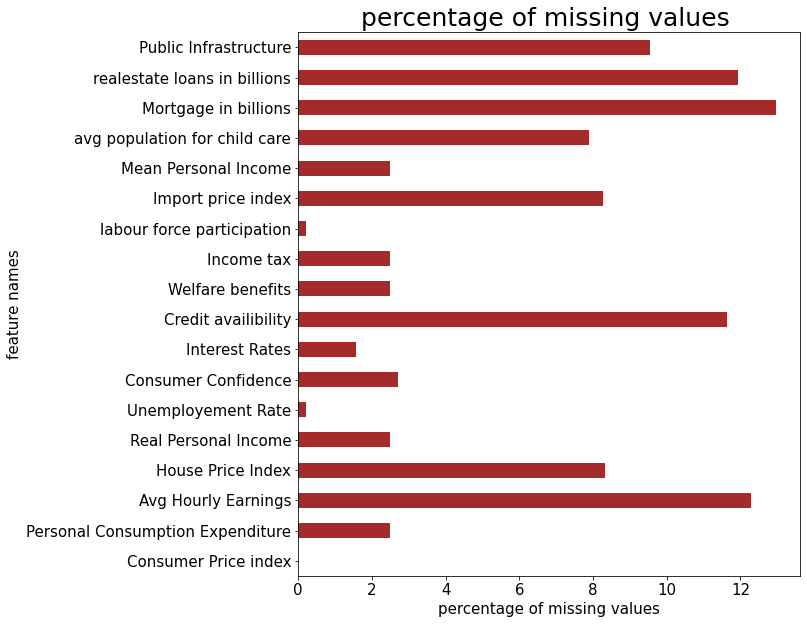

In [96]:
ax = miss.plot(kind='barh',figsize=(9,10),color='brown',fontsize=15)
plt.xlabel("percentage of missing values",fontsize=15)
plt.ylabel("feature names",fontsize=15)
plt.title("percentage of missing values ",fontsize=25)
plt.show()

In [98]:
data1.shape

(922, 18)

In [99]:
data1

Consumer Price index  Personal Consumption Expenditure  \
1947-01-01                21.480                               NaN   
1947-02-01                21.620                               NaN   
1947-03-01                22.000                               NaN   
1947-04-01                22.000                               NaN   
1947-05-01                21.950                               NaN   
...                          ...                               ...   
2023-06-01               303.841                           18485.4   
2023-07-01               304.348                           18621.3   
2023-08-01               306.269                           18689.9   
2023-09-01               307.481                           18823.4   
2023-10-01               307.619                           18864.7   

            Avg Hourly Earnings  House Price Index  Real Personal Income  \
1947-01-01                  NaN                NaN                   NaN   
1947-02-01                  NaN                NaN                   NaN   
1947-03-01                  NaN                NaN                   NaN   
1947-04-01                  NaN                NaN                   NaN   
1947-05-01                  NaN                NaN                   NaN   
...                         ...                ...                   ...   
2023-06-01                33.60            308.282             19066.014   
2023-07-01                33.73            310.110             19083.675   
2023-08-01                33.82            311.392             19101.296   
2023-09-01                33.93            312.313             19110.547   
2023-10-01                34.00                NaN             19148.104   

            Unemployement Rate  Consumer Confidence  Interest Rates  \
1947-01-01                 NaN                  NaN             NaN   
1947-02-01                 NaN                  NaN             NaN   
1947-03-01                 NaN                  NaN             NaN   
1947-04-01                 NaN                  NaN             NaN   
1947-05-01                 NaN                  NaN             NaN   
...                        ...                  ...             ...   
2023-06-01                 3.6            97.547263            5.08   
2023-07-01                 3.5            97.908865            5.12   
2023-08-01                 3.8            97.988878            5.33   
2023-09-01                 3.8            97.828249            5.33   
2023-10-01                 3.9            97.526417            5.33   

            Credit availibility  Welfare benefits  Income tax  \
1947-01-01                  NaN               NaN         NaN   
1947-02-01                  NaN               NaN         NaN   
1947-03-01                  NaN               NaN         NaN   
1947-04-01                  NaN               NaN         NaN   
1947-05-01                  NaN               NaN         NaN   
...                         ...               ...         ...   
2023-06-01                 5.25            1356.7      2712.9   
2023-07-01                 5.29            1358.1      2754.4   
2023-08-01                 5.50            1361.9      2782.4   
2023-09-01                 5.50            1363.0      2797.6   
2023-10-01                 5.50            1378.5      2791.2   

            labour force participation  Import price index  \
1947-01-01                         NaN                 NaN   
1947-02-01                         NaN                 NaN   
1947-03-01                         NaN                 NaN   
1947-04-01                         NaN                 NaN   
1947-05-01                         NaN                 NaN   
...                                ...                 ...   
2023-06-01                        62.6               139.4   
2023-07-01                        62.6               139.4   
2023-08-01                        62.8               140.3   
2023

### Dropping the null values

In [100]:
data1 =data1.dropna()

In [101]:
data1.isnull().sum()

Consumer Price index                0
Personal Consumption Expenditure    0
Avg Hourly Earnings                 0
House Price Index                   0
Real Personal Income                0
Unemployement Rate                  0
Consumer Confidence                 0
Interest Rates                      0
Credit availibility                 0
Welfare benefits                    0
Income tax                          0
labour force participation          0
Import price index                  0
Mean Personal Income                0
avg population for child care       0
Mortgage in billions                0
realestate loans in billions        0
Public Infrastructure               0
dtype: int64

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

### Checking for Duplicate values

In [102]:
duplicate = data1[data1.duplicated()]
 
print("Duplicate Rows :") 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


Empty DataFrame
Columns: [Consumer Price index, Personal Consumption Expenditure, Avg Hourly Earnings, House Price Index, Real Personal Income, Unemployement Rate, Consumer Confidence, Interest Rates, Credit availibility, Welfare benefits, Income tax, labour force participation, Import price index, Mean Personal Income, avg population for child care, Mortgage in billions, realestate loans in billions, Public Infrastructure]
Index: []

In [103]:
#### Data Quality report

In [104]:
data1.describe()

Consumer Price index  Personal Consumption Expenditure  \
count            171.000000                        171.000000   
mean             247.672836                      13230.401754   
std               23.651882                       2414.374314   
min              214.726000                       9886.300000   
25%              231.738000                      11266.750000   
50%              240.545000                      12756.700000   
75%              257.963500                      14540.650000   
max              307.481000                      18823.400000   

       Avg Hourly Earnings  House Price Index  Real Personal Income  \
count           171.000000         171.000000            171.000000   
mean             26.528246         195.327953          16473.270626   
std               3.330914          51.912426           1943.807466   
min              22.180000         133.997000          13460.827000   
25%              23.765000         150.148500          14689.838000   
50%              25.720000         183.658000          16177.334000   
75%              28.675000         214.218000          18060.041000   
max              33.930000         312.313000          22856.702000   

       Unemployement Rate  Consumer Confidence  Interest Rates  \
count          171.000000           171.000000      171.000000   
mean             6.098246            99.441460        0.844386   
std              2.331207             1.496168        1.270420   
min              3.400000            96.182427        0.050000   
25%              4.000000            98.310504        0.090000   
50%              5.400000            99.252403        0.160000   
75%              8.050000           100.907987        1.185000   
max             14.700000           101.627035        5.330000   

       Credit availibility  Welfare benefits   Income tax  \
count           171.000000        171.000000   171.000000   
mean              1.339708        929.851462  2010.838012   
std               1.222425        183.735915   535.663768   
min               0.250000        662.000000  1133.500000   
25%               0.750000        785.450000  1646.150000   
50%               0.750000        899.900000  1970.700000   
75%               1.750000       1070.300000  2224.150000   
max               5.500000       1363.000000  3169.300000   

       labour force participation  Import price index  Mean Personal Income  \
count                  171.000000          171.000000            171.000000   
mean                    63.025146          131.353801          14506.266082   
std                      0.931671            8.559400           1611.855810   
min                     60.100000          117.200000          12193.200000   
25%                     62.600000          124.400000          13009.450000   
50%                     62.900000          128.000000          14176.700000   
75%                     63.450000          139.850000          15885.250000   
max                     65.500000          148.500000          20422.600000   

       avg population for child care  Mortgage in billions  \
count                     171.000000            171.000000   
mean                      901.970760           1779.440707   
std                        67.233741            598.885959   
min                       676.700000            974.154600   
25%                       849.650000           1334.213250   
50%                       877.200000           1632.724000   
75%                       957.300000           2140.593300   
max                      1049.800000           2988.625300   

       realestate loans in billions  Public Infrastructure  
count                    171.000000             171.000000  
mean                    1965.315649          318056.859649  
std                      460.045486           42679.826703  
min                     1419.113000          262177.000000  
25%                     1536.468300          286160.500000  

### EDA (Exploratory Data Analysis)

#### Boxplots for outliers

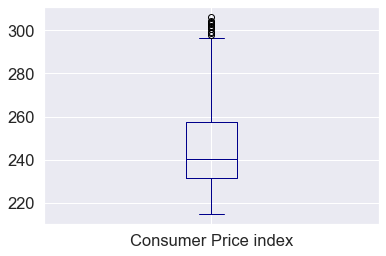

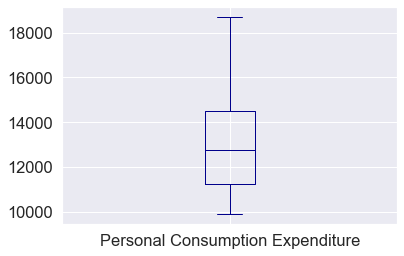

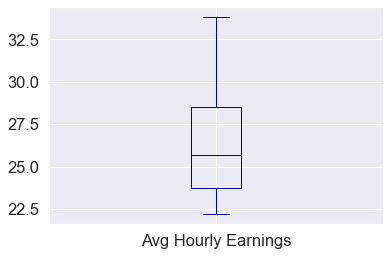

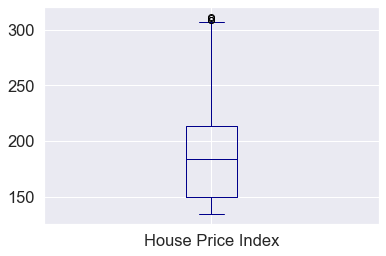

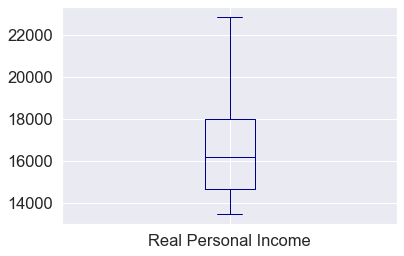

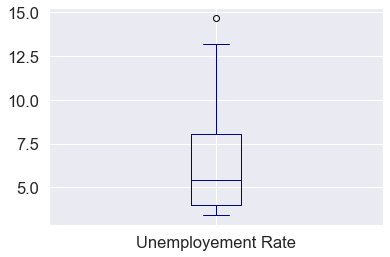

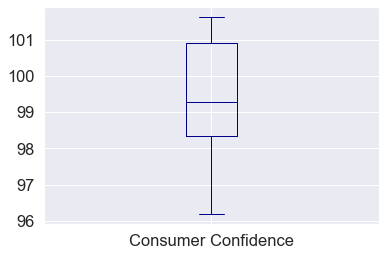

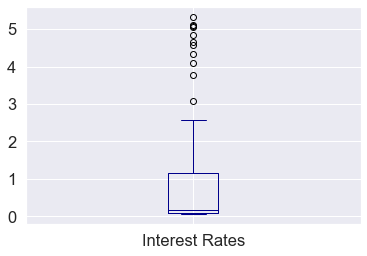

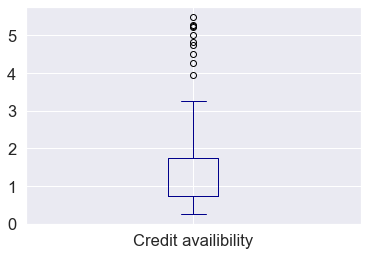

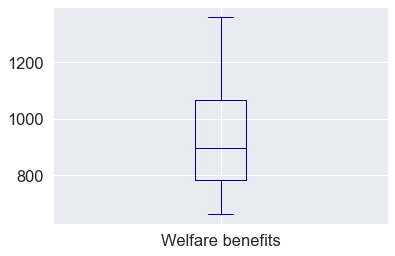

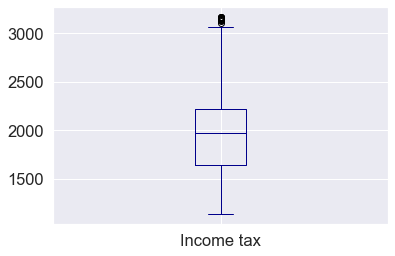

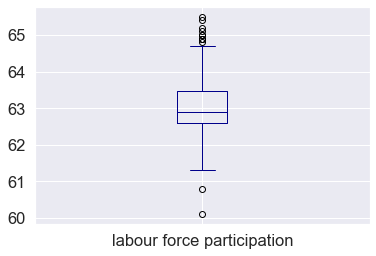

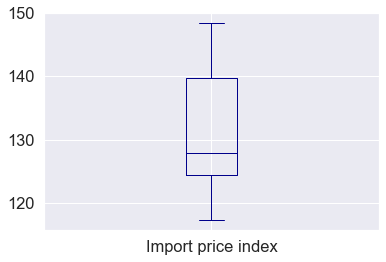

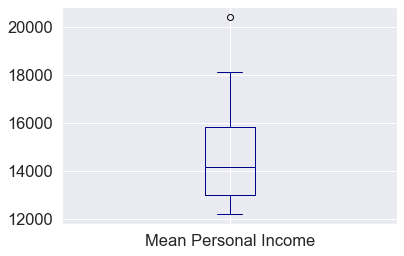

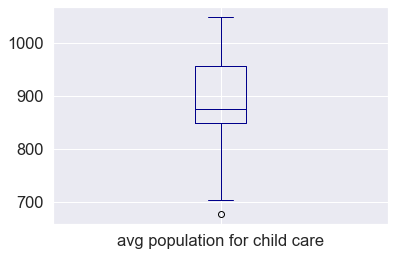

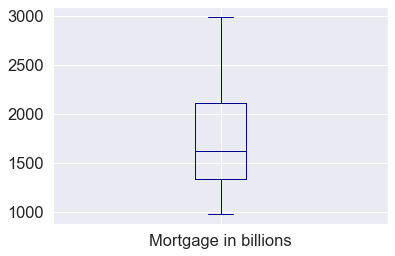

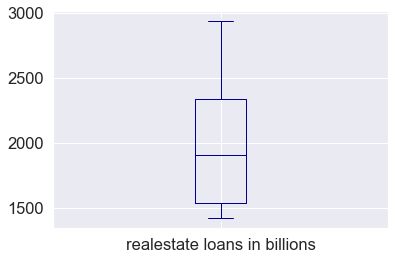

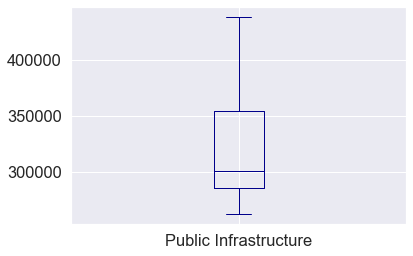

In [75]:
#### Code by Vineela Geddam
sns.set(font_scale=1.5)

import matplotlib.pyplot as plt

for column in data1:
    plt.figure()
    data1.boxplot([column],color='darkblue')

In [76]:
### Correlation Matrix

In [77]:
#### Code by Vineela Geddam
data1.corr()

Consumer Price index  \
Consumer Price index                          1.000000   
Personal Consumption Expenditure              0.989033   
Avg Hourly Earnings                           0.983799   
House Price Index                             0.980519   
Real Personal Income                          0.884356   
Unemployement Rate                           -0.647885   
Consumer Confidence                          -0.224575   
Interest Rates                                0.684111   
Credit availibility                           0.588510   
Welfare benefits                              0.981041   
Income tax                                    0.955865   
labour force participation                   -0.690617   
Import price index                            0.256568   
Mean Personal Income                          0.857917   
avg population for child care                 0.584126   
Mortgage in billions                          0.947677   
realestate loans in billions                  0.938228   
Public Infrastructure                         0.863174   

                                  Personal Consumption Expenditure  \
Consumer Price index                                      0.989033   
Personal Consumption Expenditure                          1.000000   
Avg Hourly Earnings                                       0.984393   
House Price Index                                         0.982021   
Real Personal Income                                      0.909966   
Unemployement Rate                                       -0.710140   
Consumer Confidence                                      -0.131098   
Interest Rates                                            0.672045   
Credit availibility                                       0.579912   
Welfare benefits                                          0.983581   
Income tax                                                0.968010   
labour force participation                               -0.697211   
Import price index                                        0.171234   
Mean Personal Income                                      0.882905   
avg population for child care                             0.643542   
Mortgage in billions                                      0.958773   
realestate loans in billions                              0.954520   
Public Infrastructure                                     0.856805   

                                  Avg Hourly Earnings  House Price Index  \
Consumer Price index                         0.983799           0.980519   
Personal Consumption Expenditure             0.984393           0.982021   
Avg Hourly Earnings                          1.000000           0.984290   
House Price Index                            0.984290           1.000000   
Real Personal Income                         0.942355           0.895789   
Unemployement Rate                          -0.606117          -0.613223   
Consumer Confidence                         -0.165842          -0.237481   
Interest Rates                               0.624789           0.616114   
Credit availibility                          0.520171           0.506545   
Welfare benefits                             0.990871           0.967665   
Income tax                                   0.959796           0.958143   
labour force participation                  -0.749197          -0.680213   
Import price index                           0.130428           0.169015   
Mean Personal Income                         0.924203           0.870476   
avg population for child care                0.550593           0.553908   
Mortgage in billions                         0.975726           0.963905   
realestate loans in billions                 0.970162           0.963405   
Public Infrastructure                        0.896361           0.889789   

                                  Real Personal Income  Unemployement Rate  \
Consumer Price index                          0.884356           -0.647885   

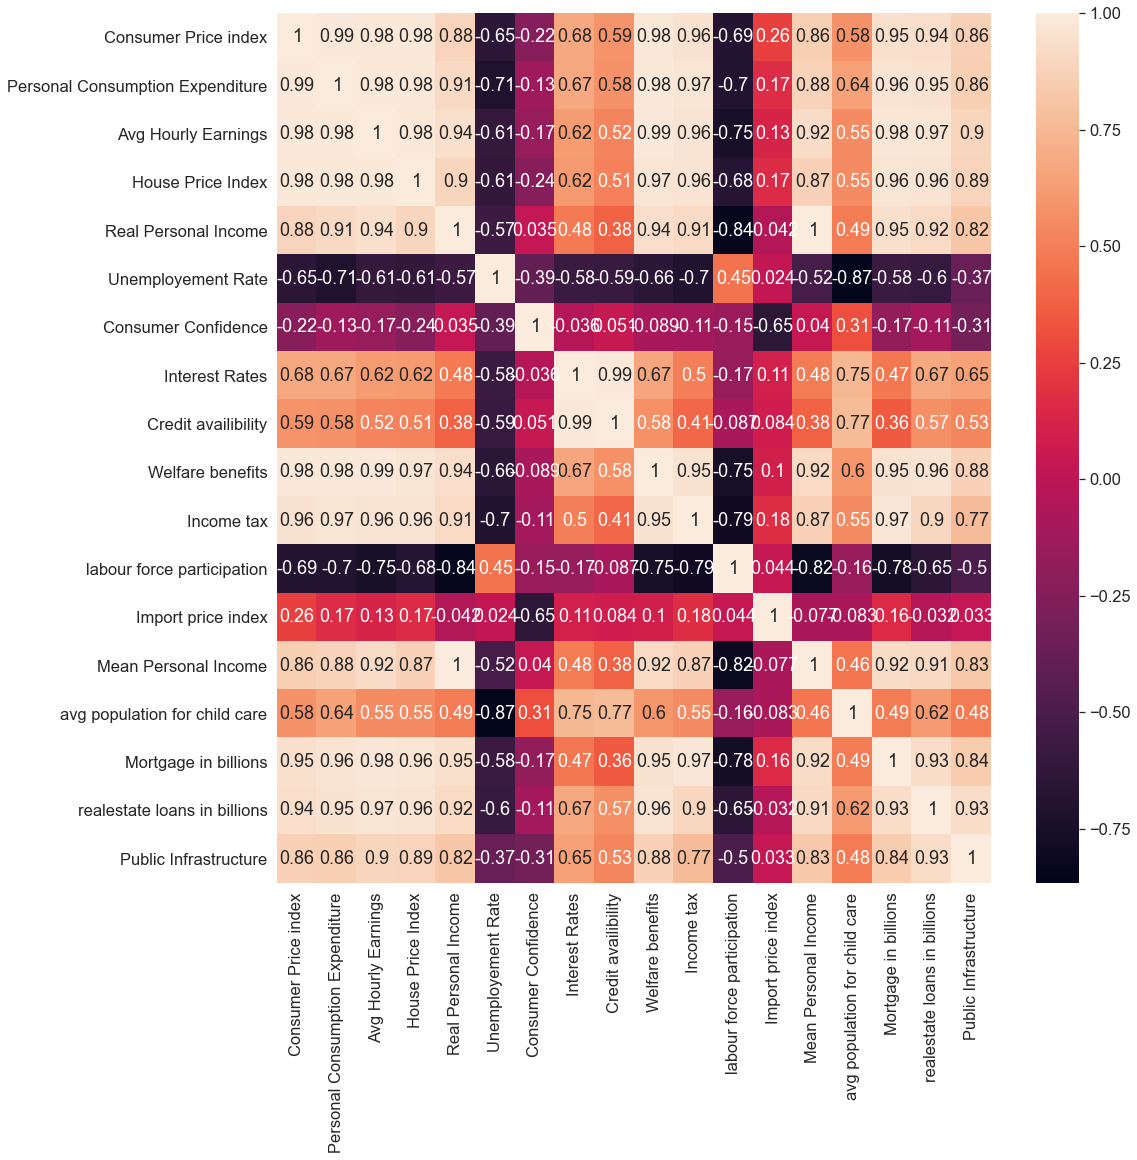

In [78]:
#### Code by Vineela Geddam
sns.set(font_scale=1.5)
import seaborn as sns

plt.figure(figsize=(16, 16))
sns.heatmap(data1.corr(), annot=True);

In [79]:
## Highest and correlated features with dependant variable.

In [80]:
data1.corrwith(data1["Personal Consumption Expenditure"])

Consumer Price index                0.989033
Personal Consumption Expenditure    1.000000
Avg Hourly Earnings                 0.984393
House Price Index                   0.982021
Real Personal Income                0.909966
Unemployement Rate                 -0.710140
Consumer Confidence                -0.131098
Interest Rates                      0.672045
Credit availibility                 0.579912
Welfare benefits                    0.983581
Income tax                          0.968010
labour force participation         -0.697211
Import price index                  0.171234
Mean Personal Income                0.882905
avg population for child care       0.643542
Mortgage in billions                0.958773
realestate loans in billions        0.954520
Public Infrastructure               0.856805
dtype: float64

<AxesSubplot:>

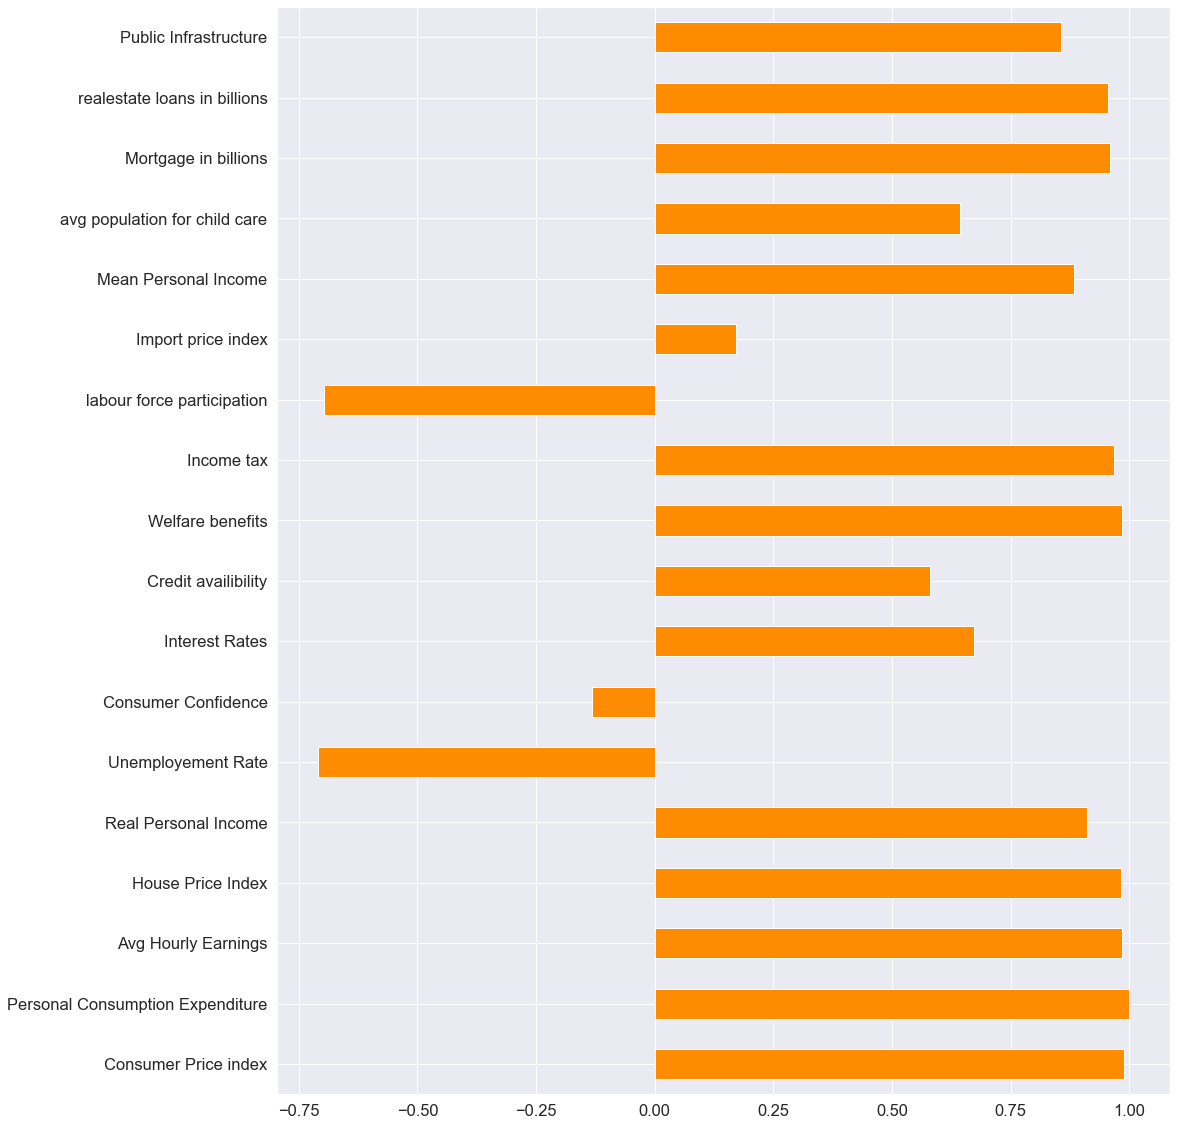

In [81]:
sns.set(font_scale=1.5)
data1.corrwith(data1["Personal Consumption Expenditure"]).plot(kind='barh',color='darkorange',figsize=(16,20))

## We saw negative correlation for the variables Unemployment rate, Consumer Confidence and labour force participation with dependant variable

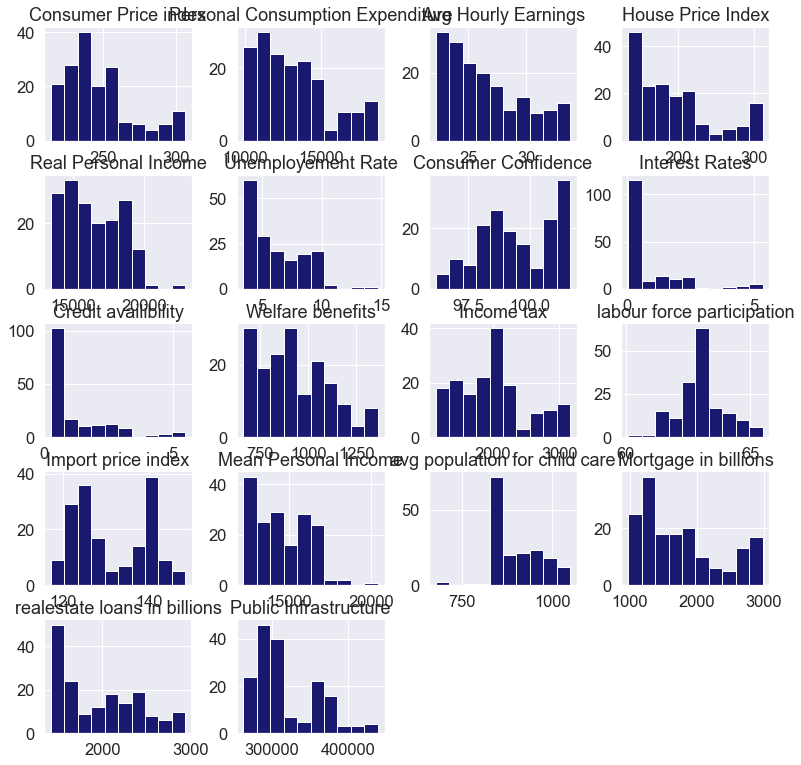

In [82]:
#### Code by Maheedhar Attaluri
sns.color_palette("YlOrBr", as_cmap=True)

data1.hist(figsize=(13,13),color='midnightblue')
plt.show()

## univariate: create a visual for each feature in your data set - there should be one dependent variable and at least 10 independent variables (1 pt)

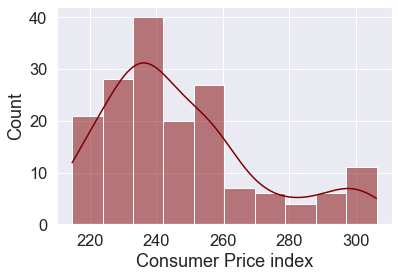

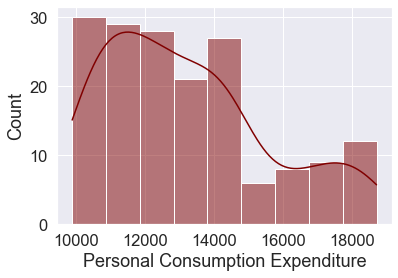

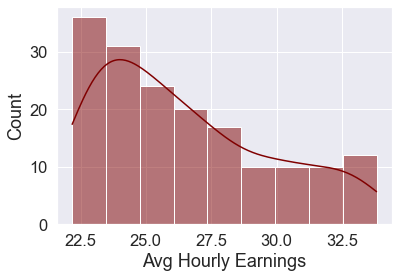

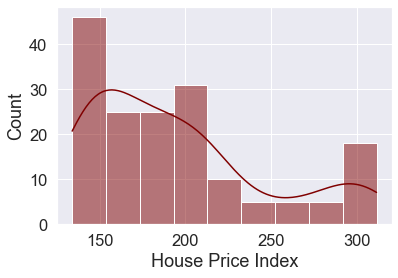

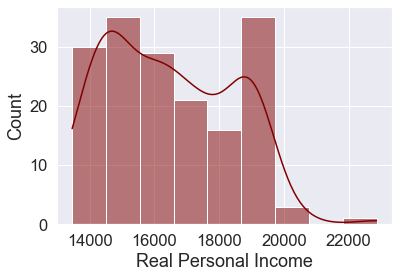

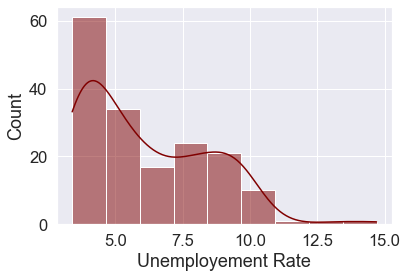

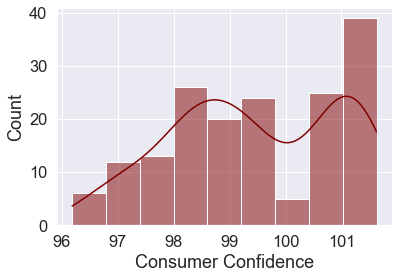

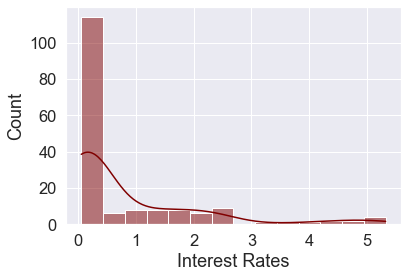

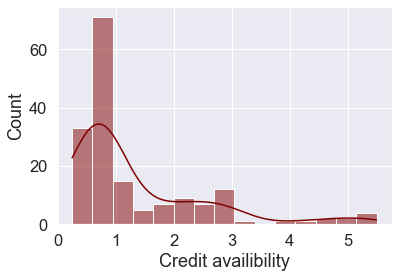

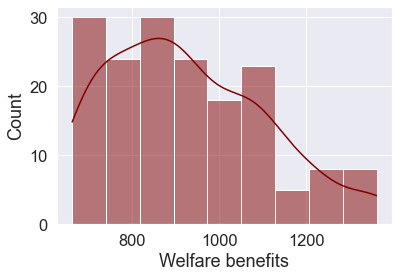

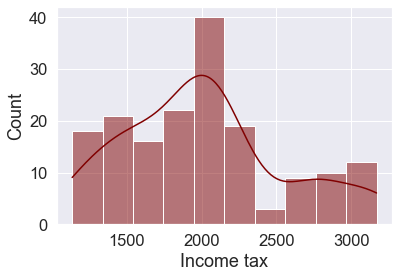

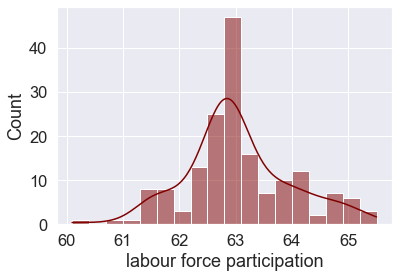

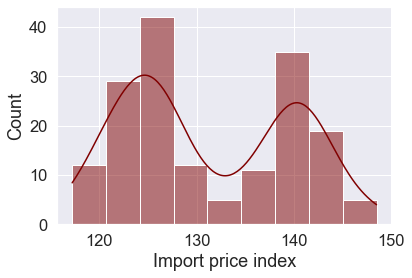

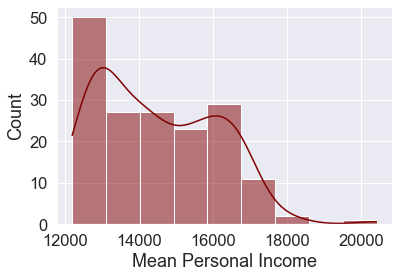

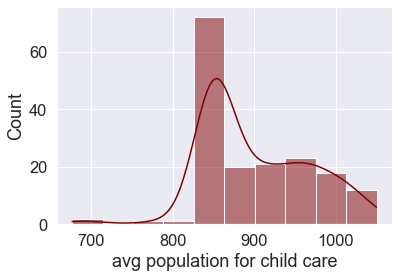

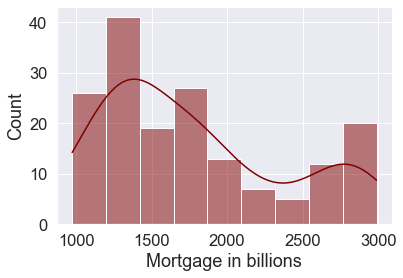

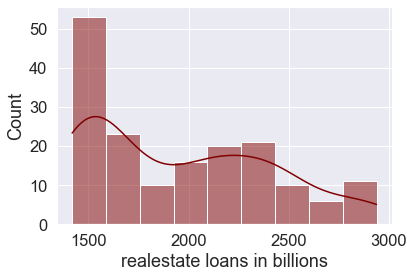

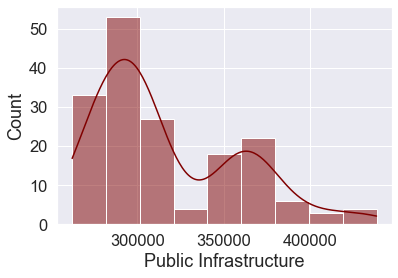

Index(['Consumer Price index', 'Personal Consumption Expenditure',
       'Avg Hourly Earnings', 'House Price Index', 'Real Personal Income',
       'Unemployement Rate', 'Consumer Confidence', 'Interest Rates',
       'Credit availibility', 'Welfare benefits', 'Income tax',
       'labour force participation', 'Import price index',
       'Mean Personal Income', 'avg population for child care',
       'Mortgage in billions', 'realestate loans in billions',
       'Public Infrastructure'],
      dtype='object')

In [83]:
#### Code by Maheedhar Attaluri

cols  = data1.columns
for c in cols:
    if c!= "Personal Consumption Expenditure" or c!='Year':
        sns.histplot(x=data1[c],color='maroon',kde=True)
        plt.xlabel(c)

        plt.show()
    else:
        pass

cols

## Bivariate: run visuals for every independent variable in your data set by the dependent variable (4 pts) bar charts, line graphs, scatter plots, etc.

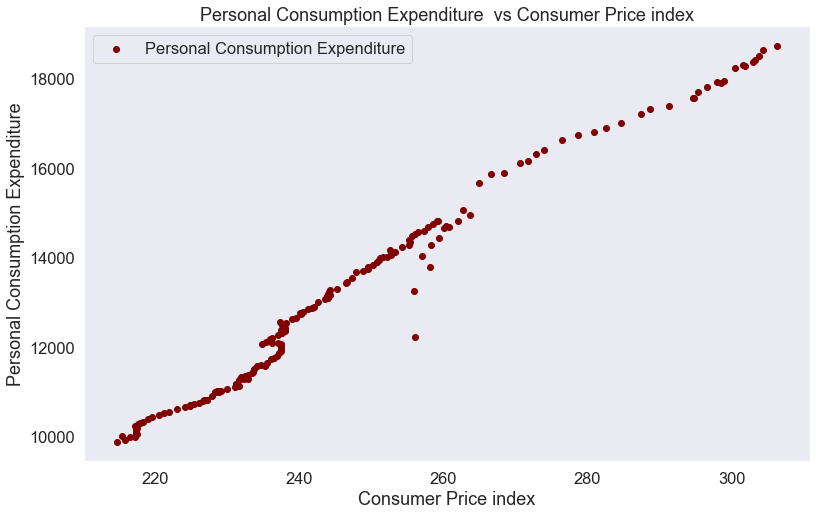

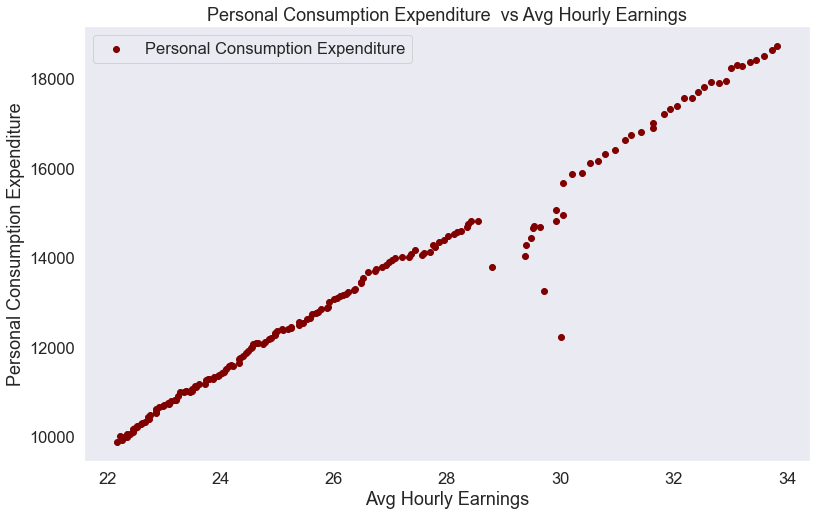

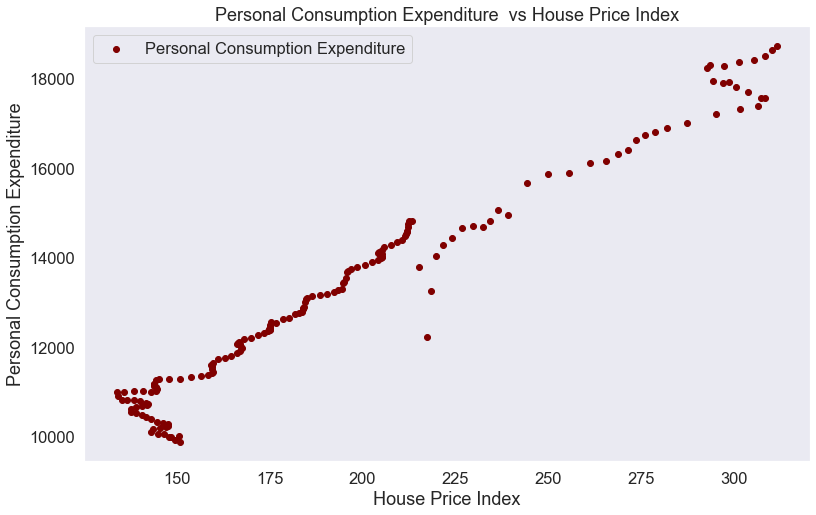

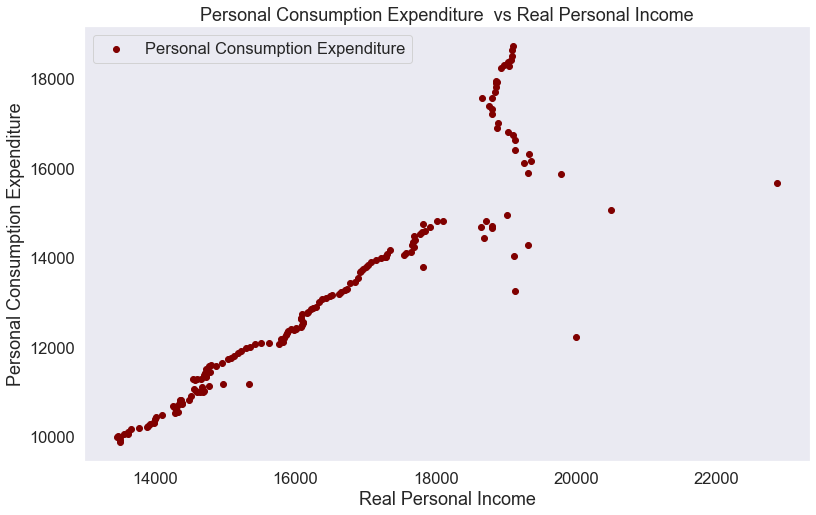

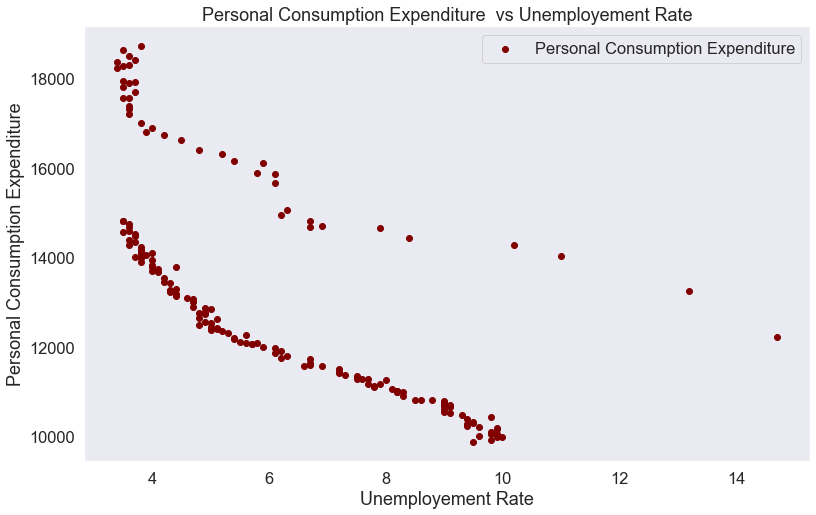

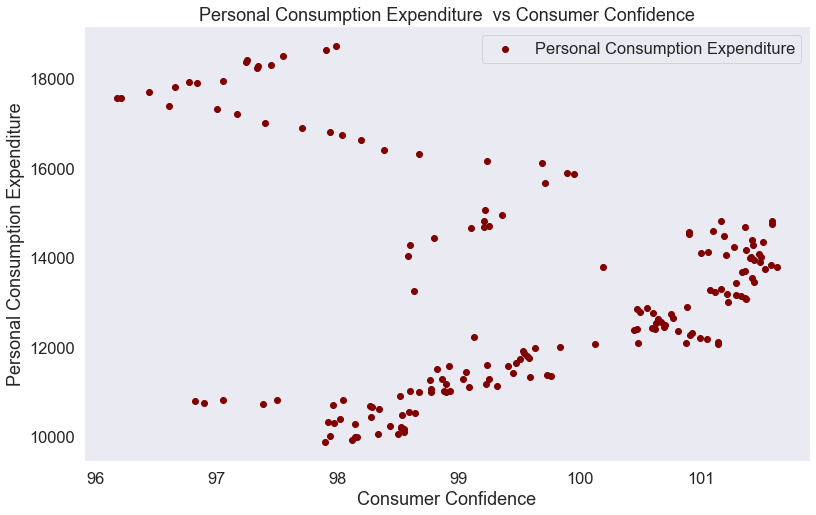

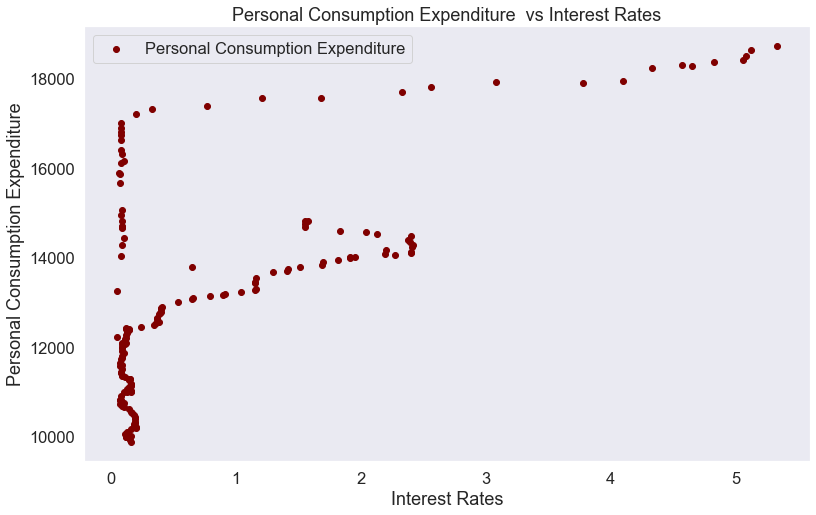

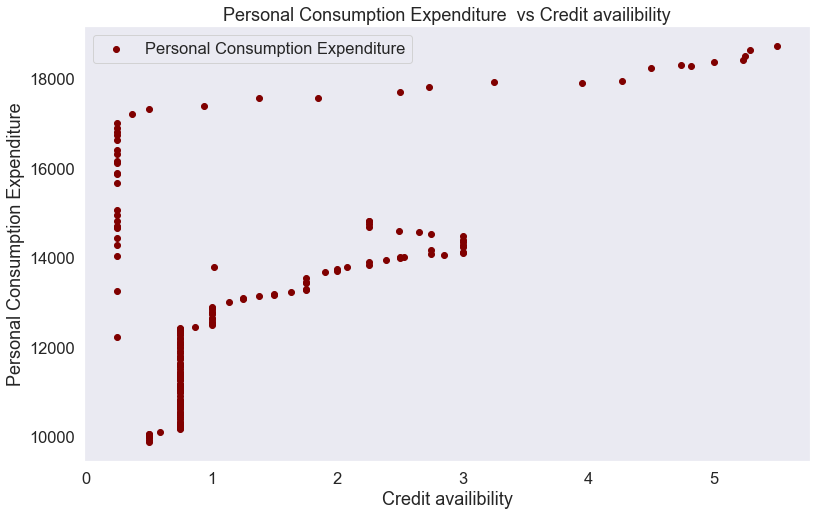

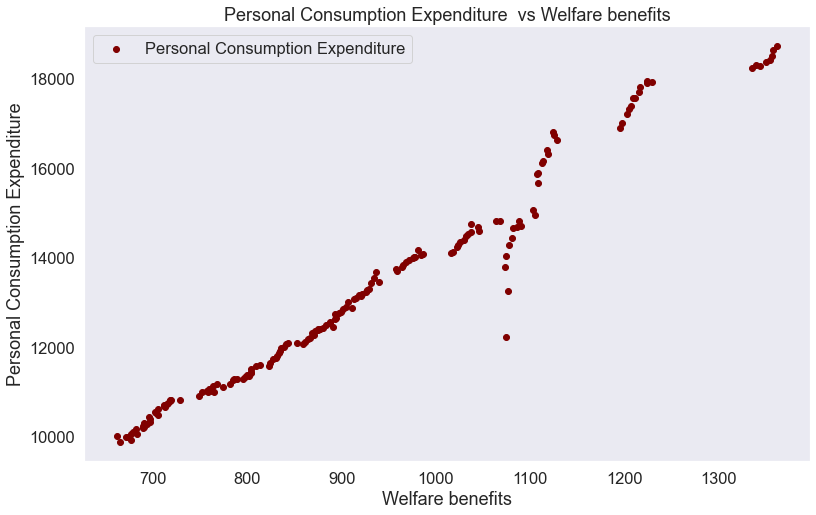

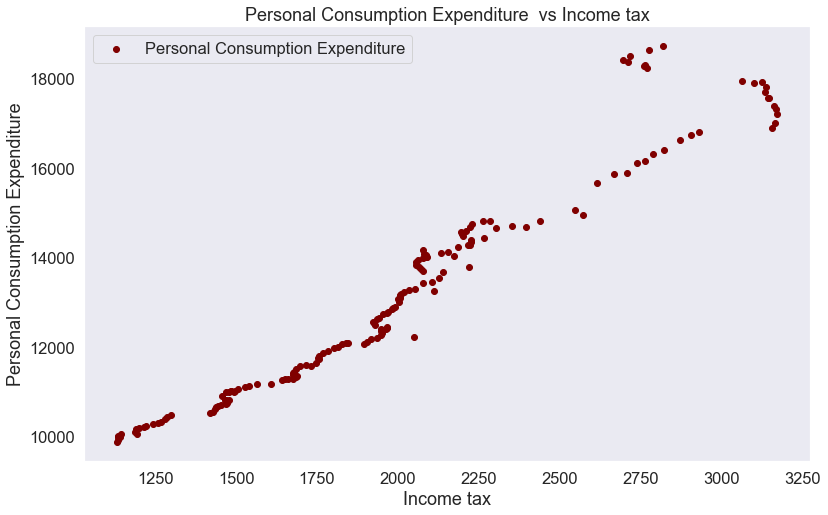

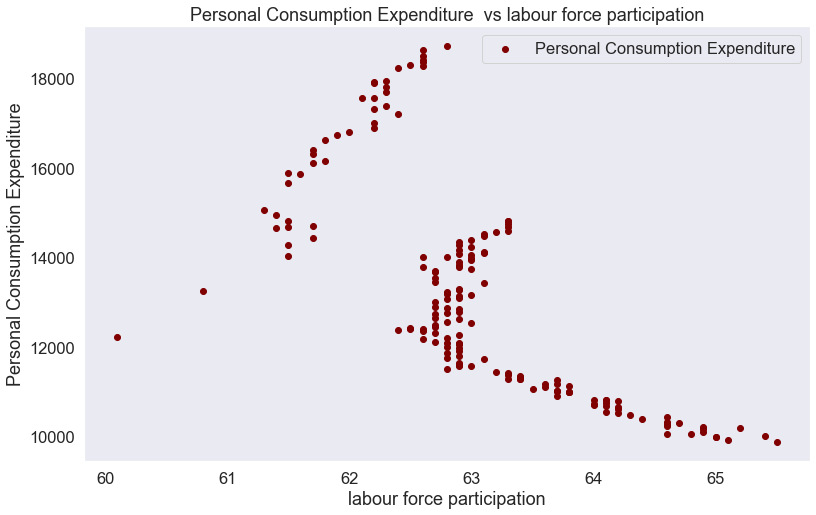

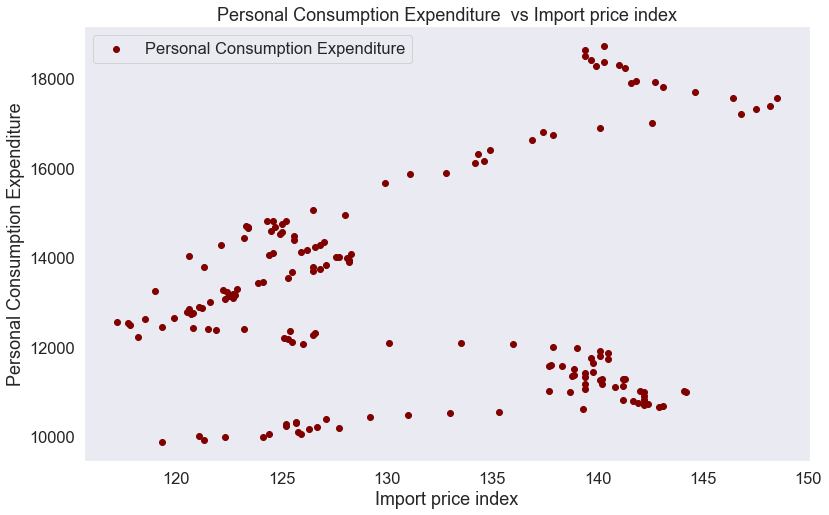

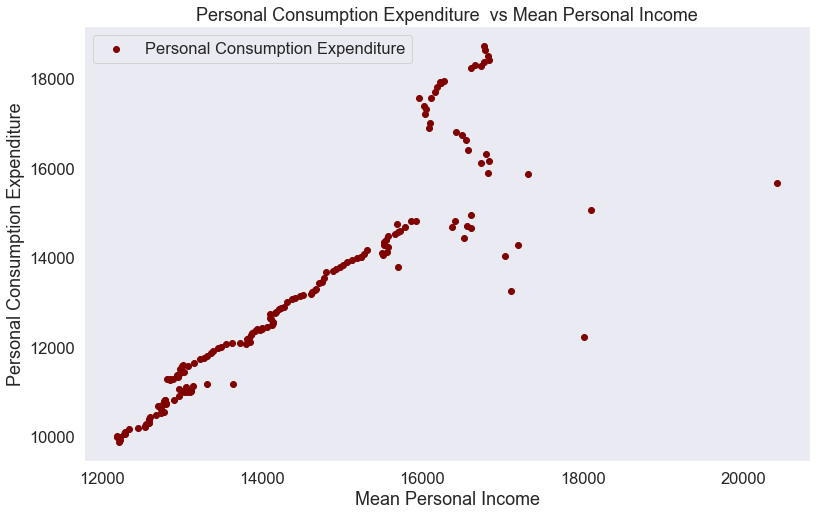

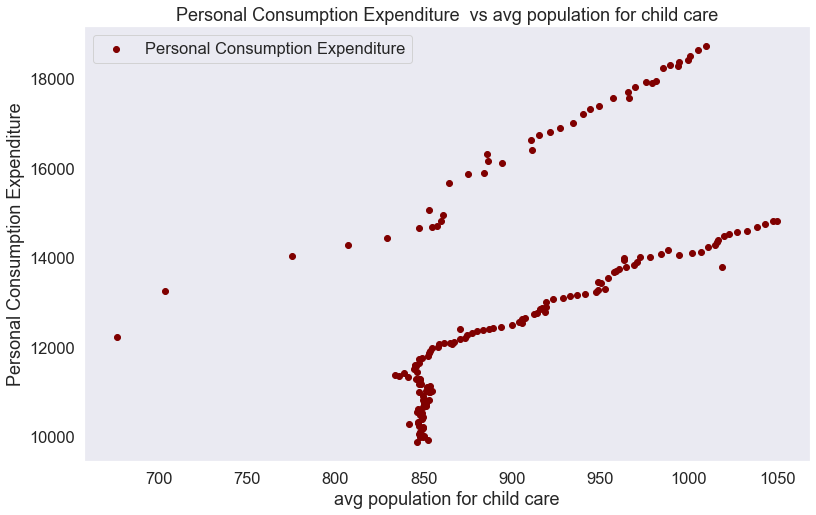

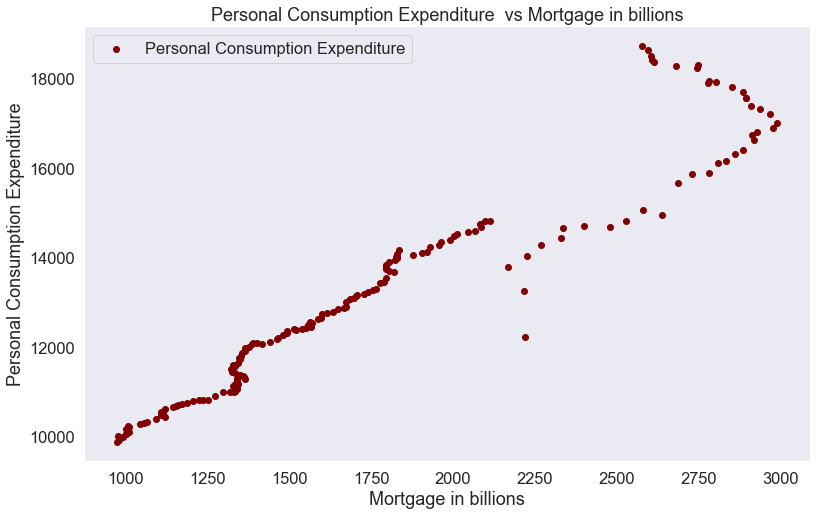

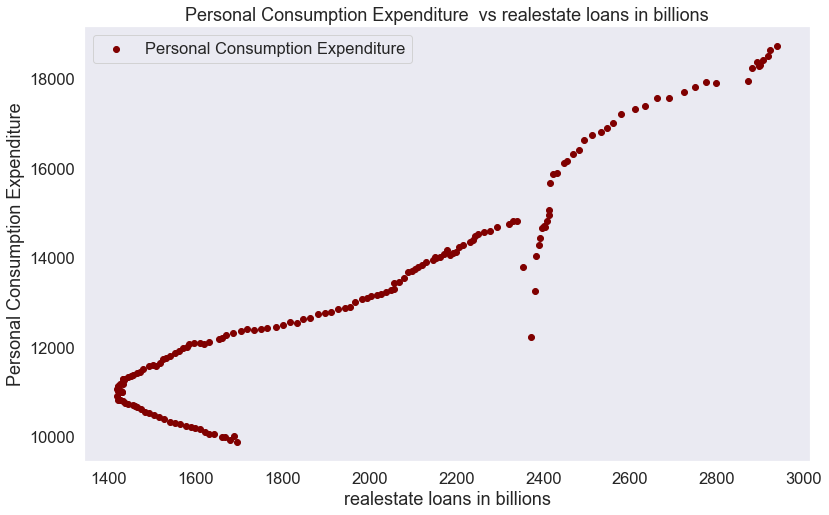

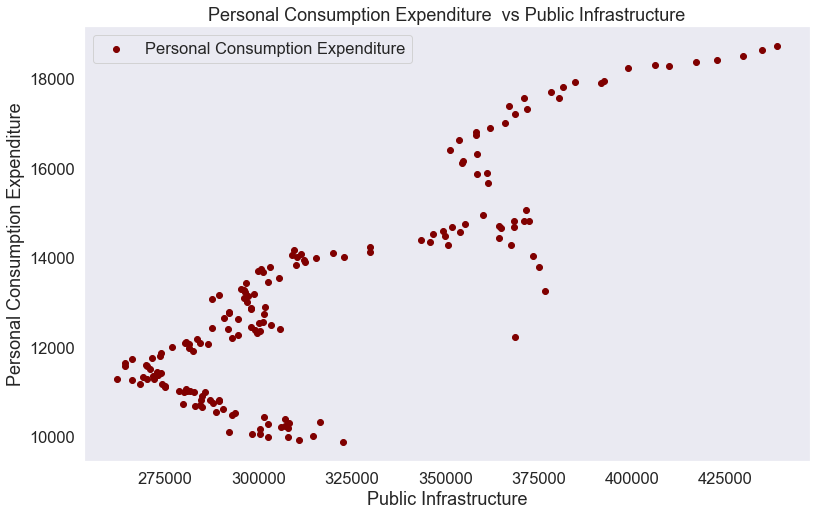

In [84]:
#### Code by Nellapalli Sai Nikhil


sns.set(font_scale=1.5)

cols  = data1.columns
for c in cols:
    if c!= "Personal Consumption Expenditure":
        plt.figure(figsize=(13,8))
        plt.scatter(y="Personal Consumption Expenditure",x=c,data =data1,color='maroon')
        plt.title("Personal Consumption Expenditure "+ " vs " + str(c))
        plt.xlabel(c)
        plt.ylabel("Personal Consumption Expenditure")
        plt.grid()
        plt.legend()
        plt.show()
    else:
        pass



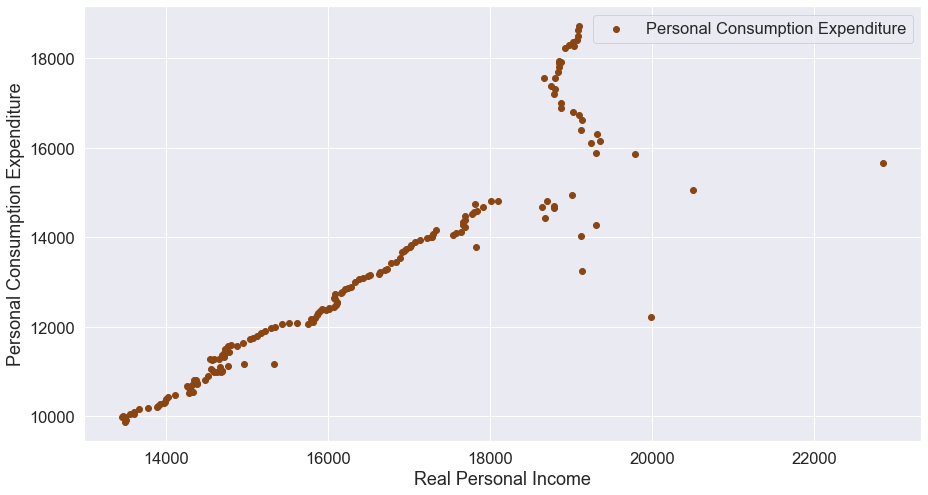

In [85]:
#### Code by Nellapalli Sai Nikhil

plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)

y="Personal Consumption Expenditure"
x="Real Personal Income"
plt.scatter(y="Personal Consumption Expenditure",x="Real Personal Income",data =data1,color='saddlebrown')
plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.show()

### above plot we see that the with increase in the real personal income the personal consumption expenditure also increases 

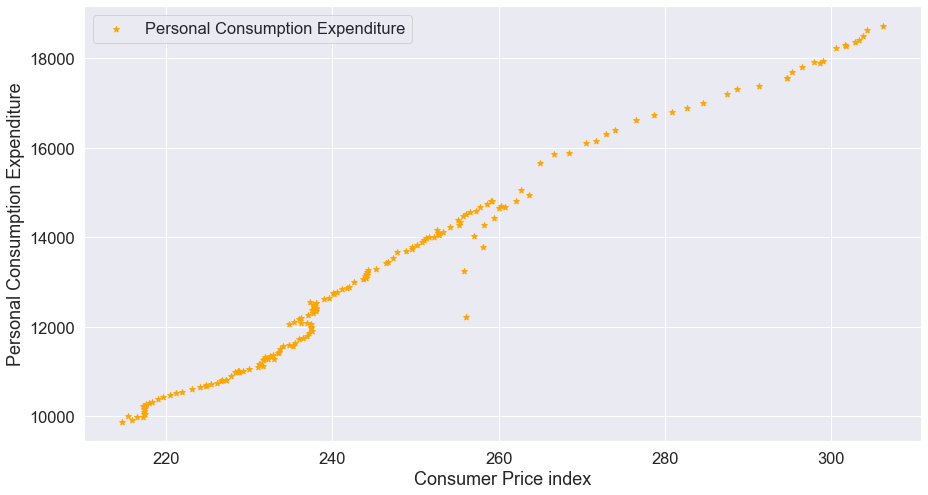

In [86]:
#### Code by Nellapalli Sai Nikhil

plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)

y="Personal Consumption Expenditure"
x="Consumer Price index"
plt.scatter(y="Personal Consumption Expenditure",x="Consumer Price index",data =data1,marker="*",color="orange")
plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.show()

### above plot we see that the with increase in the consumer price index  the personal consumption expenditure increases linearlhy 

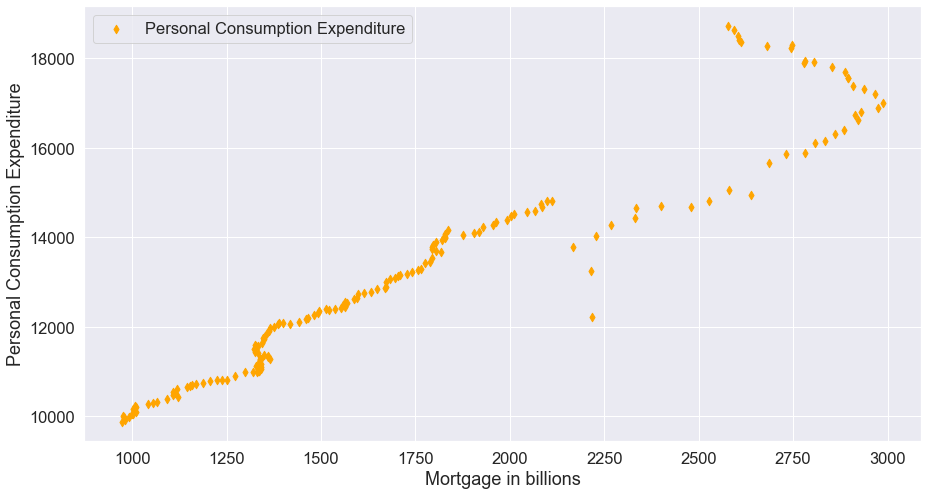

In [87]:
#### Code by Nellapalli Sai Nikhil

plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)

y="Personal Consumption Expenditure"
x="Mortgage in billions"
plt.scatter(y="Personal Consumption Expenditure",x="Mortgage in billions",data =data1,marker="d",color="orange")

plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.show()

### above plot shows thata upto 2000 billions , with the increase in the mortgage the consumer spending also increases

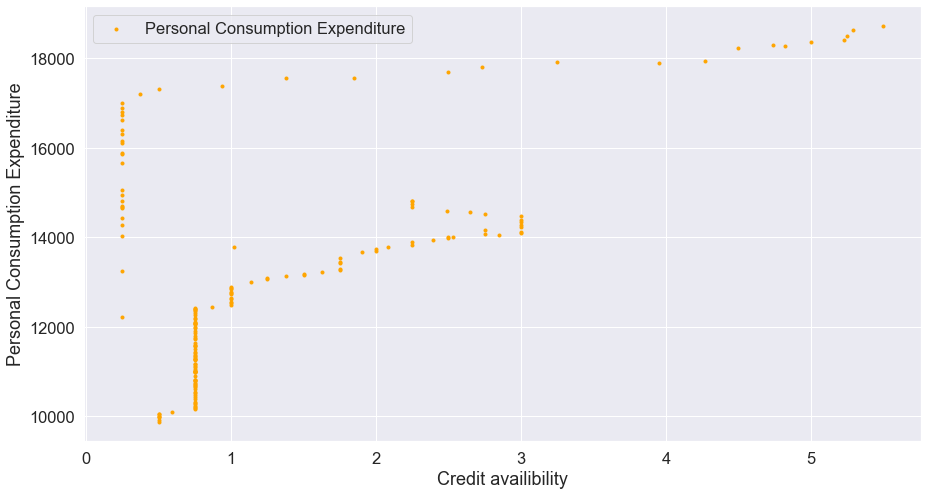

In [88]:
#### Code by Nellapalli Sai Nikhil
plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)

y="Personal Consumption Expenditure"
x="Credit availibility"
plt.scatter(y="Personal Consumption Expenditure",x="Credit availibility",data =data1,marker=".",color="orange")
plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.show()

In [89]:
## 

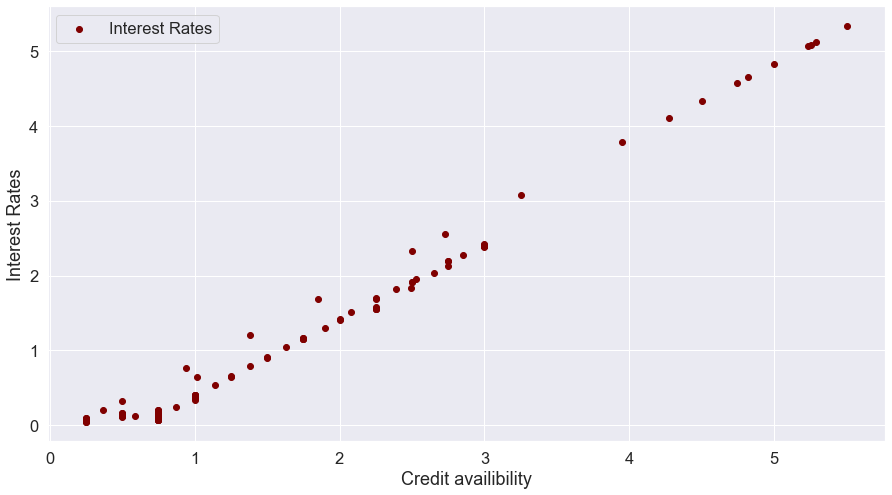

In [90]:
#### Code by Nellapalli Sai Nikhil
plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
y="Interest Rates"
x="Credit availibility"
plt.scatter(y="Interest Rates",x="Credit availibility",data =data1,color='maroon')
plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.show()

### from the above plots there was linear relationship observed between the credit availibility and the interset rates

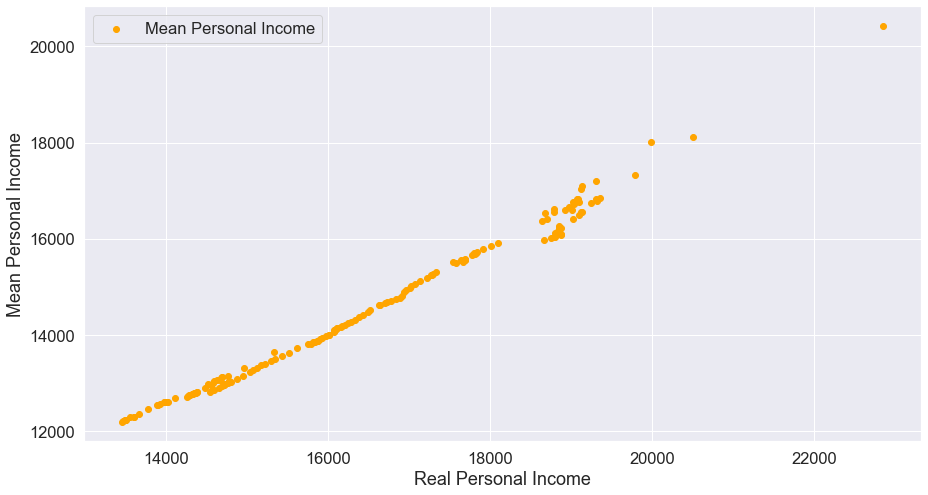

In [91]:
#### Code by Nellapalli Sai Nikhil
plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
y="Mean Personal Income"
x="Real Personal Income"
plt.scatter(y="Mean Personal Income",x="Real Personal Income",data =data1,color="orange")
plt.xlabel(x)
plt.ylabel(y)
plt.legend()

plt.show()

## from the above plot the the mean personal income and the real personal income shows some liner trend and we have also observed the influential point , which is above 20000 DOLLARS

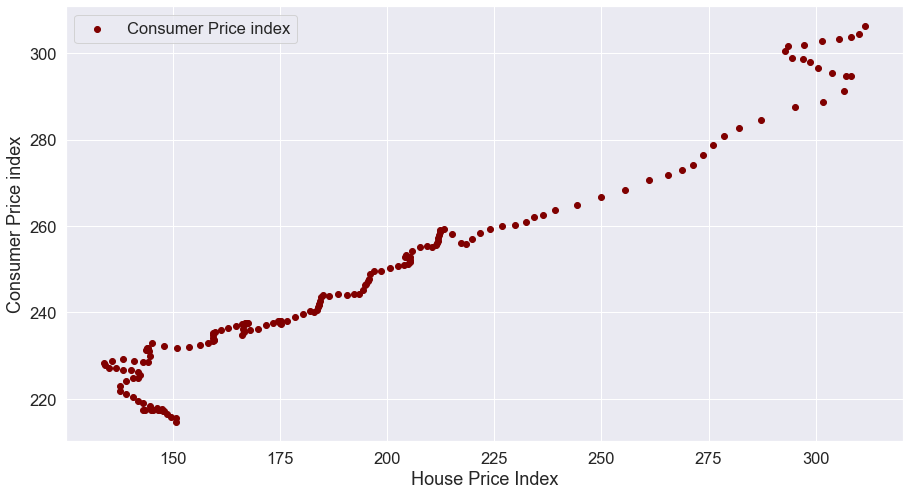

In [92]:
#### Code by Nellapalli Sai Nikhil
plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
x="House Price Index"
y="Consumer Price index"
plt.scatter(x="House Price Index",y="Consumer Price index",data =data1,color="maroon")
plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.show()

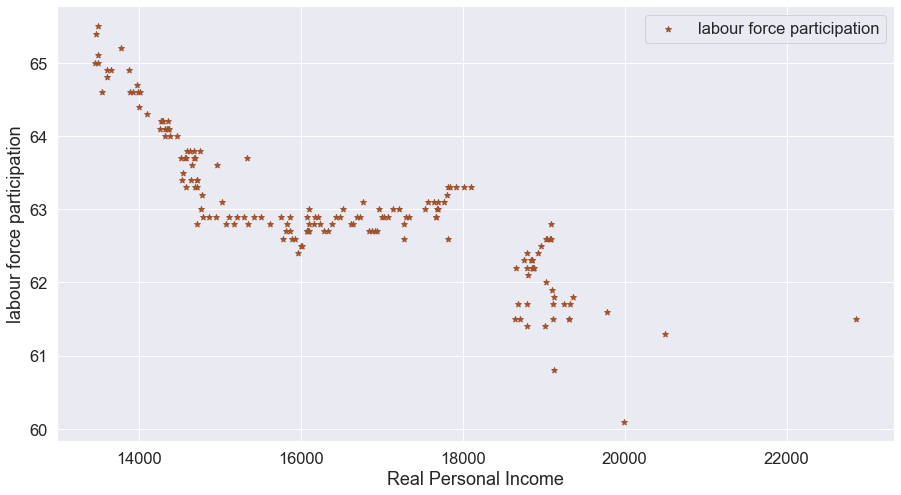

In [93]:
#### Code by Nellapalli Sai Nikhil
plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
y="labour force participation"
x="Real Personal Income"
plt.scatter(y="labour force participation",x="Real Personal Income",data =data1,marker="*",color="sienna")
plt.xlabel(x)
plt.ylabel(y)
plt.legend()

plt.show()

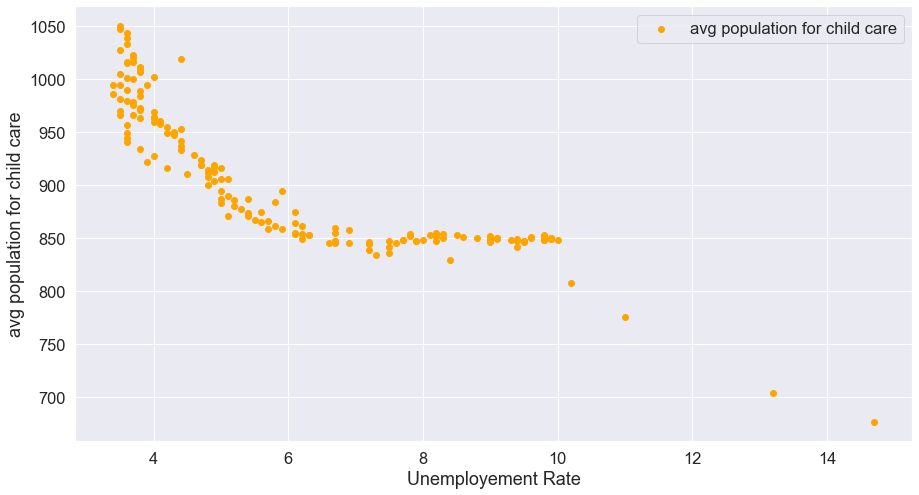

In [94]:
#### Code by Nellapalli Sai Nikhil
plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
y="avg population for child care"
x="Unemployement Rate"
plt.scatter(y="avg population for child care",x="Unemployement Rate",data =data1,color="orange")
plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.show()

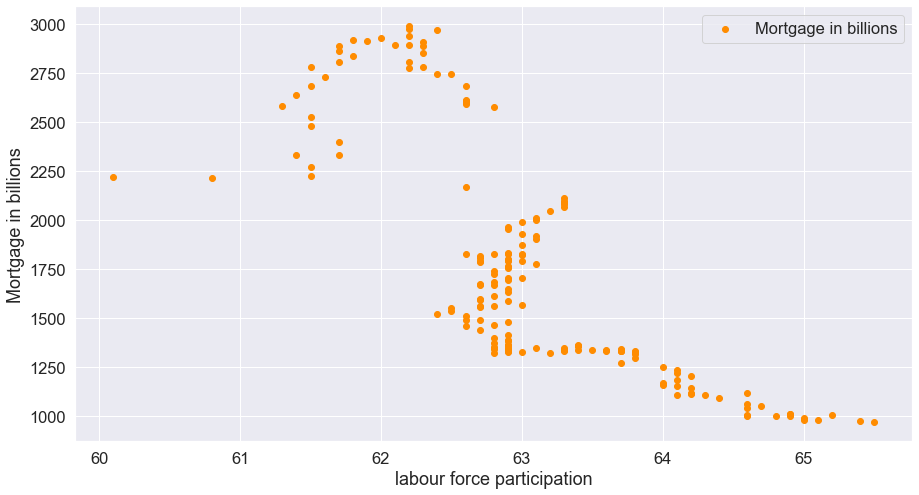

In [95]:
#### Code by Nellapalli Sai Nikhil
plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
y="Mortgage in billions"
x="labour force participation"
plt.scatter(y="Mortgage in billions",x="labour force participation",data =data1,color='darkorange')
plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.show()

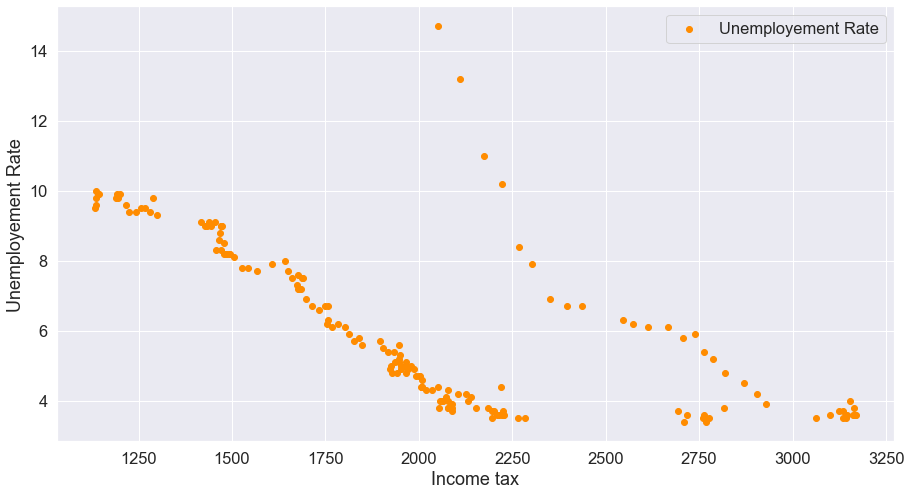

In [96]:
#### Code by Nellapalli Sai Nikhil
plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
x="Income tax"
y="Unemployement Rate"
plt.scatter(x="Income tax",y="Unemployement Rate",data =data1,color="darkorange")
plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.show()

### We extract the year from the index column and we can use this year to plot the bar plots,

In [97]:
data1.index = pd.to_datetime(data1.index)

In [106]:
#### Code by Sai Sri Raj Nallam

import datetime as dt


data1['Year'] = data1.index.year

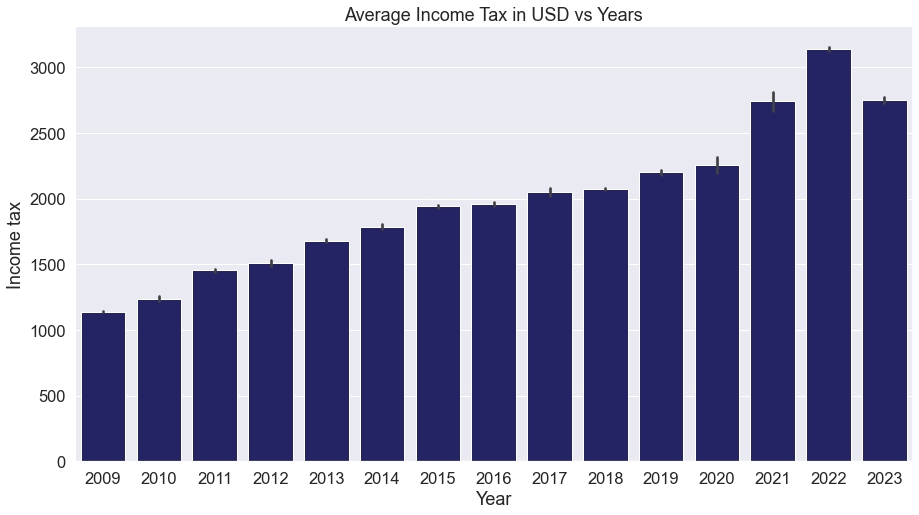

In [107]:
sns.color_palette("YlOrBr", as_cmap=True)
sns.set(font_scale=1.5)
plt.figure(figsize=(15,8))
sns.barplot(x="Year", y="Income tax", data=data1,color='midnightblue')
plt.title("Average Income Tax in USD vs Years")
plt.show()

### With the increase in each year the income tax also increases and there was a drop observed from year 2022 to 2023

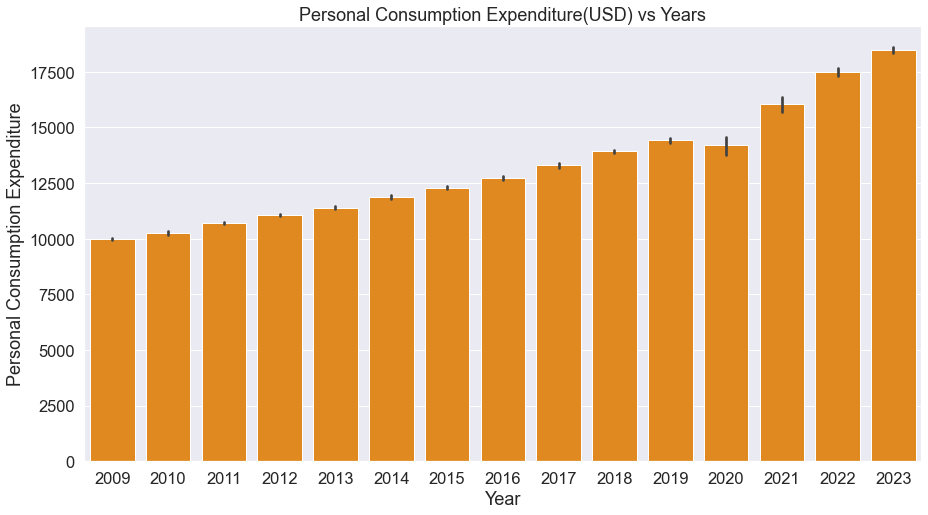

In [108]:
#### Code by Sai Sri Raj Nallam
plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
sns.barplot(x='Year',y='Personal Consumption Expenditure',data=data1,color='darkorange')
plt.title("Personal Consumption Expenditure(USD) vs Years")
plt.show()

### from the above plot With the increase in each year the personal consumption expenditture

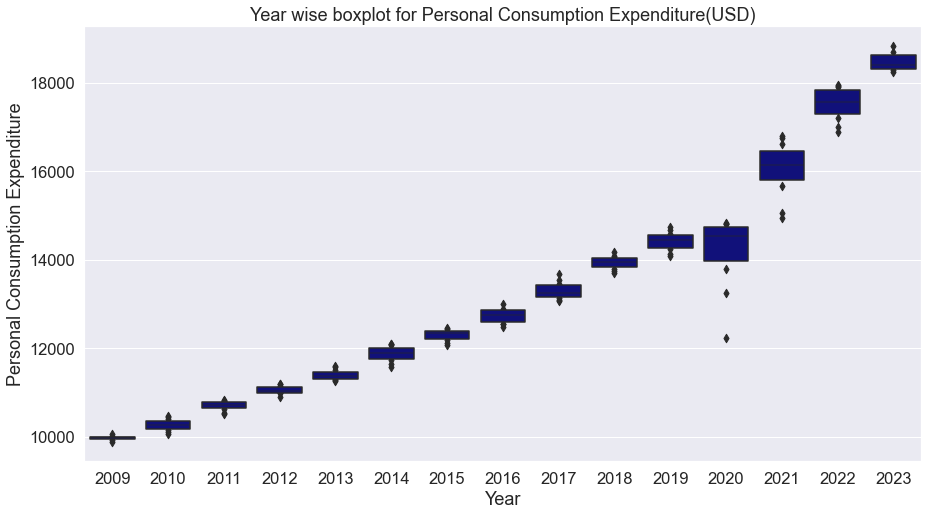

In [109]:
#### Code by Sai Sri Raj Nallam
sns.set(font_scale=1.5)
plt.figure(figsize=(15,8))

sns.boxenplot(x='Year',y='Personal Consumption Expenditure',data=data1,color='darkblue')
plt.title("Year wise boxplot for Personal Consumption Expenditure(USD)")
plt.show()

### from the above boxplot the the personal consumption expenditure increases and the only in the year 2020, there was disruption observed in the data (from the backgroud research it may be due the economic disruption due to covid 19 pandemic)

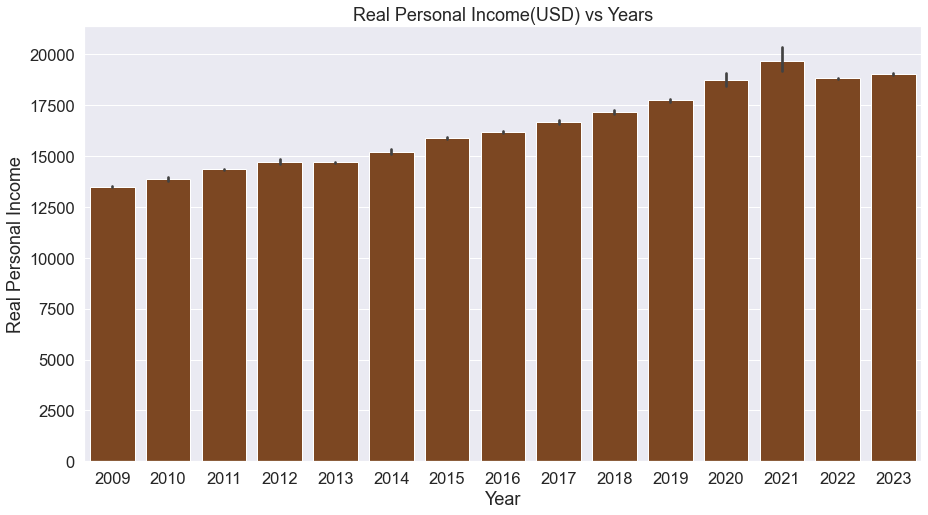

In [110]:
#### Code by Sai Sri Raj Nallam
sns.set(font_scale=1.5)
plt.figure(figsize=(15,8))
sns.barplot(x='Year',y= 'Real Personal Income',data=data1,color='saddlebrown') 
plt.title("Real Personal Income(USD) vs Years")
plt.show()

### from the above barplot the the real personal income increases with each year

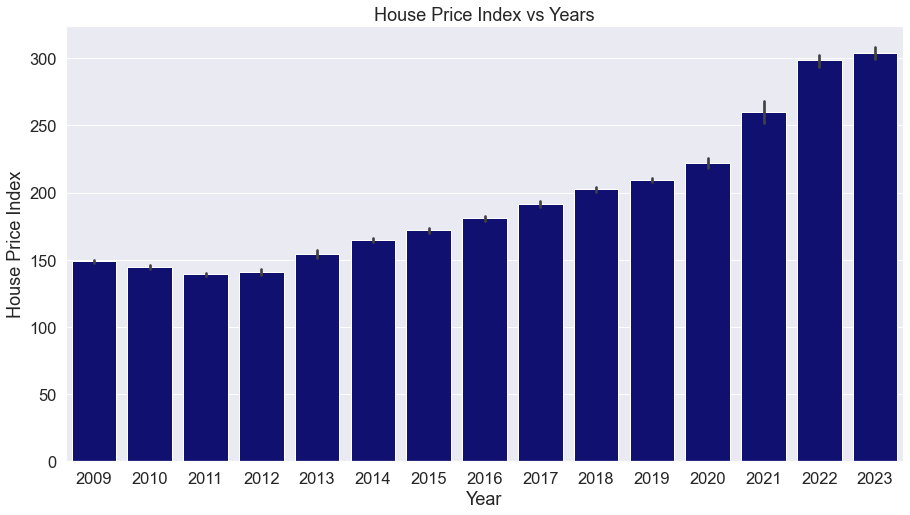

In [111]:
#### Code by Sai Sri Raj Nallam
sns.set(font_scale=1.5)
plt.figure(figsize=(15,8))
sns.barplot(x='Year',y= 'House Price Index',data=data1,color='navy') 
plt.title("House Price Index vs Years")
plt.show()

### from the above barplot the house price index  increases with increase in each year

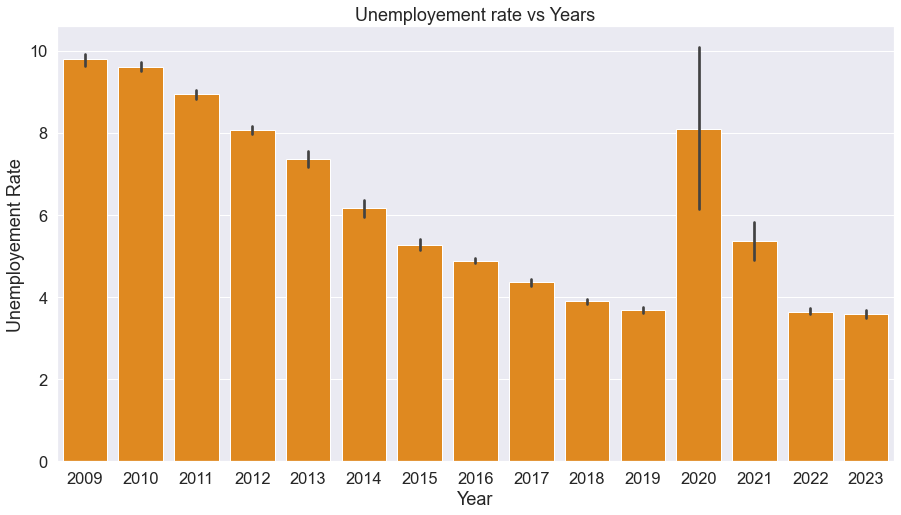

In [112]:
#### Code by Sai Sri Raj Nallam
sns.set(font_scale=1.5)
plt.figure(figsize=(15,8))
sns.barplot(x='Year',y= 'Unemployement Rate',data=data1,color='darkorange') 
plt.title("Unemployement rate vs Years")
plt.show()

### from the above plot the unemployement reate decreases each year, but only during the year 2020, we observed the sudden increase in the unemployement, from the background research this sudden change is due to covid19 pandemic


# Feature engineering

- 1. Splitting of dates column and add a column day , month , year to the dataframe 
   <br>
   
   
   -- Contributed by   maheedar

In [113]:
data1.index

DatetimeIndex(['2009-07-01', '2009-08-01', '2009-09-01', '2009-10-01',
               '2009-11-01', '2009-12-01', '2010-01-01', '2010-02-01',
               '2010-03-01', '2010-04-01',
               ...
               '2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01',
               '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01',
               '2023-08-01', '2023-09-01'],
              dtype='datetime64[ns]', length=171, freq=None)

In [114]:
import datetime as dt
dates = data1.index
data1['Month'] = pd.to_datetime(dates).month
data1['Day'] = pd.to_datetime(dates).day
data1

Consumer Price index  Personal Consumption Expenditure  \
2009-07-01               214.726                            9886.3   
2009-08-01               215.445                           10004.1   
2009-09-01               215.861                            9927.8   
2009-10-01               216.509                            9976.7   
2009-11-01               217.234                            9985.7   
...                          ...                               ...   
2023-05-01               303.294                           18407.8   
2023-06-01               303.841                           18485.4   
2023-07-01               304.348                           18621.3   
2023-08-01               306.269                           18689.9   
2023-09-01               307.481                           18823.4   

            Avg Hourly Earnings  House Price Index  Real Personal Income  \
2009-07-01                22.18            150.749             13493.206   
2009-08-01                22.23            150.669             13468.487   
2009-09-01                22.26            149.628             13502.606   
2009-10-01                22.30            148.585             13460.827   
2009-11-01                22.35            147.939             13494.222   
...                         ...                ...                   ...   
2023-05-01                33.45            305.410             19060.676   
2023-06-01                33.60            308.282             19066.014   
2023-07-01                33.73            310.110             19083.675   
2023-08-01                33.82            311.392             19101.296   
2023-09-01                33.93            312.313             19110.547   

            Unemployement Rate  Consumer Confidence  Interest Rates  \
2009-07-01                 9.5            97.894376            0.16   
2009-08-01                 9.6            97.938155            0.16   
2009-09-01                 9.8            98.116365            0.15   
2009-10-01                10.0            98.146067            0.12   
2009-11-01                 9.9            98.160127            0.12   
...                        ...                  ...             ...   
2023-05-01                 3.7            97.249948            5.06   
2023-06-01                 3.6            97.547263            5.08   
2023-07-01                 3.5            97.908865            5.12   
2023-08-01                 3.8            97.988878            5.33   
2023-09-01                 3.8            97.828249            5.33   

            Credit availibility  Welfare benefits  ...  \
2009-07-01                 0.50             665.1  ...   
2009-08-01                 0.50             662.0  ...   
2009-09-01                 0.50             676.7  ...   
2009-10-01                 0.50             673.0  ...   
2009-11-01                 0.50             671.5  ...   
...                         ...               ...  ...   
2023-05-01                 5.23            1354.7  ...   
2023-06-01                 5.25            1356.7  ...   
2023-07-01                 5.29            1358.1  ...   
2023-08-01                 5.50            1361.9  ...   
2023-09-01                 5.50            1363.0  ...   

            labour force participation  Import price index  \
2009-07-01                        65.5               119.3   
2009-08-01                        65.4               121.1   
2009-09-01                        65.1               121.3   
2009-10-01                        65.0               122.3   
2009-11-01                        65.0               124.1   
...                                ...                 ...   
2023-05-01                        62.6               139.7   
2023-06-01                        62.6               139.4   
2023-07-01                        62.6               139.4   
2023-08-01                        62.8               140.3   
2023-09-01                

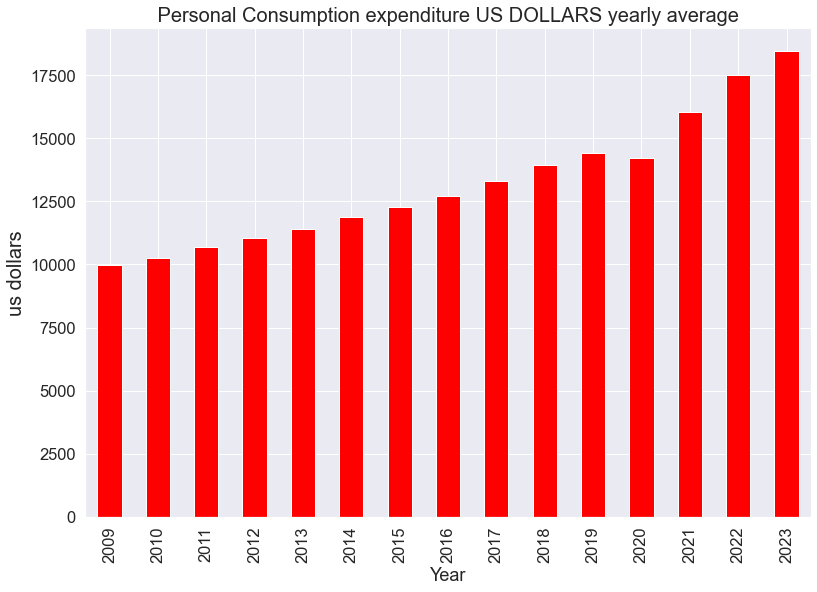

In [115]:
data1.groupby(['Year'])['Personal Consumption Expenditure'].mean().plot(kind='bar',x='index',figsize=(13,9),color='red')
plt.title(" Personal Consumption expenditure US DOLLARS yearly average ",fontsize=20)
plt.ylabel("us dollars",fontsize=20)
plt.show()

### GDP

-  GDP data was initially obtained quaterly, we dont have sourse that can give  any monthly gdp Data, Hence we need to perform feature enginering technique and distribute the quaterly gdp data towards monthly and add an extra GDP feature into the date frame    <br>

-- Coding   for GDP and  date indexing contributed by  both  <p>  nikhil   &  <p> sai sri raj 

In [116]:
gdp.tail()

2022-07-01    25994.639
2022-10-01    26408.405
2023-01-01    26813.601
2023-04-01    27063.012
2023-07-01    27644.463
dtype: float64

In [117]:
gdp_df = pd.DataFrame(gdp).dropna()
gdp_df['Year'] = pd.to_datetime(gdp_df.index).year
gdp_df.columns = ['GDP','Year']
gdp_df.head()

GDP  Year
1947-01-01  243.164  1947
1947-04-01  245.968  1947
1947-07-01  249.585  1947
1947-10-01  259.745  1947
1948-01-01  265.742  1948

In [118]:
from dateutil.relativedelta import relativedelta
dat=[]
d = gdp_df.index[0]
while d <=data1.index[-1]:
    dat.append(d)
    d+=relativedelta(months=1)
dat = pd.DataFrame(dat)
dat.columns=['date']
dat['zero']=0
dat = dat.set_index('date')

In [119]:
# - following code by sri raj

In [120]:
gdp_df2 = pd.concat([dat,gdp_df],axis=1).fillna(method='ffill')
gdp_df2 = gdp_df2.drop(['zero'],axis=1)
new_data = pd.concat([data1,gdp_df2],axis=1)
new_data = new_data.dropna()
new_yr = new_data['Year']
new_data = new_data.drop(['Year'],axis=1)
new_data['Year'] = new_yr.iloc[:,1]
new_data

Consumer Price index  Personal Consumption Expenditure  \
2009-07-01               214.726                            9886.3   
2009-08-01               215.445                           10004.1   
2009-09-01               215.861                            9927.8   
2009-10-01               216.509                            9976.7   
2009-11-01               217.234                            9985.7   
...                          ...                               ...   
2023-05-01               303.294                           18407.8   
2023-06-01               303.841                           18485.4   
2023-07-01               304.348                           18621.3   
2023-08-01               306.269                           18689.9   
2023-09-01               307.481                           18823.4   

            Avg Hourly Earnings  House Price Index  Real Personal Income  \
2009-07-01                22.18            150.749             13493.206   
2009-08-01                22.23            150.669             13468.487   
2009-09-01                22.26            149.628             13502.606   
2009-10-01                22.30            148.585             13460.827   
2009-11-01                22.35            147.939             13494.222   
...                         ...                ...                   ...   
2023-05-01                33.45            305.410             19060.676   
2023-06-01                33.60            308.282             19066.014   
2023-07-01                33.73            310.110             19083.675   
2023-08-01                33.82            311.392             19101.296   
2023-09-01                33.93            312.313             19110.547   

            Unemployement Rate  Consumer Confidence  Interest Rates  \
2009-07-01                 9.5            97.894376            0.16   
2009-08-01                 9.6            97.938155            0.16   
2009-09-01                 9.8            98.116365            0.15   
2009-10-01                10.0            98.146067            0.12   
2009-11-01                 9.9            98.160127            0.12   
...                        ...                  ...             ...   
2023-05-01                 3.7            97.249948            5.06   
2023-06-01                 3.6            97.547263            5.08   
2023-07-01                 3.5            97.908865            5.12   
2023-08-01                 3.8            97.988878            5.33   
2023-09-01                 3.8            97.828249            5.33   

            Credit availibility  Welfare benefits  ...  Import price index  \
2009-07-01                 0.50             665.1  ...               119.3   
2009-08-01                 0.50             662.0  ...               121.1   
2009-09-01                 0.50             676.7  ...               121.3   
2009-10-01                 0.50             673.0  ...               122.3   
2009-11-01                 0.50             671.5  ...               124.1   
...                         ...               ...  ...                 ...   
2023-05-01                 5.23            1354.7  ...               139.7   
2023-06-01                 5.25            1356.7  ...               139.4   
2023-07-01                 5.29            1358.1  ...               139.4   
2023-08-01                 5.50            1361.9  ...               140.3   
2023-09-01                 5.50            1363.0  ...               140.9   

            Mean Personal Income  avg population for child care  \
2009-07-01               12218.7                          846.1   
2009-08-01               12194.8                          850.5   
2009-09-01               12230.6                          852.7   
2009-10-01               12193.2                          847.9   
2009-11-01               12224.4                          849.6   
...                          ...                            ...   

In [131]:
gdp_df.tail(6)

GDP  Year
2022-04-01  25544.273  2022
2022-07-01  25994.639  2022
2022-10-01  26408.405  2022
2023-01-01  26813.601  2023
2023-04-01  27063.012  2023
2023-07-01  27644.463  2023

In [135]:
new_data[["GDP", "Month","Year"]].tail(12)

GDP  Month    Year
2022-10-01  26408.405   10.0  2022.0
2022-11-01  26408.405   11.0  2022.0
2022-12-01  26408.405   12.0  2022.0
2023-01-01  26813.601    1.0  2023.0
2023-02-01  26813.601    2.0  2023.0
2023-03-01  26813.601    3.0  2023.0
2023-04-01  27063.012    4.0  2023.0
2023-05-01  27063.012    5.0  2023.0
2023-06-01  27063.012    6.0  2023.0
2023-07-01  27644.463    7.0  2023.0
2023-08-01  27644.463    8.0  2023.0
2023-09-01  27644.463    9.0  2023.0

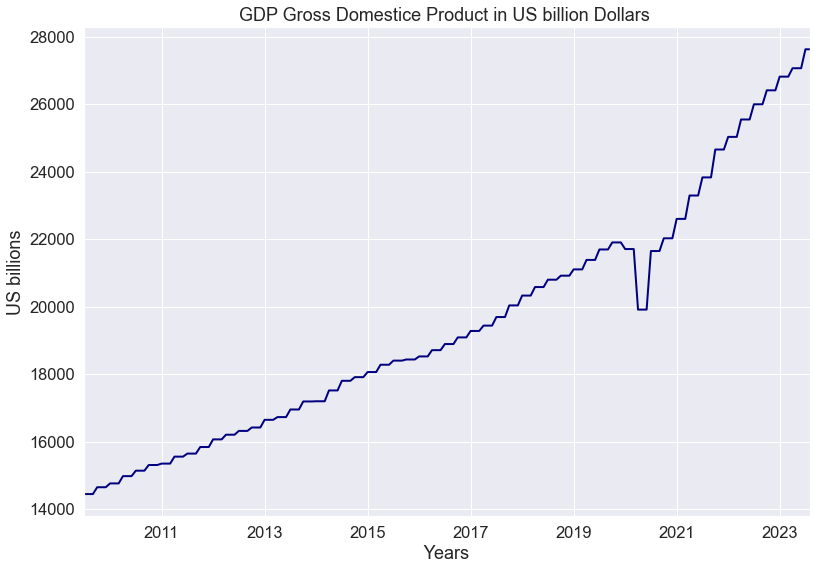

In [113]:
sns.set(font_scale=1.5)
new_data['GDP'].plot(figsize=(13,9),color='navy',x='index',linewidth=2,)
plt.title("GDP Gross Domestice Product in US billion Dollars ")
plt.xlabel(" Years ")
plt.ylabel("US billions")
plt.show()

### Binning of   feature:  

### Real personal income,      

- we create a new feature named real_income_level where we make bins ranging from 13000 us dollars to 23000 us dollars,
and each bin  inteval range will be about 2000


- This will help us to understand the real personal income (it is the income after adjusted to inflation in market) of induviduals , how many of them are earning less and how many earn more



--- done by  Vineela

In [137]:
new_data['real_income_level'] = pd.cut(new_data['Real Personal Income'],\
                                       bins=[13000,14000,15000,16000,17000,18000,19000,20000,21000,22000,23000])

In [138]:
new_data.head()

Consumer Price index  Personal Consumption Expenditure  \
2009-07-01               214.726                            9886.3   
2009-08-01               215.445                           10004.1   
2009-09-01               215.861                            9927.8   
2009-10-01               216.509                            9976.7   
2009-11-01               217.234                            9985.7   

            Avg Hourly Earnings  House Price Index  Real Personal Income  \
2009-07-01                22.18            150.749             13493.206   
2009-08-01                22.23            150.669             13468.487   
2009-09-01                22.26            149.628             13502.606   
2009-10-01                22.30            148.585             13460.827   
2009-11-01                22.35            147.939             13494.222   

            Unemployement Rate  Consumer Confidence  Interest Rates  \
2009-07-01                 9.5            97.894376            0.16   
2009-08-01                 9.6            97.938155            0.16   
2009-09-01                 9.8            98.116365            0.15   
2009-10-01                10.0            98.146067            0.12   
2009-11-01                 9.9            98.160127            0.12   

            Credit availibility  Welfare benefits  ...  Mean Personal Income  \
2009-07-01                  0.5             665.1  ...               12218.7   
2009-08-01                  0.5             662.0  ...               12194.8   
2009-09-01                  0.5             676.7  ...               12230.6   
2009-10-01                  0.5             673.0  ...               12193.2   
2009-11-01                  0.5             671.5  ...               12224.4   

            avg population for child care  Mortgage in billions  \
2009-07-01                          846.1              974.1546   
2009-08-01                          850.5              975.4406   
2009-09-01                          852.7              980.2559   
2009-10-01                          847.9              979.4739   
2009-11-01                          849.6              990.6233   

            realestate loans in billions  Public Infrastructure  Month  Day  \
2009-07-01                     1695.6611               322593.0    7.0  1.0   
2009-08-01                     1687.7192               314453.0    8.0  1.0   
2009-09-01                     1678.6550               310870.0    9.0  1.0   
2009-10-01                     1667.5275               307866.0   10.0  1.0   
2009-11-01                     1660.4924               302635.0   11.0  1.0   

                  GDP    Year  real_income_level  
2009-07-01  14448.882  2009.0     (13000, 14000]  
2009-08-01  14448.882  2009.0     (13000, 14000]  
2009-09-01  14448.882  2009.0     (13000, 14000]  
2009-10-01  14651.249  2009.0     (13000, 14000]  
2009-11-01  14651.249  2009.0     (13000, 14000]  

[5 rows x 23 columns]

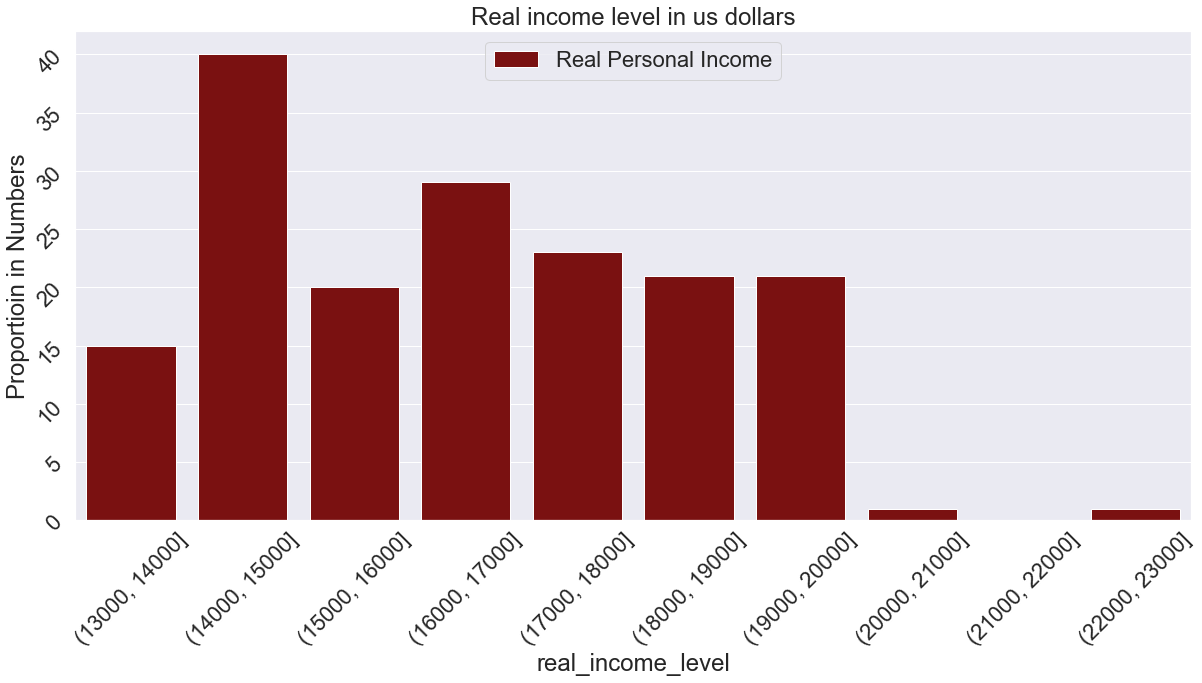

In [143]:
# ax = sns.countplot(new_data['real_income_level'])
sns.set(font_scale=2)
plt.figure(figsize=(20,9))
ax = sns.countplot(x=new_data['real_income_level'],color='darkred',data=new_data,label='Real Personal Income')
ax.tick_params(rotation=45)
plt.ylabel("Proportioin in Numbers")
plt.legend()
plt.title("Real income level in us dollars")
plt.show()

In [117]:
# new_data.to_csv("new_data.csv")

### Correlation Heatmap of Ffeatures

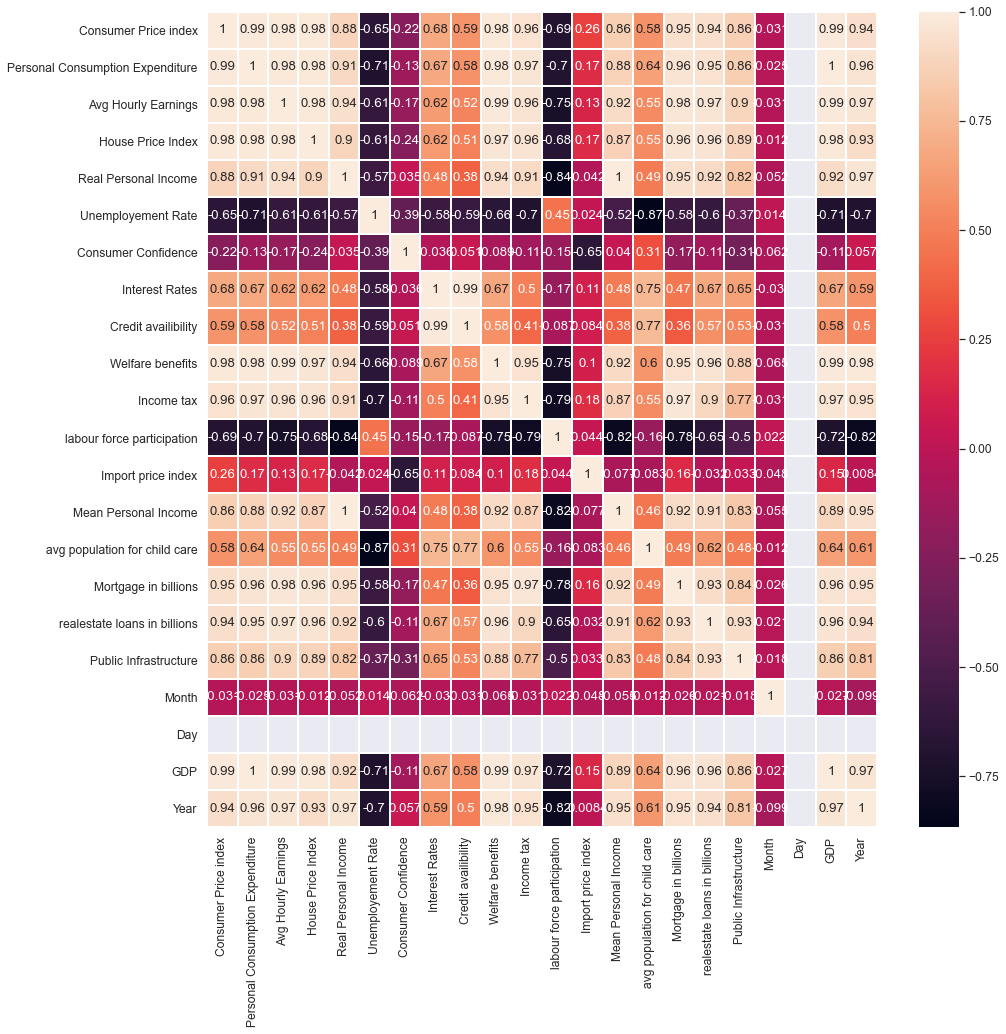

In [118]:
sns.set(font_scale=1.1)
plt.figure(figsize=(15,15))
sns.heatmap(new_data.corr(),annot=True,linewidth=1)
plt.show()

### Correlation of all features with response varaibles

In [119]:
corr_df = new_data.drop(['Personal Consumption Expenditure','real_income_level','Month','Day'],axis=1).\
corrwith(new_data['Personal Consumption Expenditure'],method='pearson').\
to_frame().sort_values(by=0,ascending=False)
corr_df.columns = ['Correlation with Personal Consumption Expenditure']
corr_df

Correlation with Personal Consumption Expenditure
GDP                                                                     0.997370
Consumer Price index                                                    0.989033
Avg Hourly Earnings                                                     0.984393
Welfare benefits                                                        0.983581
House Price Index                                                       0.982021
Income tax                                                              0.968010
Year                                                                    0.960002
Mortgage in billions                                                    0.958773
realestate loans in billions                                            0.954520
Real Personal Income                                                    0.909966
Mean Personal Income                                                    0.882905
Public Infrastructure                                                   0.856805
Interest Rates                                                          0.672045
avg population for child care                                           0.643542
Credit availibility                                                     0.579912
Import price index                                                      0.171234
Consumer Confidence                                                    -0.131098
labour force participation                                             -0.697211
Unemployement Rate                                                     -0.710140

### Visualize the correlations with response variable

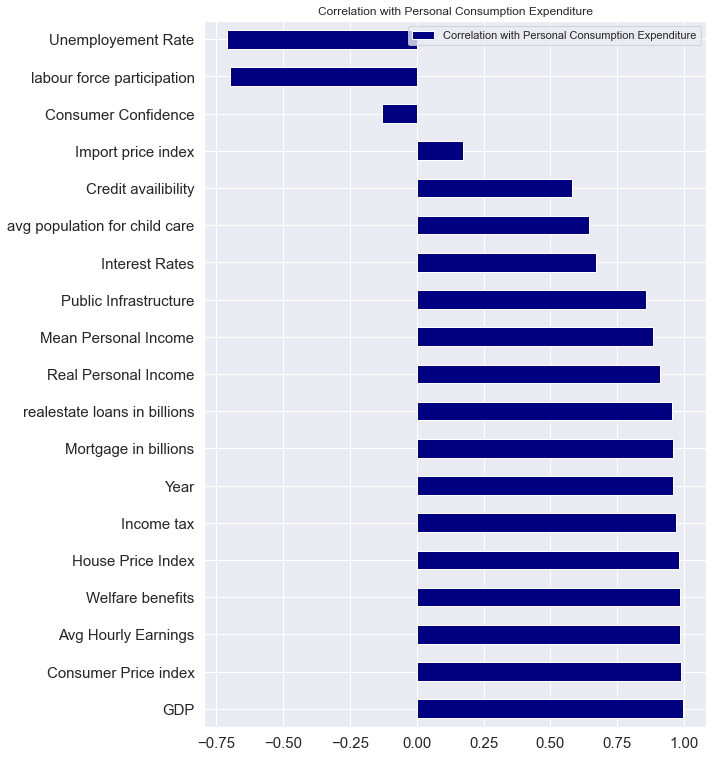

In [120]:
sns.set(font_scale=1)
corr_df.plot(kind='barh',figsize=(9,13),title='Correlation with Personal Consumption Expenditure',fontsize=15,color='navy')
plt.show()

### Inference:
    
    - There are lot of features that has strong positive correlation with Our Response variable
    
    - Hence we may see some autocorrelation in our Features


### Histogram and distributions of each variables in our data

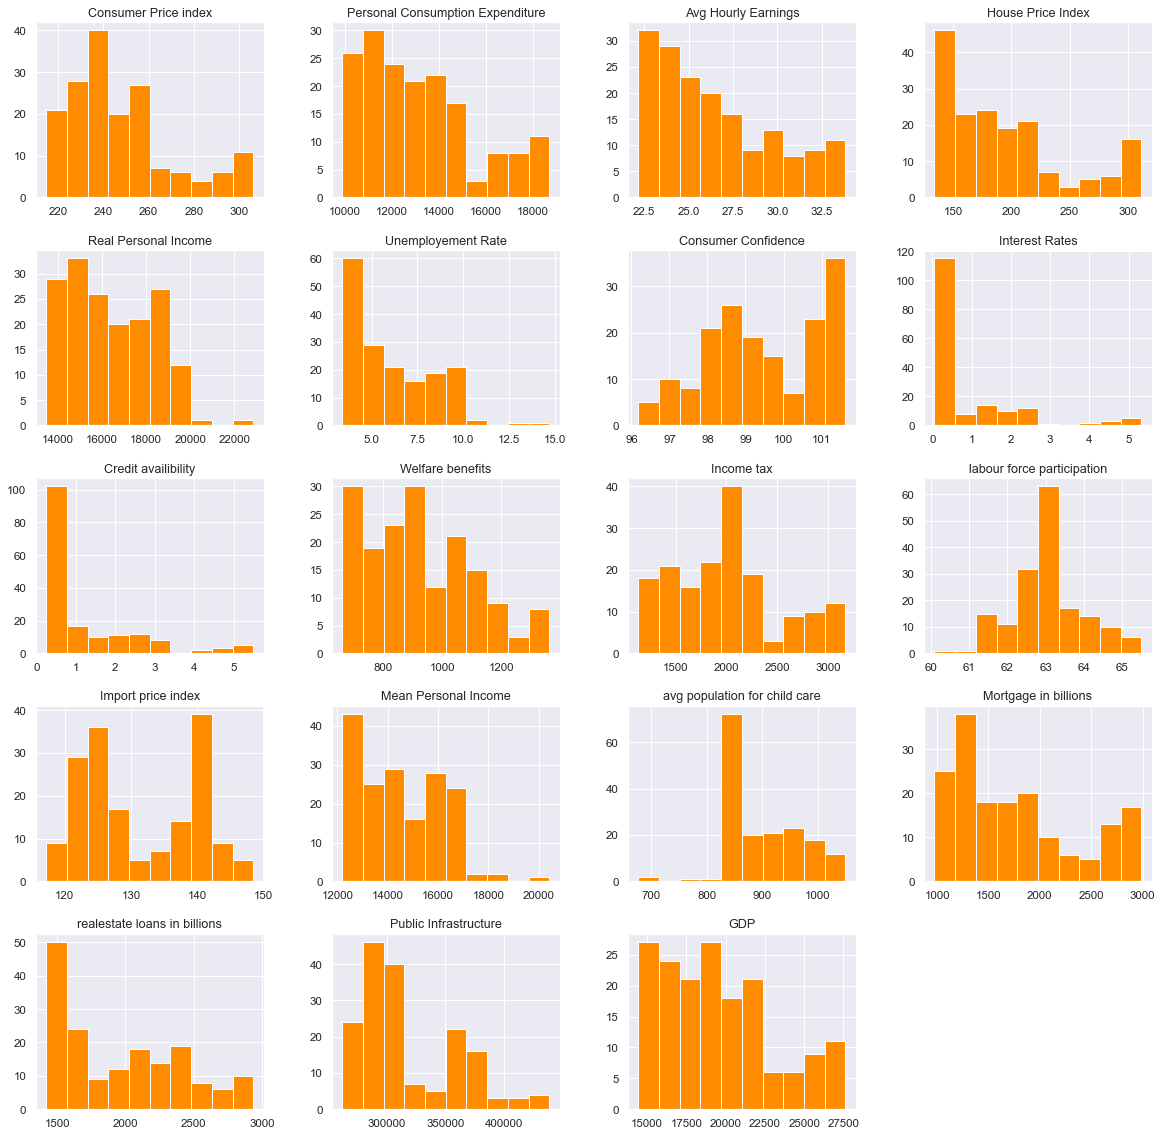

In [121]:
sns.set(font_scale=1.05)
new_data.drop(['Year', 'real_income_level', 'Month', 'Day'],axis=1).hist(figsize=(20,20),color='darkorange')
plt.show()

### Label encoding the variable Year, as here our data is arranged in Order of Time

In [122]:
year_dict = {}
i=1
for yr in new_data['Year'].unique():
    year_dict[yr]=i
    i+=1
year_dict

{2009.0: 1,
 2010.0: 2,
 2011.0: 3,
 2012.0: 4,
 2013.0: 5,
 2014.0: 6,
 2015.0: 7,
 2016.0: 8,
 2017.0: 9,
 2018.0: 10,
 2019.0: 11,
 2020.0: 12,
 2021.0: 13,
 2022.0: 14,
 2023.0: 15}

In [123]:
new_data['Year'] = new_data['Year'].map(year_dict)

### Spliting the data into the response and predictor variables

### X denotes our dependent variables

### y denotes our independent variables

In [124]:
X= new_data.drop(['real_income_level', 'Month', 'Day','Personal Consumption Expenditure',],axis=1)  
y= new_data['Personal Consumption Expenditure']

### Splitting data into training and testing with ratio of  75-25

In [125]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1503)

In [126]:
print("The Shape of X_train is {}\n".format(X_train.shape))
print("The Shape of y_train is {}\n".format(y_train.shape))
print("The Shape of X_test is {}\n".format(X_test.shape))
print("The Shape of y_test is {}\n".format(y_test.shape))

The Shape of X_train is (127, 19)

The Shape of y_train is (127,)

The Shape of X_test is (43, 19)

The Shape of y_test is (43,)



### Model1 :  Multiple Linear Regression (MLR)

In [127]:
import statsmodels.api as sm

In [128]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train_sm)
model = model.fit()

In [129]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Personal Consumption Expenditure   R-squared:                       0.998
Model:                                          OLS   Adj. R-squared:                  0.998
Method:                               Least Squares   F-statistic:                     3037.
Date:                              Sun, 26 Nov 2023   Prob (F-statistic):          5.30e-137
Time:                                      21:47:11   Log-Likelihood:                -771.78
No. Observations:                               127   AIC:                             1584.
Df Residuals:                                   107   BIC:                             1640.
Df Model:                                        19                                         
Covariance Type:                          nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -1.7e+04   7539.484     -2.254      0.026   -3.19e+04   -2051.152
Consumer Price index             48.3548     18.428      2.624      0.010      11.823      84.887
Avg Hourly Earnings              -0.7717    175.508     -0.004      0.997    -348.696     347.153
House Price Index                 4.4510      3.378      1.318      0.190      -2.245      11.147
Real Personal Income              4.0578      1.746      2.324      0.022       0.596       7.519
Unemployement Rate             -197.1416     46.745     -4.217      0.000    -289.808    -104.475
Consumer Confidence             -17.9999     25.954     -0.694      0.489     -69.452      33.452
Interest Rates                  219.7543    278.841      0.788      0.432    -333.015     772.523
Credit availibility            -147.5114    285.945     -0.516      0.607    -714.364     419.342
Welfare benefits                 -0.2230      1.169     -0.191      0.849      -2.541       2.095
Income tax                       -3.9438      1.608     -2.452      0.016      -7.132      -0.755
labour force participation      227.4170     79.624      2.856      0.005      69.571     385.263
Import price index                8.6672      5.203      1.666      0.099      -1.647      18.981
Mean Personal Income             -4.0126      1.747     -2.297      0.024      -7.475      -0.550
avg population for child care    -3.2363      1.409     -2.298      0.024      -6.028      -0.444
Mortgage in billions              0.8828      0.299      2.950      0.004       0.290       1.476
realestate loans in billions      0.4850      0.372      1.304      0.195      -0.252       1.222
Public Infrastructure             0.0033      0.002      2.134      0.035       0.000       0.006
GDP                               0.1922      0.086      2.241      0.027       0.022       0.362
Year                              3.2632     44.935      0.073      0.942     -85.816      92.342
==============================================================================
Omnibus:                       39.764   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              410.097
Skew:                          -0.618   Prob(JB):                     8.88e-90
Kurtosis:                      11.716   Cond. No.                     2.38e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+08. This might indicate that there are
strong multicollinear

### ANOVA (Model goodness of fit-test for 95% confidence interval) 

- From the summary results the F-statistic = 3037.



- The p-value for F-statistic < 0.05 



- Hence we can say that our model is very good fit
    
    



### Omnibus Test for Residuals

- Ombibus statistic = 31.391,


- p-value for Omnibus statistic < 0.05,


- this shows our model has residuals that follows the normal distribution


- Kurtosis for residuals = 10.668 , which shows residuals were leptokurtic distribution


- and skewness is -0.289 , which shows residuals were left skewed

### AIC ( Akaike information criterion )    and      BIC   (Bayesian information criterion ) for full model


- AIC score for above model is  1572


- BIC score for above model is  1632



### Significant features


### variable with corresponding p-values

In [130]:
model.pvalues.to_frame().rename(columns={0:'p_values'})

p_values
const                          0.026205
Consumer Price index           0.009963
Avg Hourly Earnings            0.996500
House Price Index              0.190406
Real Personal Income           0.022030
Unemployement Rate             0.000052
Consumer Confidence            0.489487
Interest Rates                 0.432381
Credit availibility            0.607007
Welfare benefits               0.849072
Income tax                     0.015824
labour force participation     0.005153
Import price index             0.098673
Mean Personal Income           0.023558
avg population for child care  0.023528
Mortgage in billions           0.003898
realestate loans in billions   0.194953
Public Infrastructure          0.035135
GDP                            0.027063
Year                           0.942244

### Significant Independent Variables  
#### - Important features  (whose p-values <0.05)

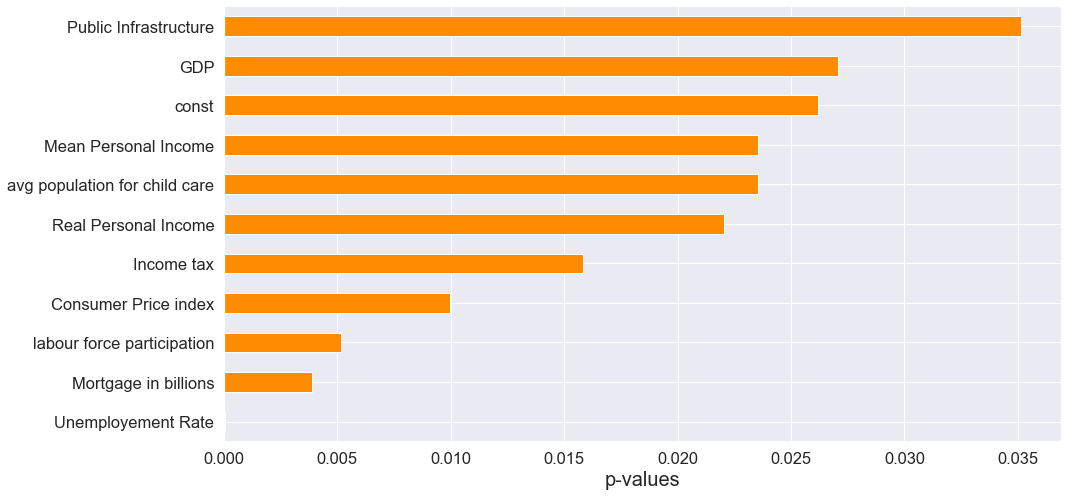

In [131]:
sns.set(font_scale=1.5)
model.pvalues[model.pvalues<0.05].sort_values().plot(kind='barh',color='darkorange',figsize=(15,8))
plt.xlabel('p-values',fontsize=20)
plt.show()

### The significant Features among the dependent variables are

In [132]:
cols_lr = model.pvalues[model.pvalues<0.05].sort_values(ascending =True).index
cols_lr

Index(['Unemployement Rate', 'Mortgage in billions',
       'labour force participation', 'Consumer Price index', 'Income tax',
       'Real Personal Income', 'avg population for child care',
       'Mean Personal Income', 'const', 'GDP', 'Public Infrastructure'],
      dtype='object')

### Significant features  are as follows 
- Here as per 95% confidence interval the following variables that are significant ,because the p-value < 0.05


1. Unemployement Rate, <p>
    
2. Mortgage in billions, <p>
    
3. labour force participation, <p>
    
4. Consumer Price index, <p>
    
5. Income Tax <p>
    
6. Real Personal Income <p>

7. avg population for child care <p>
    
8. Mean Personal Income <p>

9. GDP <p>

10. Public Infrastructure <p>
    
 

In [133]:
cols_lr = model.pvalues[model.pvalues>0.05].sort_values(ascending =True).index
cols_lr

Index(['Import price index', 'House Price Index',
       'realestate loans in billions', 'Interest Rates', 'Consumer Confidence',
       'Credit availibility', 'Welfare benefits', 'Year',
       'Avg Hourly Earnings'],
      dtype='object')

### Non Significant Features Interpretation

#### Here as per 95% confidence interval the following variables that are not significant ,because the p-value (i.e., the probability that the estimator's  true  value to fall beyond the rejection region ,here the significance level is 5%, hence if p-value <0.05,then  as per 95% confidence interval we say they are non significant features.)


1. Import price index  

2. House Price Index 

3. ealestate loans in billions

4. Interest Rates

5. Consumer Confidence

6. Credit availibility

7. Welfare benefits

8. Year

9. Avg Hourly Earnings

- The remaining all the variables are significant

### Removing all the non significant features from data and rebuilding the Linear Regression Model

In [134]:
X= new_data[['Unemployement Rate', 'Mortgage in billions',
       'labour force participation', 'Consumer Price index',
       'Real Personal Income', 'avg population for child care',
        'GDP', 'Public Infrastructure']]
y= new_data['Personal Consumption Expenditure']

#### Splitting data into training and testing with ratio of  75-25

In [135]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1503)

In [136]:
print("The Shape of X_train is {}\n".format(X_train.shape))
print("The Shape of y_train is {}\n".format(y_train.shape))
print("The Shape of X_test is {}\n".format(X_test.shape))
print("The Shape of y_test is {}\n".format(y_test.shape))

The Shape of X_train is (127, 8)

The Shape of y_train is (127,)

The Shape of X_test is (43, 8)

The Shape of y_test is (43,)



### Model 2 : ( Model with Subset of features selected )

In [137]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train_sm)
model = model.fit()

In [138]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Personal Consumption Expenditure   R-squared:                       0.998
Model:                                          OLS   Adj. R-squared:                  0.998
Method:                               Least Squares   F-statistic:                     6725.
Date:                              Sun, 26 Nov 2023   Prob (F-statistic):          4.41e-153
Time:                                      21:47:12   Log-Likelihood:                -782.42
No. Observations:                               127   AIC:                             1583.
Df Residuals:                                   118   BIC:                             1608.
Df Model:                                         8                                         
Covariance Type:                          nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -1.379e+04   2553.429     -5.399      0.000   -1.88e+04   -8729.081
Unemployement Rate             -133.4018     22.133     -6.027      0.000    -177.231     -89.573
Mortgage in billions              0.5369      0.100      5.350      0.000       0.338       0.736
labour force participation      196.0229     40.969      4.785      0.000     114.892     277.153
Consumer Price index             31.3853      5.262      5.964      0.000      20.965      41.806
Real Personal Income              0.0792      0.028      2.815      0.006       0.023       0.135
avg population for child care    -1.6334      0.635     -2.572      0.011      -2.891      -0.376
GDP                               0.3112      0.059      5.276      0.000       0.194       0.428
Public Infrastructure             0.0026      0.001      2.415      0.017       0.000       0.005
==============================================================================
Omnibus:                       46.063   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              764.625
Skew:                          -0.615   Prob(JB):                    9.20e-167
Kurtosis:                      14.957   Cond. No.                     7.77e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.77e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### ANOVA (Model goodness of fit-test for 95% confidence interval) 

- From the summary results the F-statistic = 6725.



- The p-value for F-statistic < 0.05 



- Hence we can say that our model is very good fit
    
    



### Omnibus Test for Residuals

- Ombibus statistic = 46.063,


- p-value for Omnibus statistic < 0.05,


- this shows our model has residuals that follows the normal distribution


- Kurtosis for residuals = 14.957 , which shows residuals were leptokurtic distribution


- and skewness is -0.615 , which shows residuals were left skewed

### AIC ( Akaike information criterion )    and      BIC   (Bayesian information criterion ) for full model


- AIC score for above model is  1583


- BIC score for above model is  1608


####  On comparision of both the models ,

- the BIC score for second model is less than the First model

- the AIC score for second model is more than the first model

- Since the data is about the 127 observations and we can go with BIC score criterion to choose the best regression fit



## Hypothesis Result:

- CPI is significant variable for predicting Consumer spending so Inflation has affect on consumer spending 

In [139]:
## predictions
pred = model.predict(sm.add_constant(X_test))

In [140]:
predictions = pd.DataFrame({'Actual':y_test,'Predicted':pred})
predictions['Residuals'] = predictions['Actual']-predictions['Predicted']
predictions


Actual     Predicted   Residuals
2014-07-01  11904.4  11997.876630  -93.476630
2010-11-01  10433.6  10344.167119   89.432881
2015-04-01  12209.1  12291.605272  -82.505272
2010-04-01  10182.3  10214.141507  -31.841507
2010-06-01  10231.3  10167.387781   63.912219
2021-02-01  14948.2  15194.834589 -246.634589
2022-10-01  17915.1  17902.899757   12.200243
2018-12-01  14051.6  14070.711184  -19.111184
2016-07-01  12756.7  12720.865108   35.834892
2015-09-01  12386.4  12385.484961    0.915039
2012-04-01  11018.5  11063.905555  -45.405555
2023-07-01  18634.9  18574.325800   60.574200
2017-09-01  13417.3  13382.707130   34.592870
2016-12-01  13005.9  12905.409103  100.490897
2011-03-01  10619.7  10490.347127  129.352873
2015-05-01  12275.4  12321.845650  -46.445650
2016-09-01  12846.6  12783.368120   63.231880
2018-08-01  14014.0  13961.268786   52.731214
2017-03-01  13139.9  13091.501701   48.398299
2015-11-01  12423.2  12397.922839   25.277161
2017-10-01  13447.5  13461.226164  -13.726164
2013-07-01  11372.6  11479.108443 -106.508443
2014-04-01  11762.3  11815.441395  -53.141395
2019-05-01  14340.8  14423.354578  -82.554578
2012-05-01  11006.8  11053.731546  -46.931546
2022-12-01  17943.6  17979.213193  -35.613193
2012-08-01  11056.0  11093.383077  -37.383077
2016-02-01  12554.5  12515.923729   38.576271
2018-05-01  13905.0  13869.644732   35.355268
2019-09-01  14555.6  14699.314509 -143.714509
2015-07-01  12364.9  12403.479667  -38.579667
2014-10-01  12064.7  12127.686571  -62.986571
2009-12-01  10052.6   9952.429030  100.170970
2020-03-01  13793.0  14653.190340 -860.190340
2019-02-01  14115.5  14245.725009 -130.225009
2014-05-01  11807.3  11842.117942  -34.817942
2010-10-01  10386.4  10339.878677   46.521323
2021-04-01  15854.1  15640.981009  213.118991
2020-11-01  14675.8  14796.683957 -120.883957
2019-10-01  14584.0  14786.893325 -202.893325
2018-11-01  14162.9  14033.432137  129.467863
2020-07-01  14285.1  14148.788815  136.311185
2022-09-01  17804.0  17800.736265    3.263735

### R_Squared  (Model explanatory power)

In [141]:
from sklearn.metrics import r2_score
r_2_lr = r2_score(y_test,pred)
print("The R_Squared is ",r_2_lr)

The R_Squared is  0.9944275215985877


### Inference: 
- hence 99.05% variation in Personal Consumption expenditure  can be explained by the given Economic features

### (RMSE) Root Mean Squared Error (Test data)

In [142]:
from sklearn.metrics import mean_squared_error
err = np.sqrt(mean_squared_error(y_test,pred))
print("the RMSE is {}".format(err))

the RMSE is 159.84594686309677


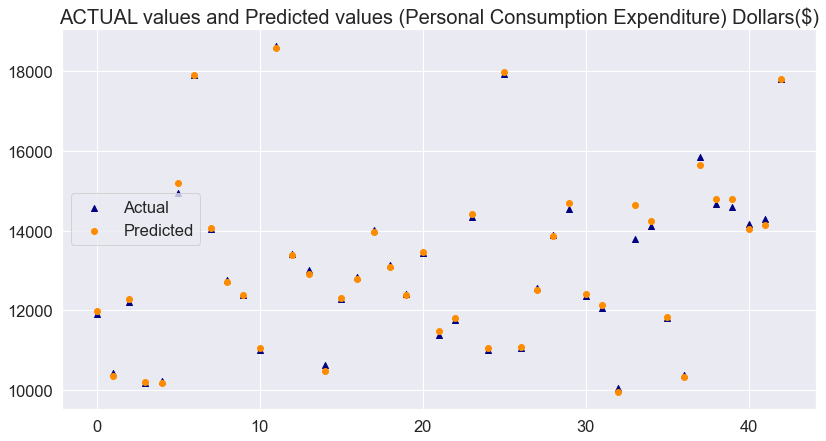

In [143]:
sns.set(font_scale=1.5)
plt.figure(figsize=(13.5,7))
plt.scatter(list(range(len(y_test))),y_test,color='navy',label='Actual',marker='^')
plt.scatter(list(range(len(pred))),pred,color='darkorange',label='Predicted',marker='o')
plt.title("ACTUAL values and Predicted values (Personal Consumption Expenditure) Dollars($)",fontsize=20)
plt.legend()
plt.show()

### Checking Assumptions of Linear Equation algorithm

1. Linearity: Firstly, there needs to be a linear relationship between features and responses.


2. Multicollinearity: Then, features must not be highly correlated with each other. If this is not satisfied, predictions may be  overfit.


3. Gaussian errors: Errors are normally distributed with mean = 0. This is necessary for a range of statistical tests, i.e., the t-test. We can relax this assumption in large samples due to the central limit theorem. Testable with Jarque-Bera tests for skewness and kurtosis.


4. Homoscedasticity: Errors have equal variance, and there is no pattern in the residuals (error). Testable with Breusch-Pagan and Goldfeld-Quandt.


5. Independent errors: Errors are independent, which means there is no relationship between the residuals of our model (the errors) and the response variables (observations). For example, each day can be forecast separately without data from the previous day. Testable with Durbin–Watson and Ljungbox.

### 2. Multicollinearity

### Variance Inflation Factor

In [144]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X2 = new_data[['Unemployement Rate', 'Consumer Price index', 'GDP','Mortgage in billions', 'labour force participation',
       'Real Personal Income']]
v = pd.Series([variance_inflation_factor(X2.values, i)
         for i in range(X2.shape[1])],
          index=X2.columns)
vif = pd.DataFrame(v)
vif.columns = ['VIF']
vif = vif.sort_values(by='VIF',ascending =False)
vif

VIF
Consumer Price index        9247.456961
GDP                         5194.117060
labour force participation  2027.066809
Real Personal Income         737.760220
Mortgage in billions         245.103885
Unemployement Rate            36.994708

### Inference:

1. Here from above VIF values , our features have got VIF greater than 10, hence we see that our model has lot of feature that are correlated to each other 

### 3. Distribution of Residuals

<AxesSubplot:title={'center':'Residuals Distribution Plot'}, ylabel='Density'>

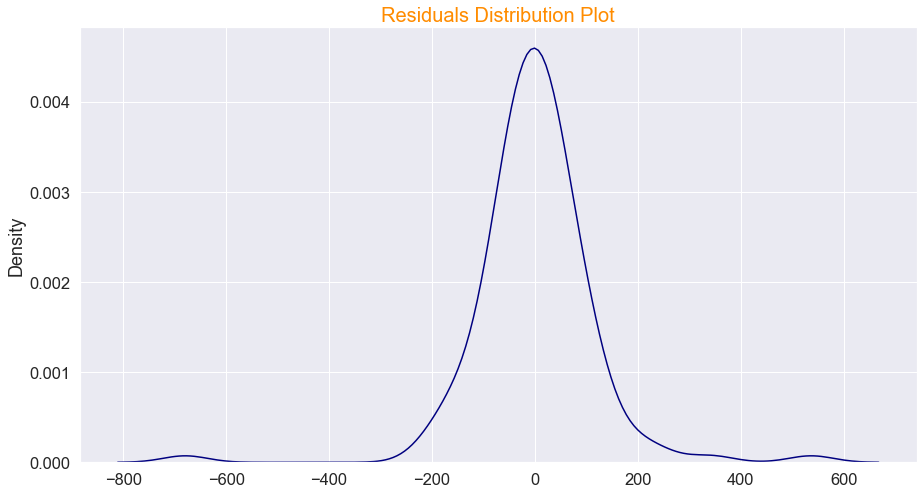

In [145]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,8))
plt.title('Residuals Distribution Plot',fontsize=20,color='darkorange')
sns.kdeplot(model.resid,color='navy')

### Inference: 
 - From the above Residual Distribution plot we say that our residuals are normally distributed

### 4. Homoscedasticity

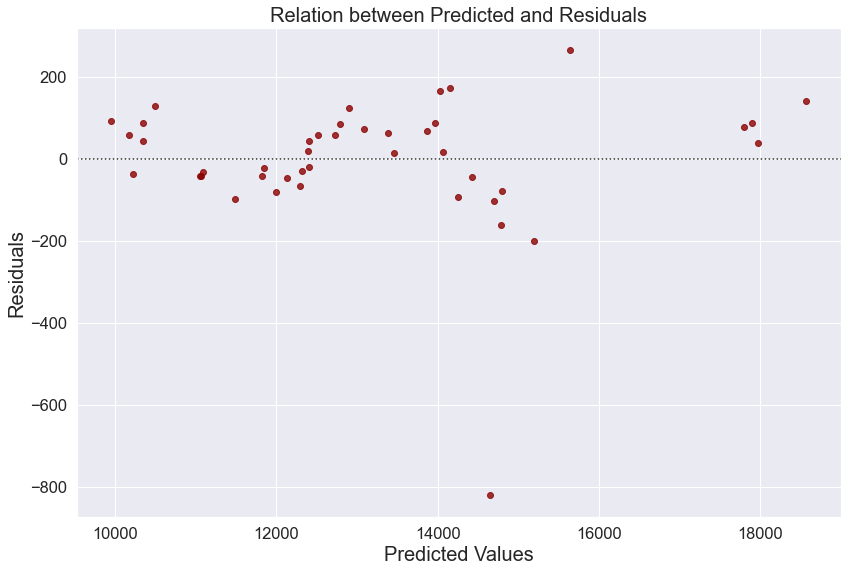

In [146]:
# sns.set(font_scale=1.5)
plt.figure(figsize=(13.7,9))
sns.residplot(x='Predicted',y='Residuals',data=predictions,color='darkred')
plt.title("Relation between Predicted and Residuals",fontsize=20)
plt.xlabel("Predicted Values",fontsize=20)
plt.ylabel("Residuals",fontsize=20)
plt.show()

### Inference :
- Here all the errors (Resduals) have constant variance and shows no proper pattern, hence homoscedasticity achieved

### 5. Independent Errors (No autocorrelation)

- From the Above Statsmodels output the  Durbin-Watson statistic of our model is 1.806
- Hence the durbin-watson number < 2 is positive auto correlation
- Hence the is some degree of autocorrelation seen in our residuals

### Other Machine Learning model for regression

In [147]:
X= new_data.drop(['real_income_level', 'Month', 'Day','Personal Consumption Expenditure',],axis=1)  
y= new_data['Personal Consumption Expenditure']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1503)
print("The Shape of X_train is {}\n".format(X_train.shape))
print("The Shape of y_train is {}\n".format(y_train.shape))
print("The Shape of X_test is {}\n".format(X_test.shape))
print("The Shape of y_test is {}\n".format(y_test.shape))

The Shape of X_train is (127, 19)

The Shape of y_train is (127,)

The Shape of X_test is (43, 19)

The Shape of y_test is (43,)



### Model 2: Decision Tree Regressor

In [148]:
from sklearn.tree import DecisionTreeRegressor

In [149]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train,y_train)
pred_dt = model_dt.predict(X_test)

### R_Squared for decision tree

In [150]:
from sklearn.metrics import r2_score
r_2_dt = r2_score(y_test,pred_dt)
print("The R_Squared is ",r_2_dt)

The R_Squared is  0.9905612266311415


### Inference: 
- hence 98.6% variation in Personal Consumption expenditure  can be explained by the given Economic features

### (RMSE) Root Mean Squared Error (Test data)

In [151]:
from sklearn.metrics import mean_squared_error
err_dt = np.sqrt(mean_squared_error(y_test,pred_dt))
print("the RMSE is {}".format(err_dt))

the RMSE is 208.03442693625905


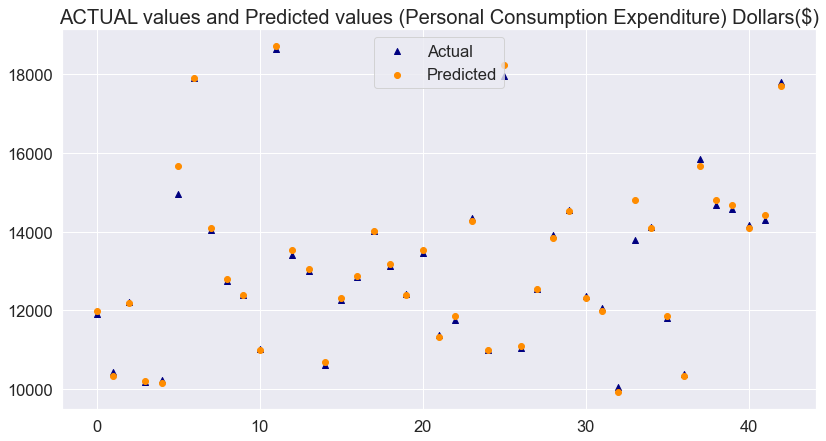

In [152]:
predictions_dt = pd.DataFrame({'Actual':y_test,'Predicted':pred_dt})
predictions_dt['Residuals'] = predictions_dt['Actual']-predictions_dt['Predicted']
sns.set(font_scale=1.5)
plt.figure(figsize=(13.5,7))
plt.scatter(list(range(len(y_test))),y_test,color='navy',label='Actual',marker='^')
plt.scatter(list(range(len(pred_dt))),pred_dt,color='darkorange',label='Predicted',marker='o')
plt.title("ACTUAL values and Predicted values (Personal Consumption Expenditure) Dollars($)",fontsize=20)
plt.legend()
plt.show()

### Feature Importances for Decission tree Regression

In [153]:
feature_imp  = pd.DataFrame({'Feature Names':model_dt.feature_names_in_,'Feature Importances':model_dt.feature_importances_})
feature_imp_dt = feature_imp.sort_values(by = 'Feature Importances',ascending= False)
feature_imp_dt

Feature Names  Feature Importances
17                            GDP         8.195071e-01
2               House Price Index         1.220656e-01
3            Real Personal Income         1.586728e-02
6                  Interest Rates         1.467792e-02
4              Unemployement Rate         1.244551e-02
0            Consumer Price index         4.603124e-03
9                      Income tax         2.538079e-03
11             Import price index         2.393089e-03
5             Consumer Confidence         2.373979e-03
8                Welfare benefits         1.163650e-03
16          Public Infrastructure         9.514185e-04
14           Mortgage in billions         5.093913e-04
1             Avg Hourly Earnings         4.773312e-04
15   realestate loans in billions         1.669063e-04
13  avg population for child care         1.477679e-04
12           Mean Personal Income         1.071481e-04
10     labour force participation         2.890460e-06
7             Credit availibility         9.120662e-07
18                           Year         9.071823e-07

In [154]:
feature_imp_dt['Feature Names'].values[:5]

array(['GDP', 'House Price Index', 'Real Personal Income',
       'Interest Rates', 'Unemployement Rate'], dtype=object)

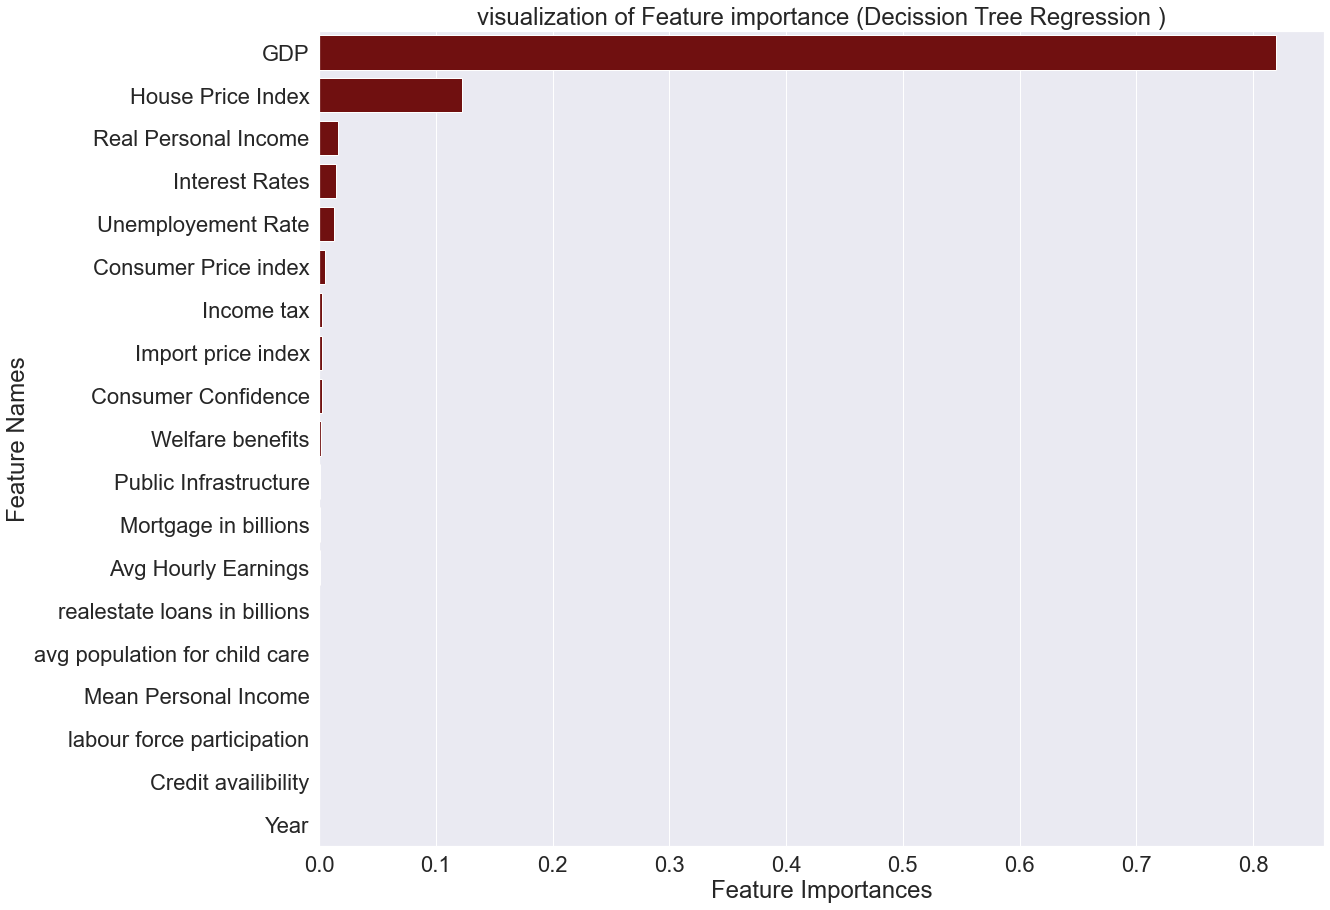

In [155]:
sns.set(font_scale=2)
plt.figure(figsize=(18,15))
sns.barplot(y='Feature Names',x='Feature Importances',data = feature_imp_dt,color='maroon')
plt.title("visualization of Feature importance (Decission Tree Regression )")
plt.show()

### Decision Trees

- Depending upon the squared Error of the Variables, the following tree was constructed, So the highest feature importance will get the head position and remining feature importances get the leaf position and so on


-  And the criterion it followed is squared error of the estimate


- In the Squared error criterion , it measure the quality of a split which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node

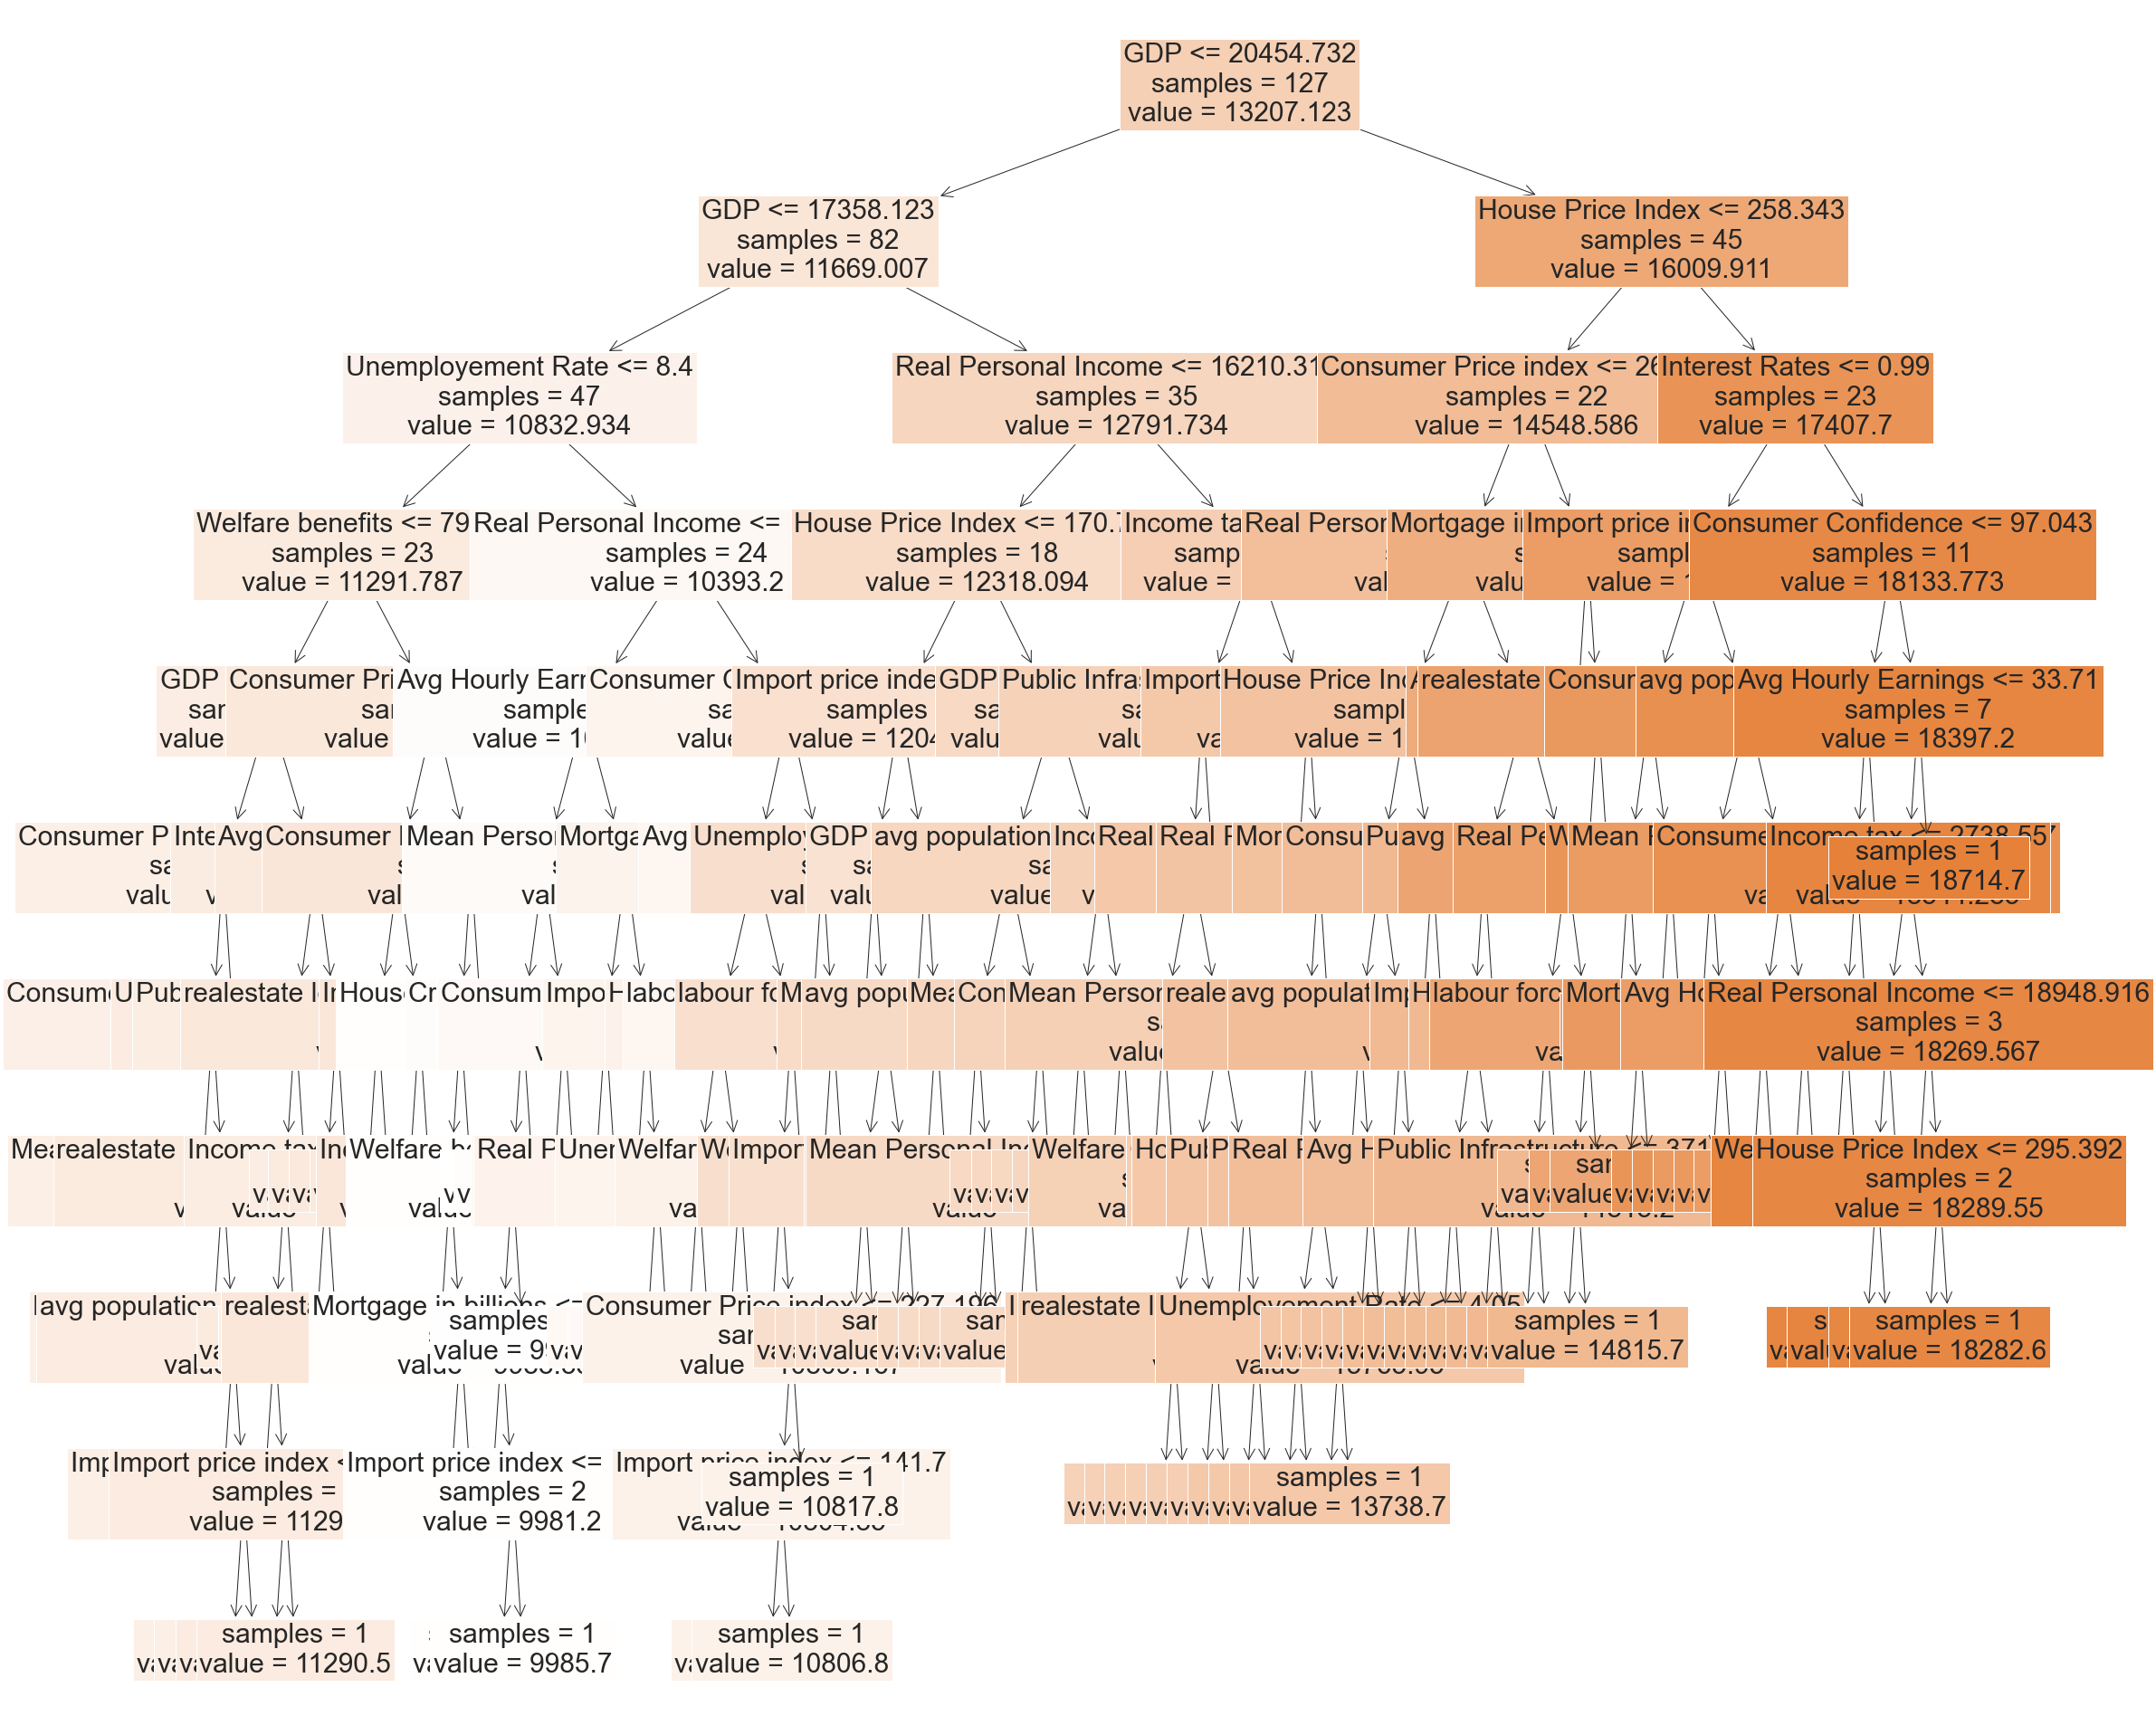

In [156]:
from sklearn import tree
fig = plt.figure(figsize=(35,35))
_ = tree.plot_tree(model_dt,
                   feature_names=X_train.columns,impurity=False,
                   class_names="Personal Consumption Expenditure",fontsize=30,
                   filled=True)

### Model 3: Random Forest Regressor

In [157]:
from sklearn.ensemble import RandomForestRegressor

In [158]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)

### R_Squared for Random Forest Regressor Algorithm

In [159]:
from sklearn.metrics import r2_score
r_2_rf = r2_score(y_test,pred_rf)
print("The R_Squared is ",r_2_rf)

The R_Squared is  0.9940139908673846


### Inference: 
- hence 99.09 % variation in Personal Consumption expenditure  can be explained by the given Economic features

### (RMSE) Root Mean Squared Error (Test data)

In [160]:
from sklearn.metrics import mean_squared_error
err_rf = np.sqrt(mean_squared_error(y_test,pred_rf))
print("the RMSE is {}".format(err_rf))

the RMSE is 165.67085713406294


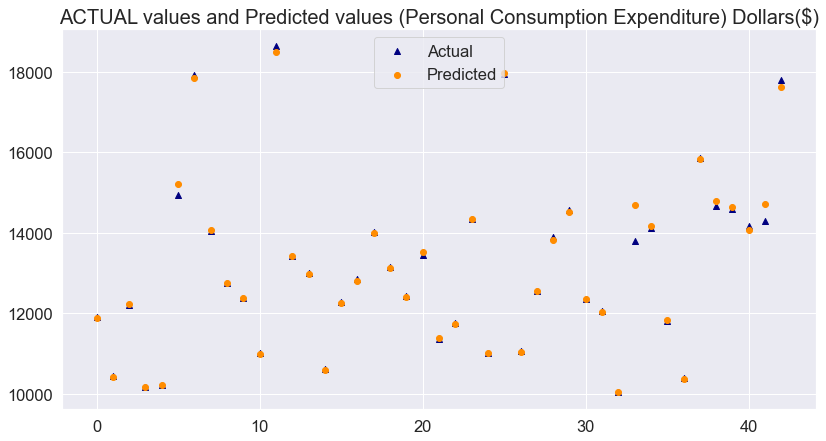

In [161]:
predictions_rf = pd.DataFrame({'Actual':y_test,'Predicted':pred_rf})
predictions_rf['Residuals'] = predictions_rf['Actual']-predictions_rf['Predicted']
sns.set(font_scale=1.5)
plt.figure(figsize=(13.5,7))
plt.scatter(list(range(len(y_test))),y_test,color='navy',label='Actual',marker='^')
plt.scatter(list(range(len(pred_rf))),pred_rf,color='darkorange',label='Predicted',marker='o')
plt.title("ACTUAL values and Predicted values (Personal Consumption Expenditure) Dollars($)",fontsize=20)
plt.legend()
plt.show()

### Feature Importances as per random forest regression

In [162]:
feature_imp_rf = pd.DataFrame({'Feature Names':model_rf.feature_names_in_,'Feature Importances':model_rf.feature_importances_})
feature_imp_rf = feature_imp_rf.sort_values(by = 'Feature Importances',ascending= False)

feature_imp_rf

Feature Names  Feature Importances
17                            GDP             0.392163
9                      Income tax             0.256018
8                Welfare benefits             0.054267
2               House Price Index             0.051624
1             Avg Hourly Earnings             0.041004
0            Consumer Price index             0.036296
15   realestate loans in billions             0.030953
3            Real Personal Income             0.029473
18                           Year             0.023052
11             Import price index             0.021872
12           Mean Personal Income             0.017120
14           Mortgage in billions             0.013111
5             Consumer Confidence             0.007850
10     labour force participation             0.006359
4              Unemployement Rate             0.005786
6                  Interest Rates             0.004710
13  avg population for child care             0.003420
16          Public Infrastructure             0.002984
7             Credit availibility             0.001940

In [163]:
feature_imp_rf['Feature Names'].values[:13]

array(['GDP', 'Income tax', 'Welfare benefits', 'House Price Index',
       'Avg Hourly Earnings', 'Consumer Price index',
       'realestate loans in billions', 'Real Personal Income', 'Year',
       'Import price index', 'Mean Personal Income',
       'Mortgage in billions', 'Consumer Confidence'], dtype=object)

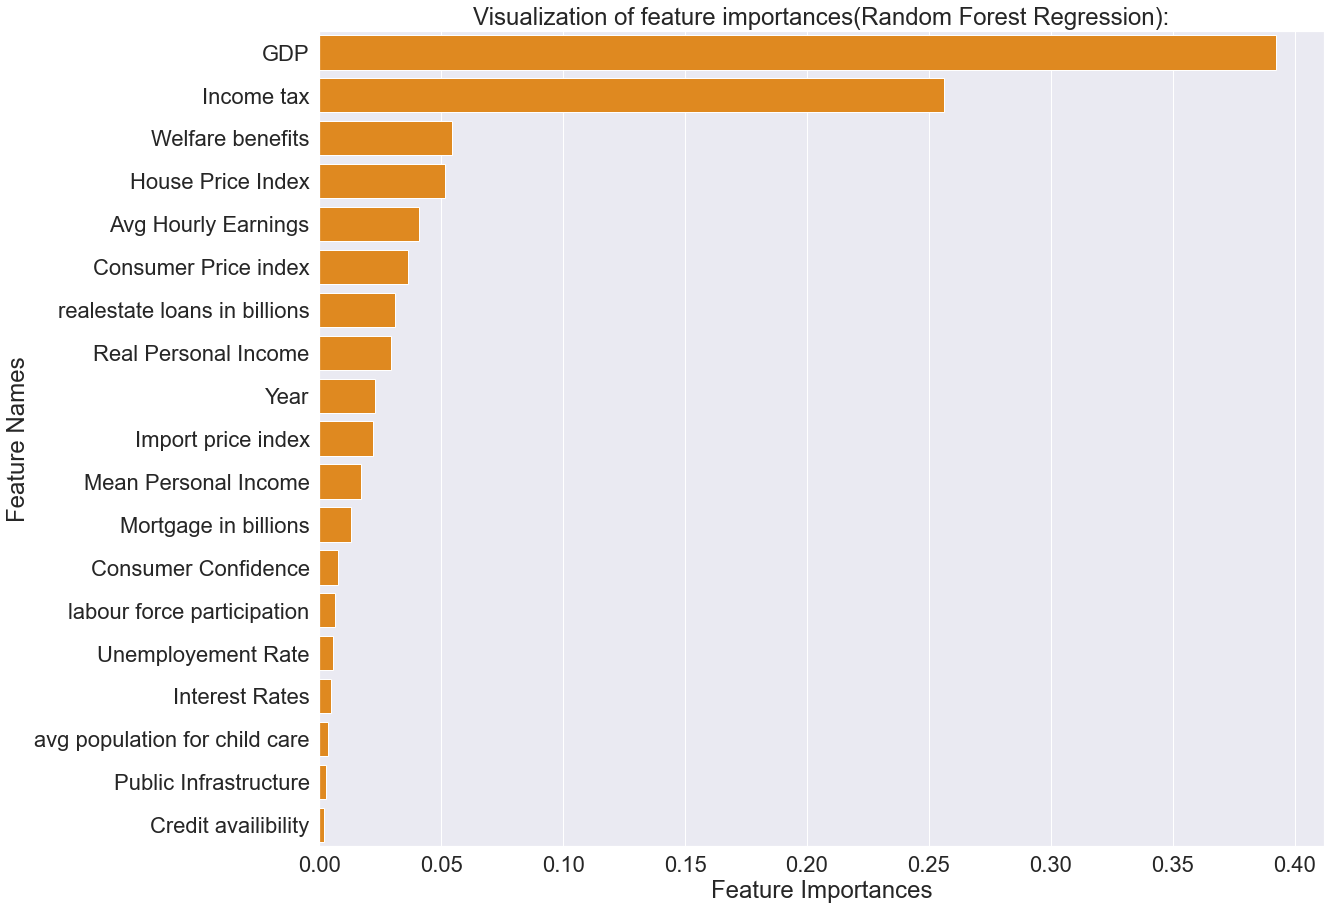

In [164]:
sns.set(font_scale=2)
plt.figure(figsize=(18,15))
sns.barplot(y='Feature Names',x='Feature Importances',data = feature_imp_rf,color='darkorange')
plt.title("Visualization of feature importances(Random Forest Regression):")
plt.show()


### Display one of the trees of Random Forest Regressor


-  Random forest is knows as collection of different decision trees, and  ensembling of the trees i.e., Average of the output of the different decesion trees is final output result, Depending upon the squared Error of the Variables, the following tree was constructed, So the highest feature importance will get the head position and remining feature importances get the leaf position and so on

- And the criterion it followed is squared error of the estimate

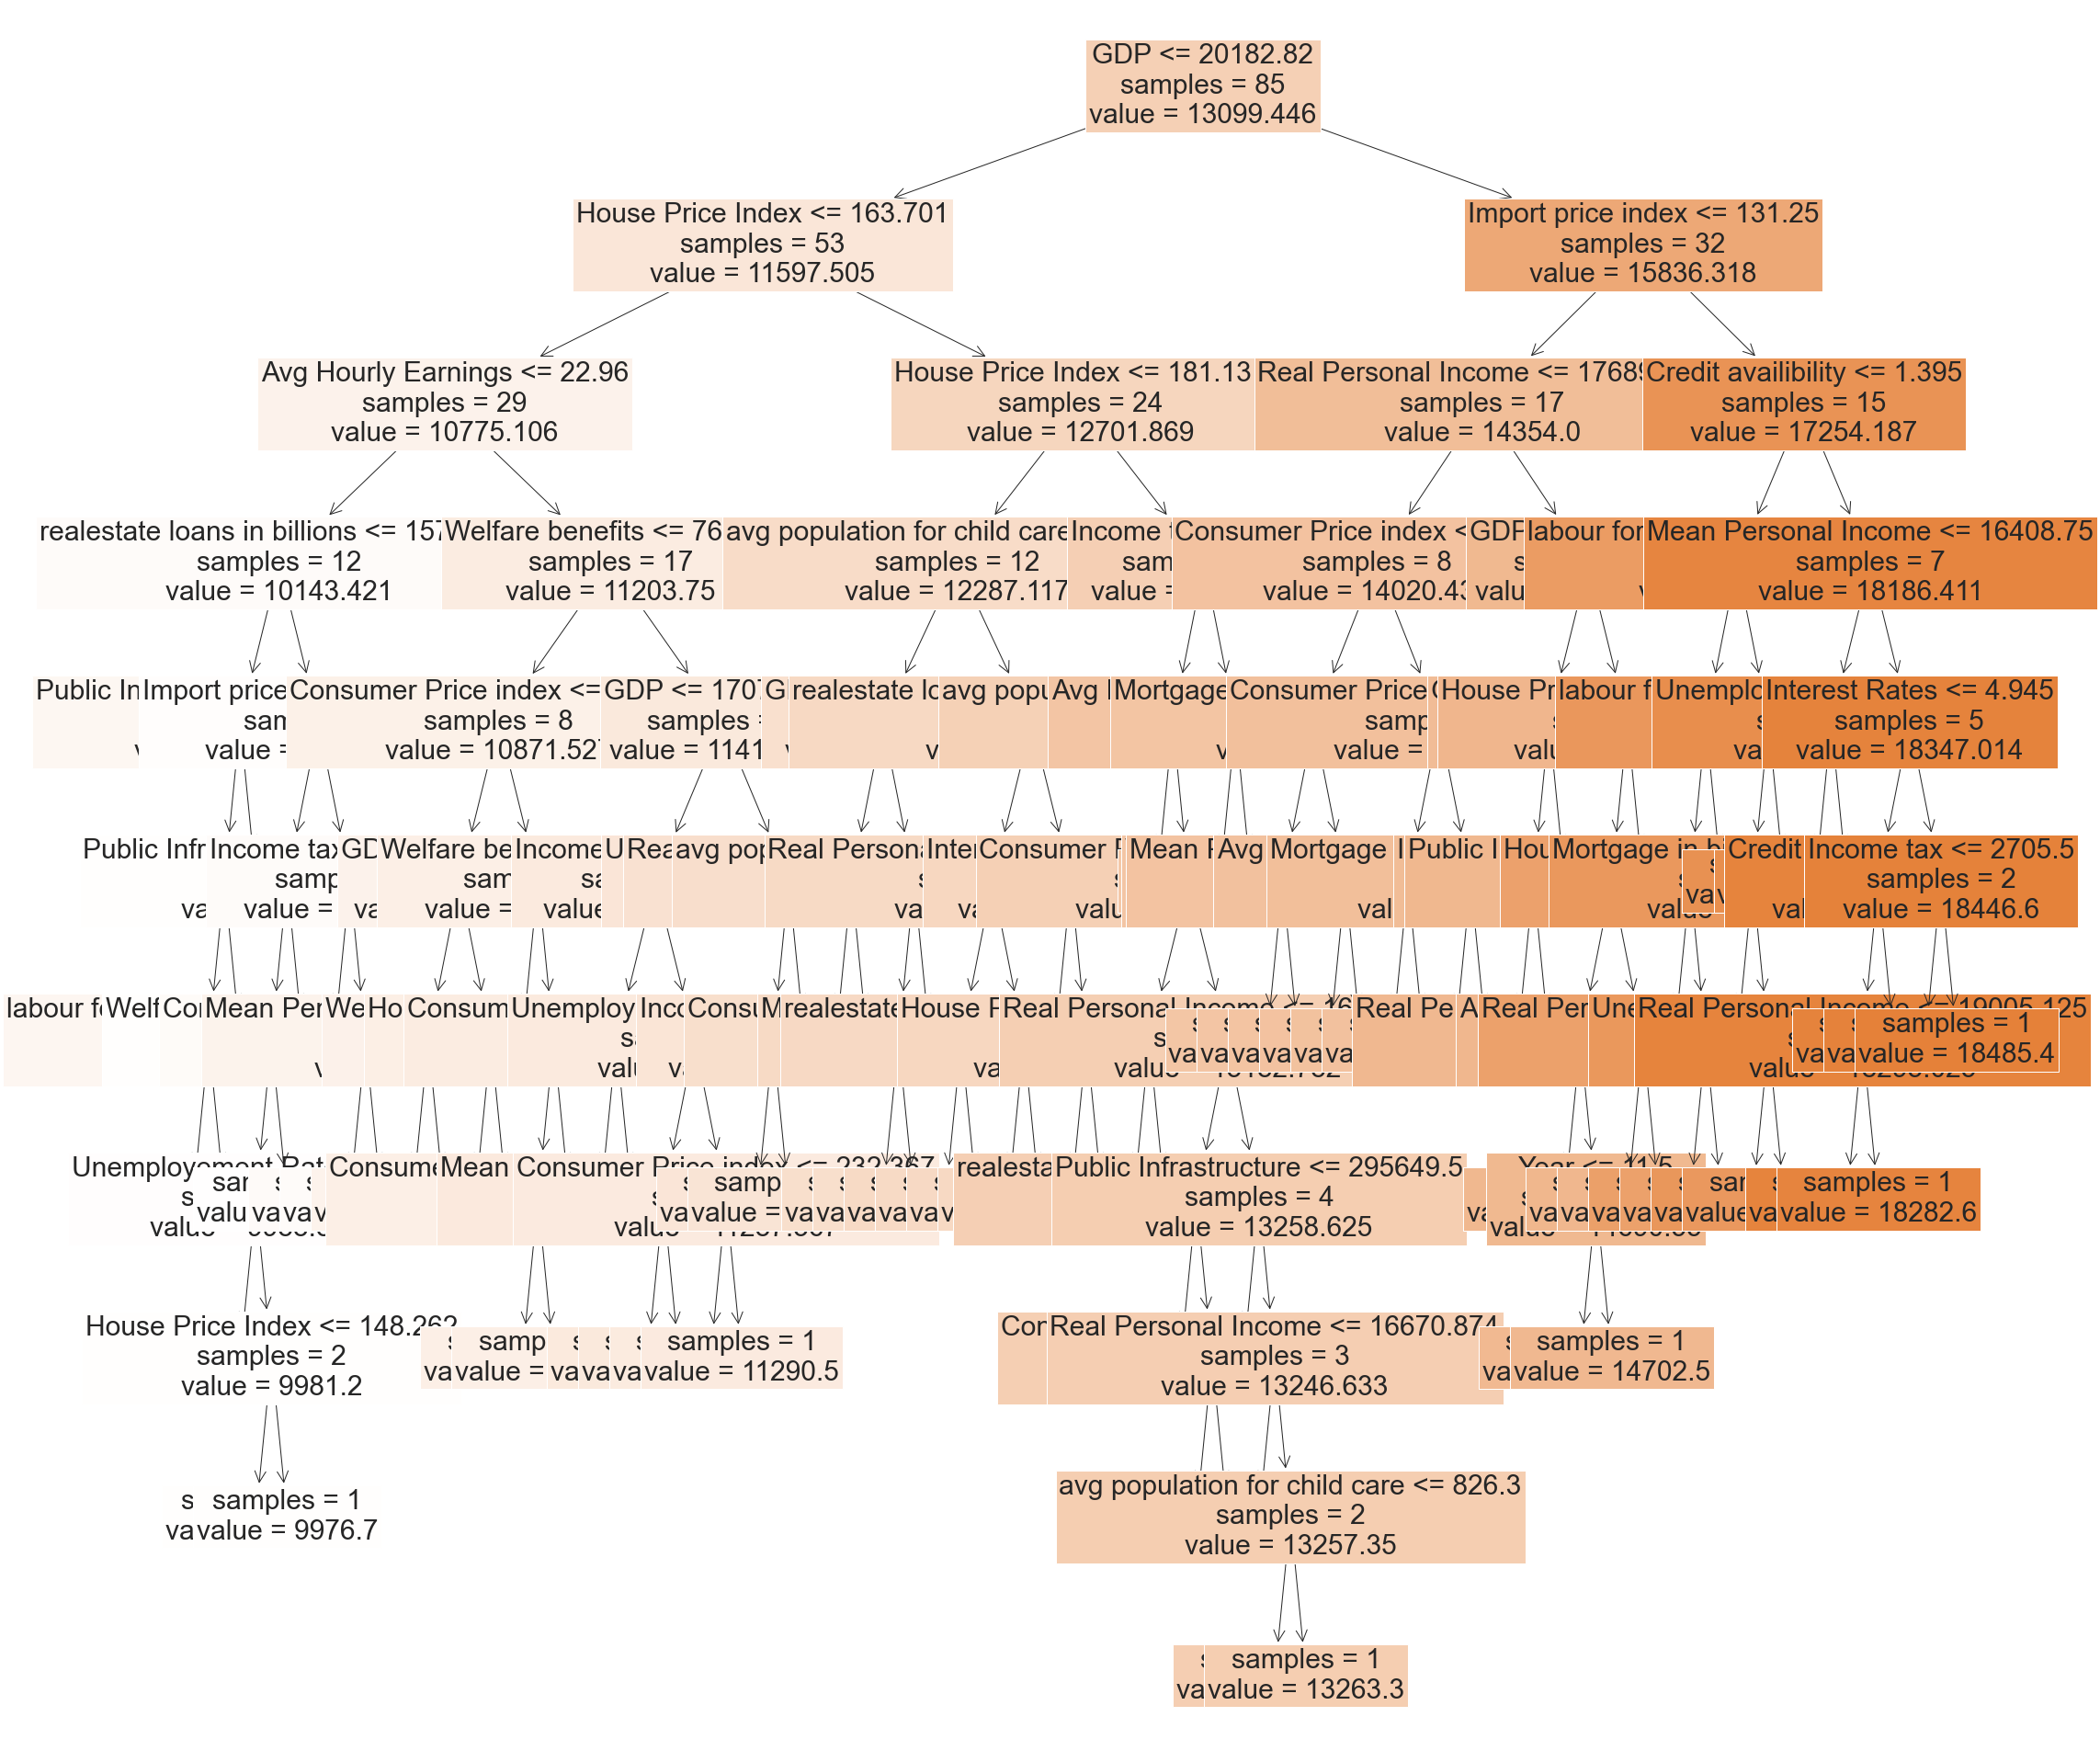

In [165]:
from sklearn import tree
fig = plt.figure(figsize=(35,35))
_ = tree.plot_tree(model_rf.estimators_[1],
                   feature_names=X_train.columns,impurity=False,
                   class_names="Personal Consumption Expenditure",fontsize=30,
                   filled=True)

### Model 4: Support Vecotor Regressor

In [166]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [167]:
model_svr = SVR(gamma=0.5,C=100)
model_svr.fit(X_train_scaled,y_train)

pred_svr = model_svr.predict(X_test_scaled)

### R_Squared 

In [168]:
from sklearn.metrics import r2_score
r_2_svr = r2_score(y_test,pred_svr)
print("The R_Squared is ",r_2_svr)

The R_Squared is  0.38988495412438384


### Inference: 
- hence 94.38 % variation in Personal Consumption expenditure  can be explained by the given Economic features

### (RMSE) Root Mean Squared Error (Test data)

In [169]:
from sklearn.metrics import mean_squared_error
err_svr = np.sqrt(mean_squared_error(y_test,pred_svr))
print("the RMSE is {}".format(err_svr))

the RMSE is 1672.5661348384465


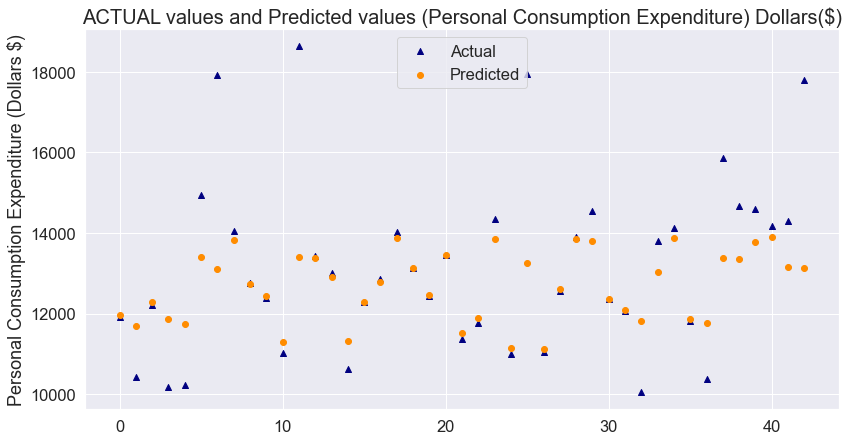

In [170]:
predictions_svr = pd.DataFrame({'Actual':y_test,'Predicted':pred_svr})
predictions_svr['Residuals'] = predictions_svr['Actual']-predictions_svr['Predicted']
sns.set(font_scale=1.5)
plt.figure(figsize=(13.5,7))
plt.scatter(list(range(len(y_test))),y_test,color='navy',label='Actual',marker='^')
plt.scatter(list(range(len(pred_svr))),pred_svr,color='darkorange',label='Predicted',marker='o')
plt.ylabel("Personal Consumption Expenditure (Dollars $)")
plt.title("ACTUAL values and Predicted values (Personal Consumption Expenditure) Dollars($)",fontsize=20)
plt.legend()
plt.show()

### Outputs showing R_Squared of model in terms of Explanatory power

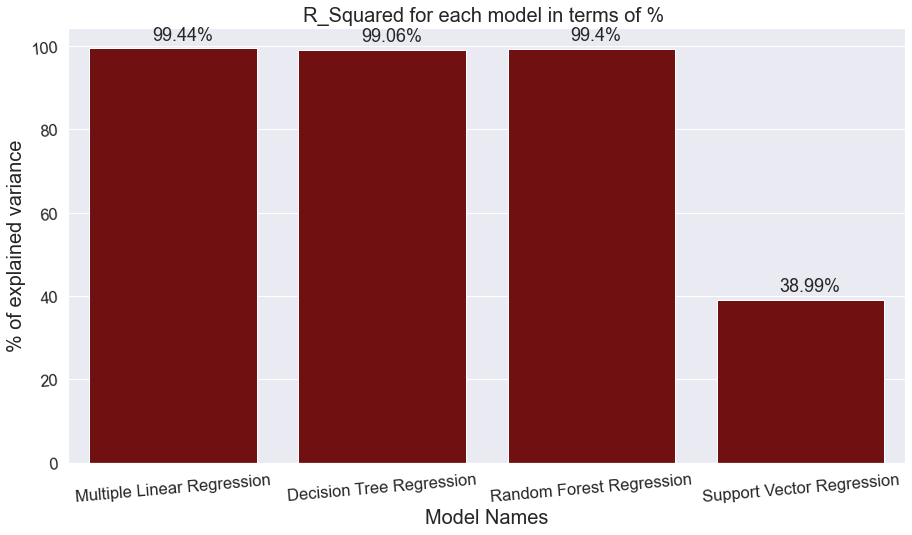

In [171]:
model_r2  = [r_2_lr*100,r_2_dt*100,r_2_rf*100,r_2_svr*100]
model_names = ['Multiple Linear Regression', 'Decision Tree Regression','Random Forest Regression','Support Vector Regression']
model_mse = [err,err_dt,err_rf,err_svr]
i=0
for r in model_r2:
    r = round(r,2)
    model_r2[i]=r
    i+=1
j=0
for r in model_mse:
    r = round(r,2)
    model_mse[j]=r
    j+=1

plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
ax = sns.barplot(y= model_r2,x=model_names,color='maroon')
for p,labels in zip(ax.patches,model_r2):
    width = p.get_x()+p.get_width()/2-0.1
    height = p.get_height()+2
    ax.annotate(str(labels)+"%",(width,height))
ax.tick_params(rotation=5)
plt.xlabel("Model Names",fontsize=20)
plt.ylabel("% of explained variance",fontsize=20)
plt.title("R_Squared for each model in terms of % ",fontsize=20)
plt.show()

## Error Rate of each Regression model (Root Mean Sqaured Error)

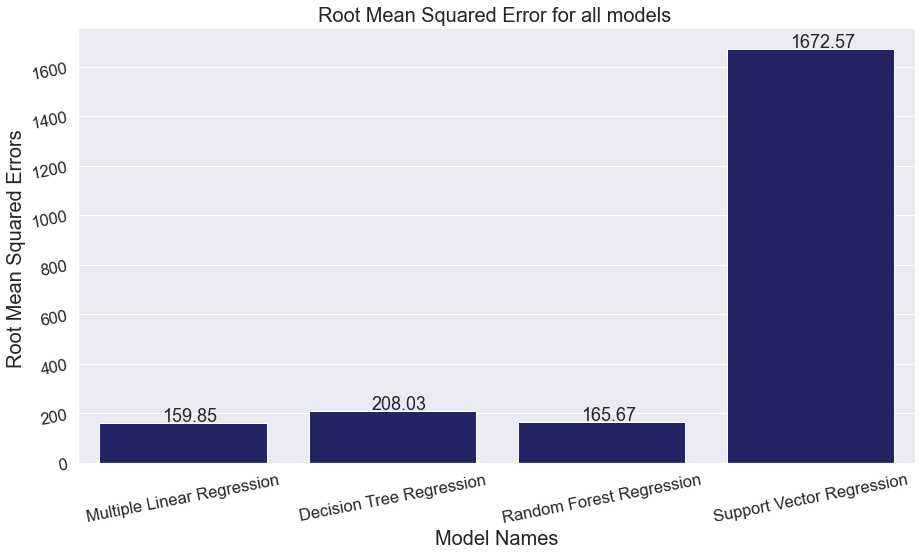

In [172]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,8))
ax = sns.barplot(y= model_mse,x=model_names,color='midnightblue')
for p,labels in zip(ax.patches,model_mse):
    width = p.get_x()+p.get_width()/2-0.1
    height = p.get_height()+5
    ax.annotate(labels,(width,height))
ax.tick_params(rotation=11)
plt.xlabel("Model Names",fontsize=20)
plt.ylabel("Root Mean Squared Errors ",fontsize=20)
plt.title("Root Mean Squared Error for all models ",fontsize=20)
plt.show()

### Most important features from all the models

### After interpreting all the models of regression and their important significant features, the following independent variables are common in all the above models:

1. 'GDP'.
2. 'realestate loans in billions',
3. 'Mortgage in billions',
4. 'House Price Index',
5. 'Consumer Price index',
6. 'Real Personal Income',
7. 'Interest Rates',
8. 'labour force participation',
9. 'avg population for child care'


### Hypothesis Result:

- CPI is significant variable for predicting Consumer spending so Inflation has affect on consumer spending 

In [173]:
fe = ['GDP' , 'realestate loans in billions', 'Mortgage in billions', 'House Price Index', 'Consumer Price index',\
      'Real Personal Income', 'Unemployment Rate', 'Interest Rates', 'labour force participation', 'avg population for child care',\
      'Credit availability']

### Relationship between significant featues and Dependent variable
    

### 1. GDP vs Personal Consumption Expenditure

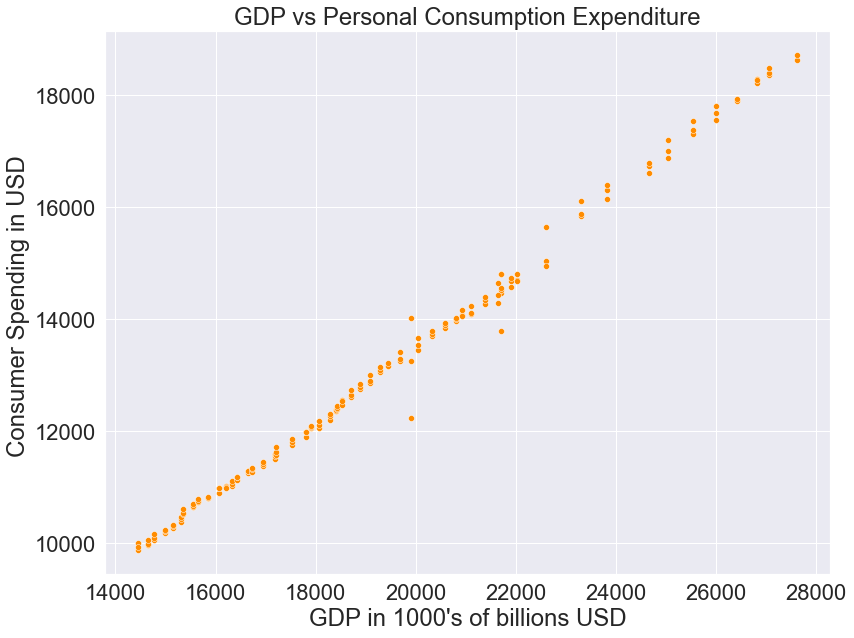

In [174]:
sns.set(font_scale=2)
plt.figure(figsize=(13,10))
plt.ylabel("Consumer Spending in USD ")
sns.scatterplot(x=new_data['GDP'],y=new_data['Personal Consumption Expenditure'],color='darkorange')
plt.xlabel("GDP in 1000's of billions USD")
plt.title('GDP vs Personal Consumption Expenditure')
plt.show()

### 2. 'realestate loans in billions' vs Consumer spending

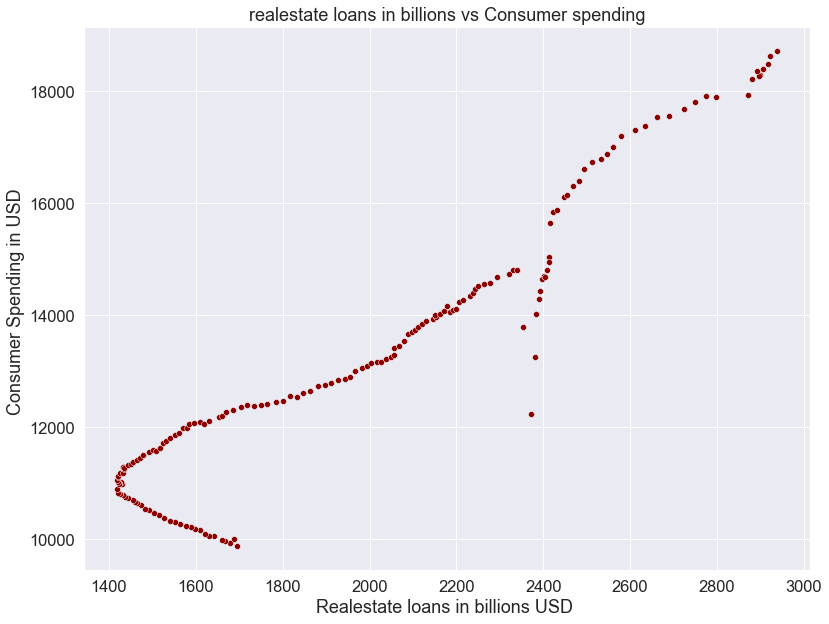

In [175]:
sns.set(font_scale=1.5)
plt.figure(figsize=(13,10))
plt.ylabel("Consumer Spending in USD ")
sns.scatterplot(x=new_data['realestate loans in billions'],y=new_data['Personal Consumption Expenditure'],color='darkred')
plt.xlabel("Realestate loans in billions USD ")
plt.title('realestate loans in billions vs Consumer spending')
plt.show()

### 3. 'Mortgage in billions' vs Consumer spending 

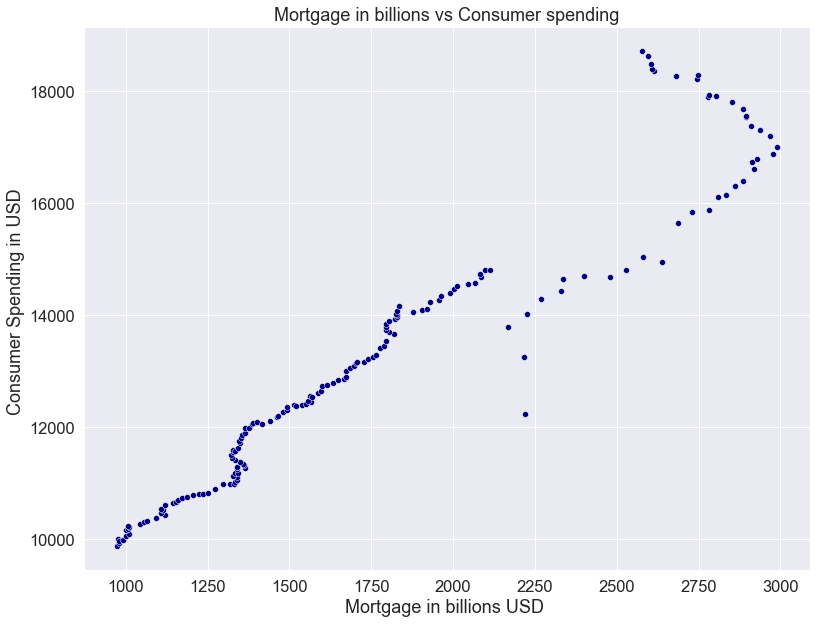

In [176]:
sns.set(font_scale=1.5)
plt.figure(figsize=(13,10))
plt.ylabel("Consumer Spending in USD ")
sns.scatterplot(y=new_data['Personal Consumption Expenditure'],x=new_data['Mortgage in billions'],color='navy')
plt.xlabel("Mortgage in billions USD ")
plt.title("Mortgage in billions vs Consumer spending")
plt.show()

### 4. 'House Price Index' vs Consumer Spending 

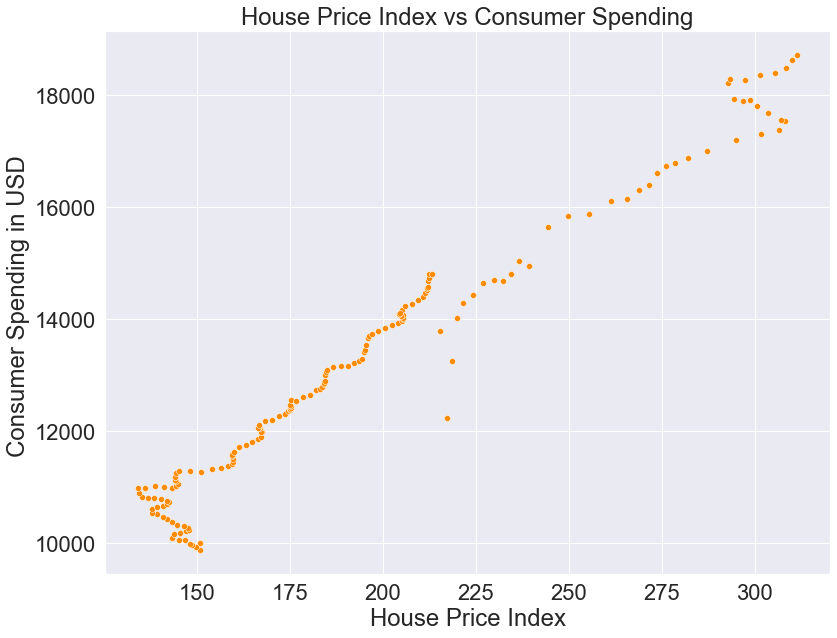

In [177]:
sns.set(font_scale=2)
plt.figure(figsize=(13,10))
plt.ylabel("Consumer Spending in USD ")
sns.scatterplot(y=new_data['Personal Consumption Expenditure'],x=new_data['House Price Index'],color='darkorange')
plt.title("House Price Index vs Consumer Spending")
plt.show()

### 5. Consumer Price index vs Consumer Spending 

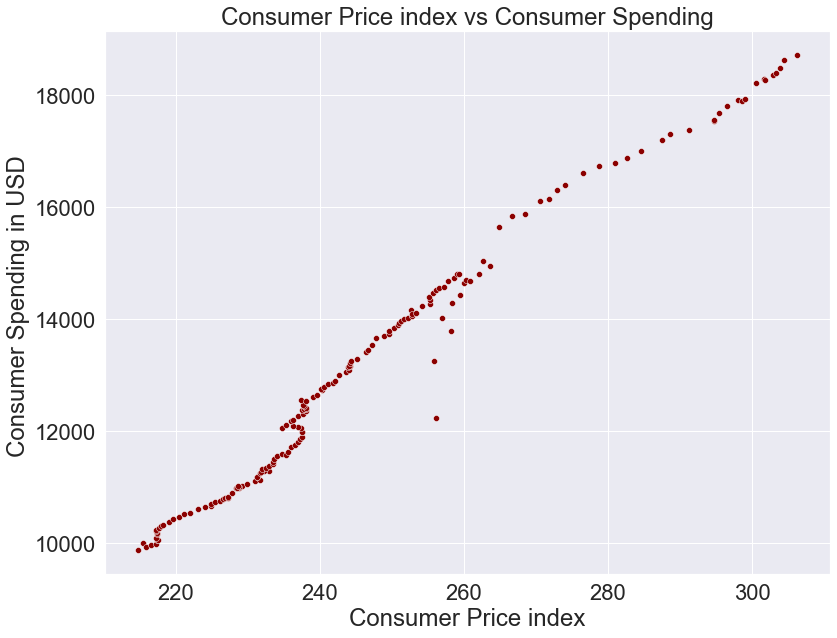

In [178]:
plt.figure(figsize=(13,10))
plt.ylabel("Consumer Spending in USD ")
sns.scatterplot(y=new_data['Personal Consumption Expenditure'],x=new_data['Consumer Price index'],color='darkred')
plt.title("Consumer Price index vs Consumer Spending")
plt.show()

### 6. 'Real Personal Income vs Consumer spending 

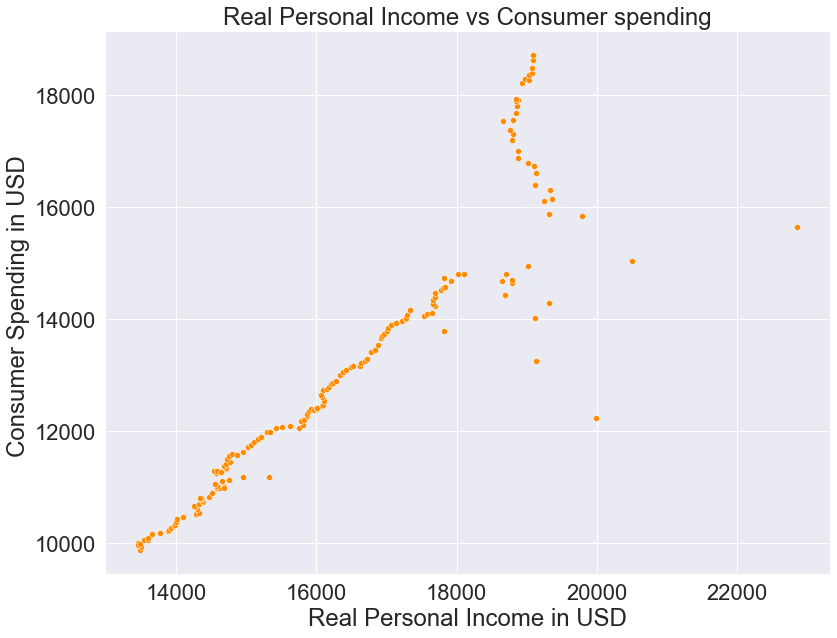

In [179]:
plt.figure(figsize=(13,10))
plt.ylabel("Consumer Spending in USD ")
sns.scatterplot(y=new_data['Personal Consumption Expenditure'],x=new_data['Real Personal Income'],color='darkorange')
plt.xlabel('Real Personal Income in USD')
plt.title('Real Personal Income vs Consumer spending')
plt.show()


### 7. 'Interest Rates' vs Conumer spending 

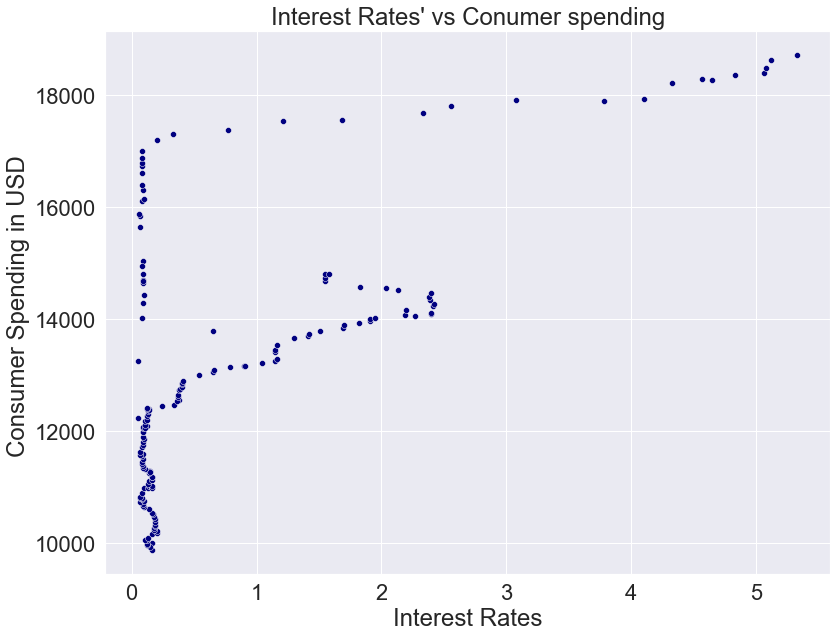

In [180]:
plt.figure(figsize=(13,10))
plt.ylabel("Consumer Spending in USD ")
sns.scatterplot(y=new_data['Personal Consumption Expenditure'],x=new_data['Interest Rates'],color='navy')
plt.xlabel('Interest Rates')
plt.title("Interest Rates' vs Conumer spending")
plt.show()


### 8.'labour force participation' vs Consumer spending USD

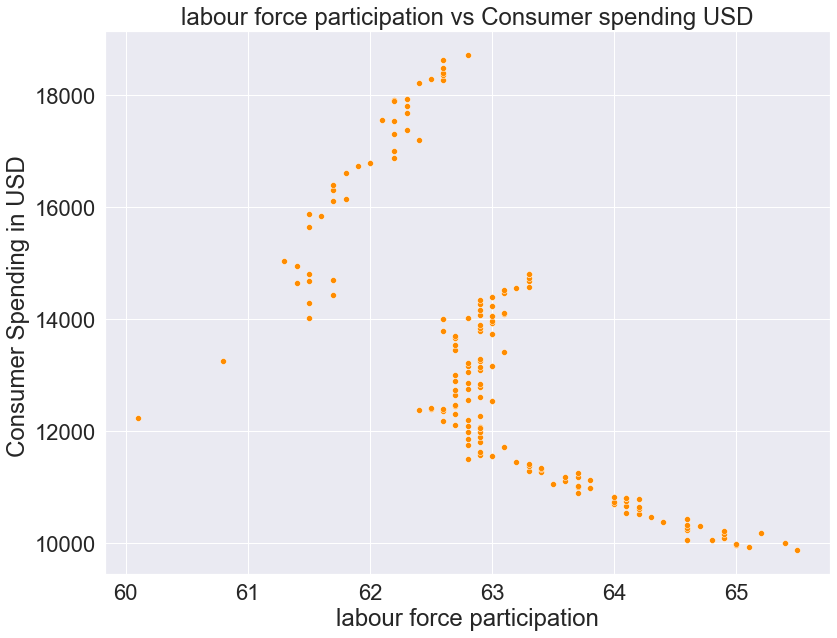

In [181]:
plt.figure(figsize=(13,10))
plt.ylabel("Consumer Spending in USD ")
sns.scatterplot(y=new_data['Personal Consumption Expenditure'],x=new_data['labour force participation'],color='darkorange')
plt.xlabel('labour force participation')
plt.title("labour force participation vs Consumer spending USD")
plt.show()


### 9. 'avg population for child care' VS Consumer spending 

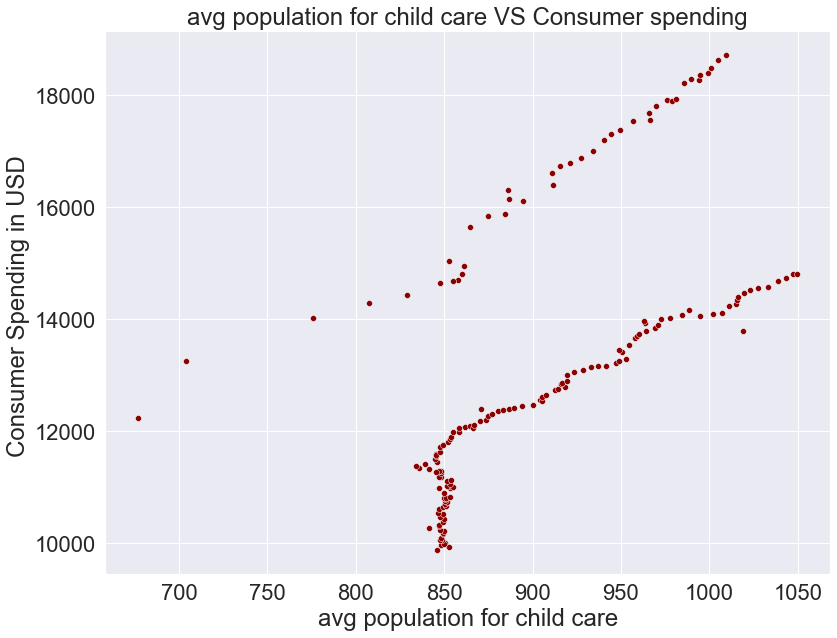

In [182]:
plt.figure(figsize=(13,10))
plt.ylabel("Consumer Spending in USD ")
sns.scatterplot(y=new_data['Personal Consumption Expenditure'],x=new_data['avg population for child care'],color='darkred')
plt.xlabel('avg population for child care')
plt.title("avg population for child care VS Consumer spending")
plt.show()